# import and load data

/c/Users/junec/AppData/Local/Programs/Python/Python38/python
load & denoise real field data===========================
---load data from 'txt' or 'xlsx' files...
check the time type
---denoising data using S-G smoothing...
---The first & second order derivative has been calculated and appended to pressure dataframe
len(ground_truth_denoised) 60
after remove uncorrect ground truth
len(ground_truth_denoised) 54


Elapsed time(hr)  Pressure(psia)  first_order_derivative  \
count      29813.000000    29813.000000            29813.000000   
mean        1949.504754     5858.252763               30.980488   
std         1071.285888     1201.608375              217.076860   
min            0.000000     2989.186167            -1177.363679   
25%         1223.614626     4920.227064              -26.315082   
50%         2055.749995     5958.685278                6.577672   
75%         2691.845828     6884.300893               50.575874   
max         4070.949737     7942.372157             1442.449150   

       second_order_derivative  
count             29813.000000  
mean              -3316.399705  
std               26067.263416  
min             -267661.267543  
25%                -150.940811  
50%                   0.048895  
75%                 129.782625  
max              199644.890976

Elapsed time(hr)  Liquid rate(STB/D)
count      10191.000000        10191.000000
mean        2210.383315       -16880.702745
std         1121.860526         4591.205914
min            0.433384       -22568.277381
25%         1345.039547       -19746.868884
50%         2248.487512       -18758.998204
75%         3074.228818       -15911.221687
max         4075.570423            1.166046

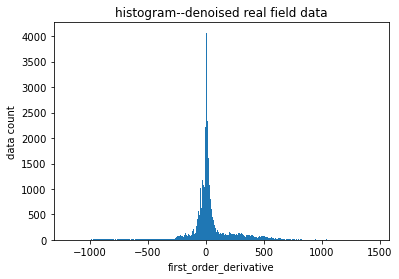

[(24833, 24872), (5698, 5833), (14471, 14575), (10149, 10224)]
47.913402758931625
-12.103679078019923
111.47517980463454
97.0315455031132


In [1]:
%run imports_N_loadDenoised.ipynb

# coarse filter

In [10]:
%run coarse_filter.ipynb

fliter derivatives which are larger than 6.577671754538749, smaller than -99.97038962759567
the length of filtered points: 17888


# detect all break points candidates

In [11]:
# method="deltaTangent_MFFOD_FFOD"
method="deltaTangent_FFOD"

In [12]:
# # points=[buildup_DT,drawdown_DT]
# # points=[buildup_DRI,drawdown_DRI]
# points=[[],points]
# time_step=0.03
# # %run detect_FirstFOD.ipynb
# %run detect_MaxFOD.ipynb

In [13]:
# points=Max_FOD[1]

time_halfWindow=None
point_halfWindow=10
polynomial_order=3
# tangent_type="single_point"
tangent_type="average"
# deltaTangent_criterion=40
deltaTangent_criterion=20
# points=[index for index in range(len(pressure_measure))]
%run detect_useDeltaTangent.ipynb

start to predict using tangent, the length of input points: 17888
-------calculate_Parameters_allCurve using 'polynomial' fitting
detect 3692 buildups and 946 drawdowns 
===============output==================
'buildup_DT: 3692,drawdown_DT: 946'


<Figure size 1440x720 with 0 Axes>

In [14]:
points=[buildup_DT,drawdown_DT]
# points=[buildup_DRI,drawdown_DRI]
# time_step=0.5
time_step=0.2
%run detect_FirstFOD.ipynb
# %run detect_MaxFOD.ipynb

methods\derivative_method.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.pressure_df["abs(first_order_derivative)"]=self.first_order_derivative.abs()


'len(buildUp_df): 3692,len(buildUp_first_FOD): 943'
'len(drawDown_df): 946,len(drawDown_first_FOD): 136'
===============output==================
First_FOD


# spilit periods and find multi-rate break points

In [15]:
# len(First_FOD[0])
# %store First_FOD
# %store Max_FOD

In [26]:
points_buildUp=First_FOD[0]
points_drawDown=First_FOD[1]
# points_buildUp=Max_FOD[0]
# points_drawDown=Max_FOD[1]
minor_threshold_shutIn=0.020
# minor_threshold_shutIn=0.028
# minor_threshold_shutIn=0.030
minor_threshold_Flowing=0.02
%run store_transients.ipynb

====detected_shutIns 37
====filtered_shutIns 31
====len(flowingPeriods) 32
====finally detect buildUp:218,drawDown:31


# plot flowing & shut-in periods

In [24]:
parameters={"Order":polynomial_order,
            "TanThre":deltaTangent_criterion,
            "shutTr":minor_threshold_shutIn,
           "flowTr":minor_threshold_Flowing}
parameters

{'Order': 3, 'TanThre': 20, 'shutTr': 0.026, 'flowTr': 0.02}

'buildup:31, drawdown:31'
---initializing...
---plotting...


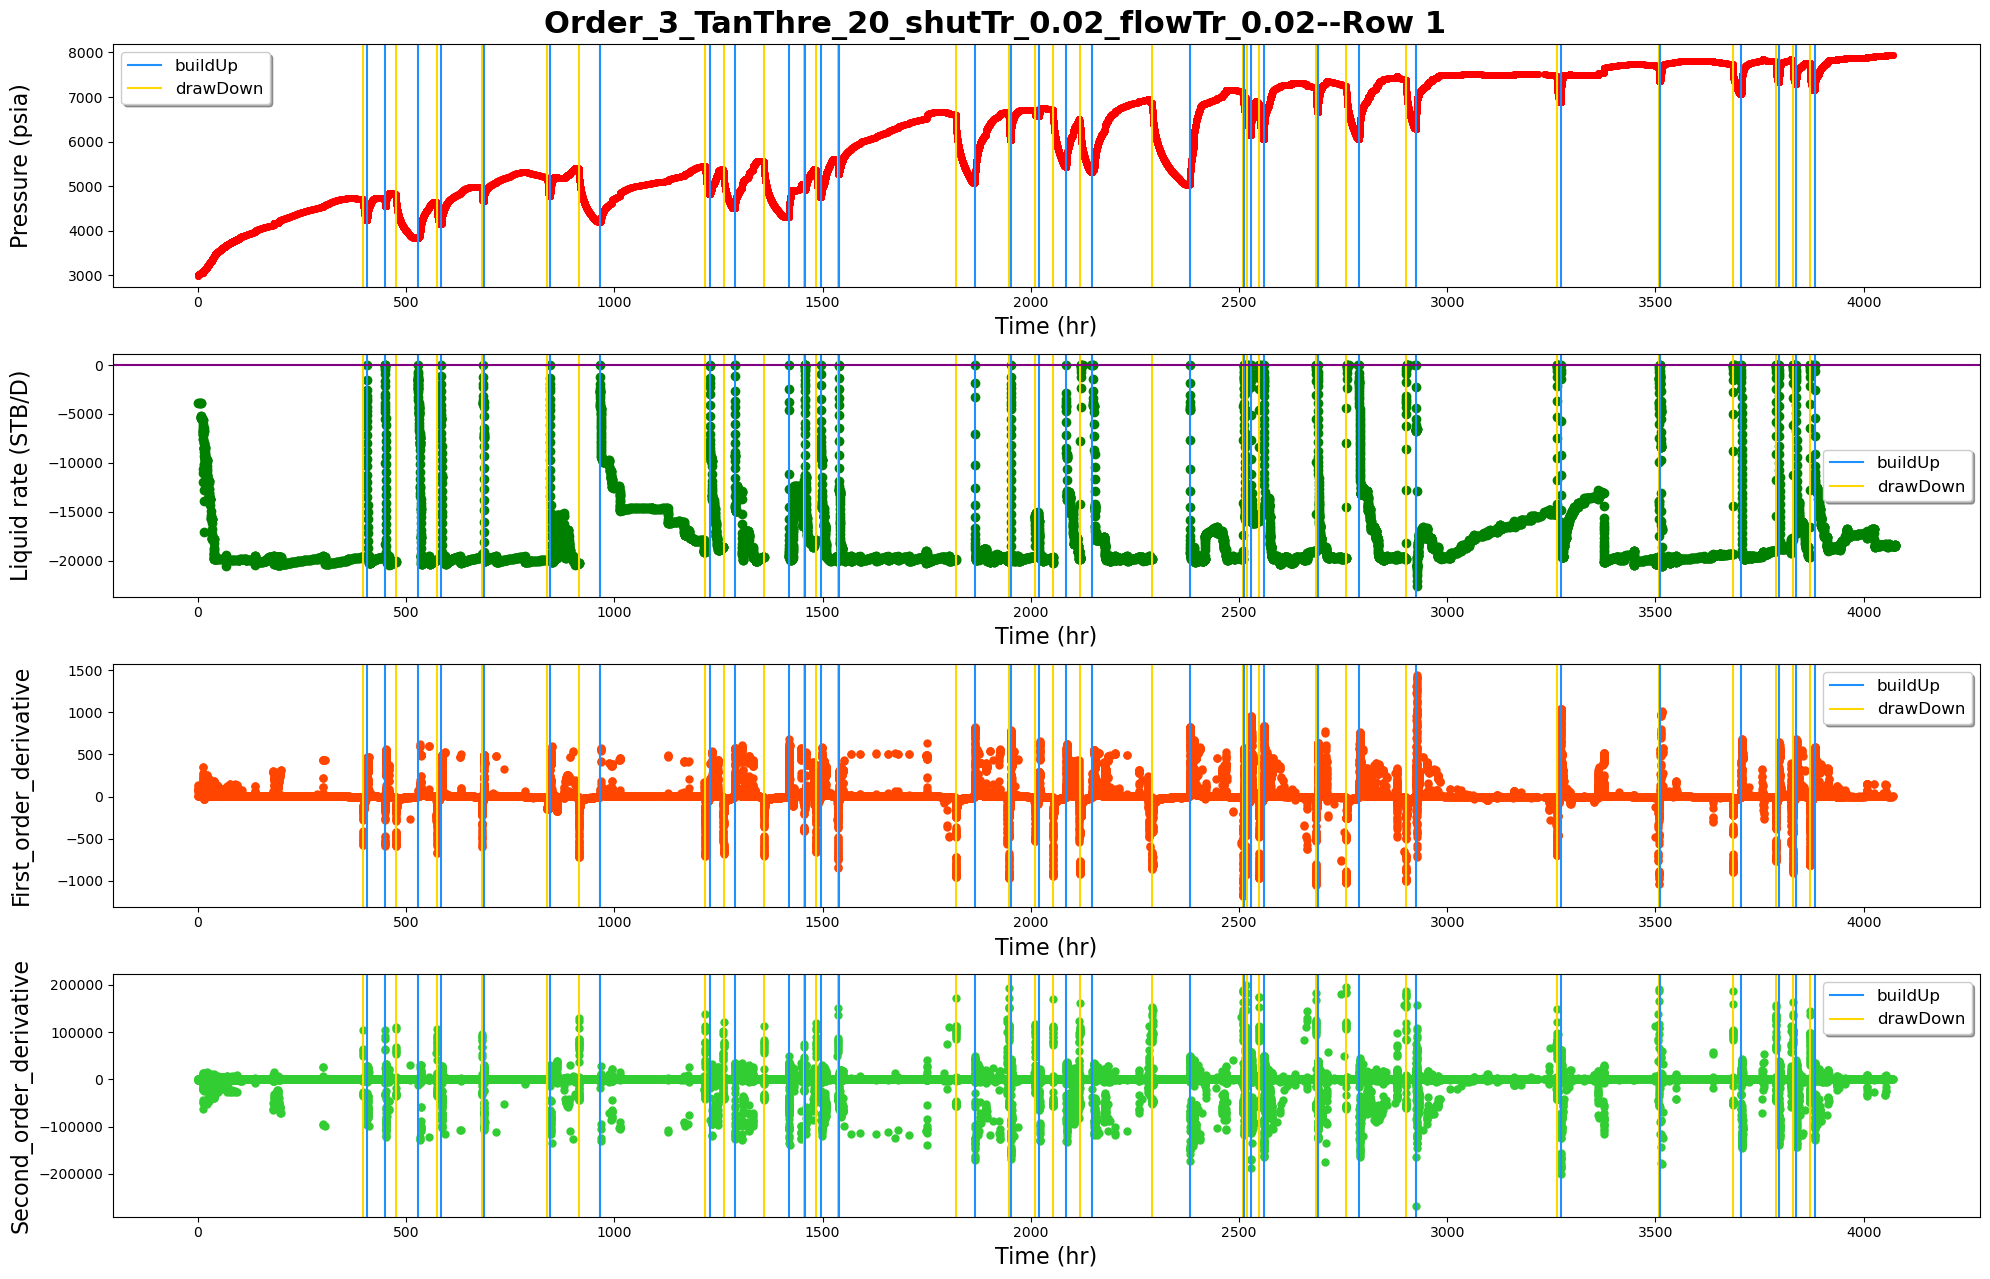

save whole....
detected 62 points as breakpoints
The plot is devided into 25 rows
------row 1-----detected points:[]


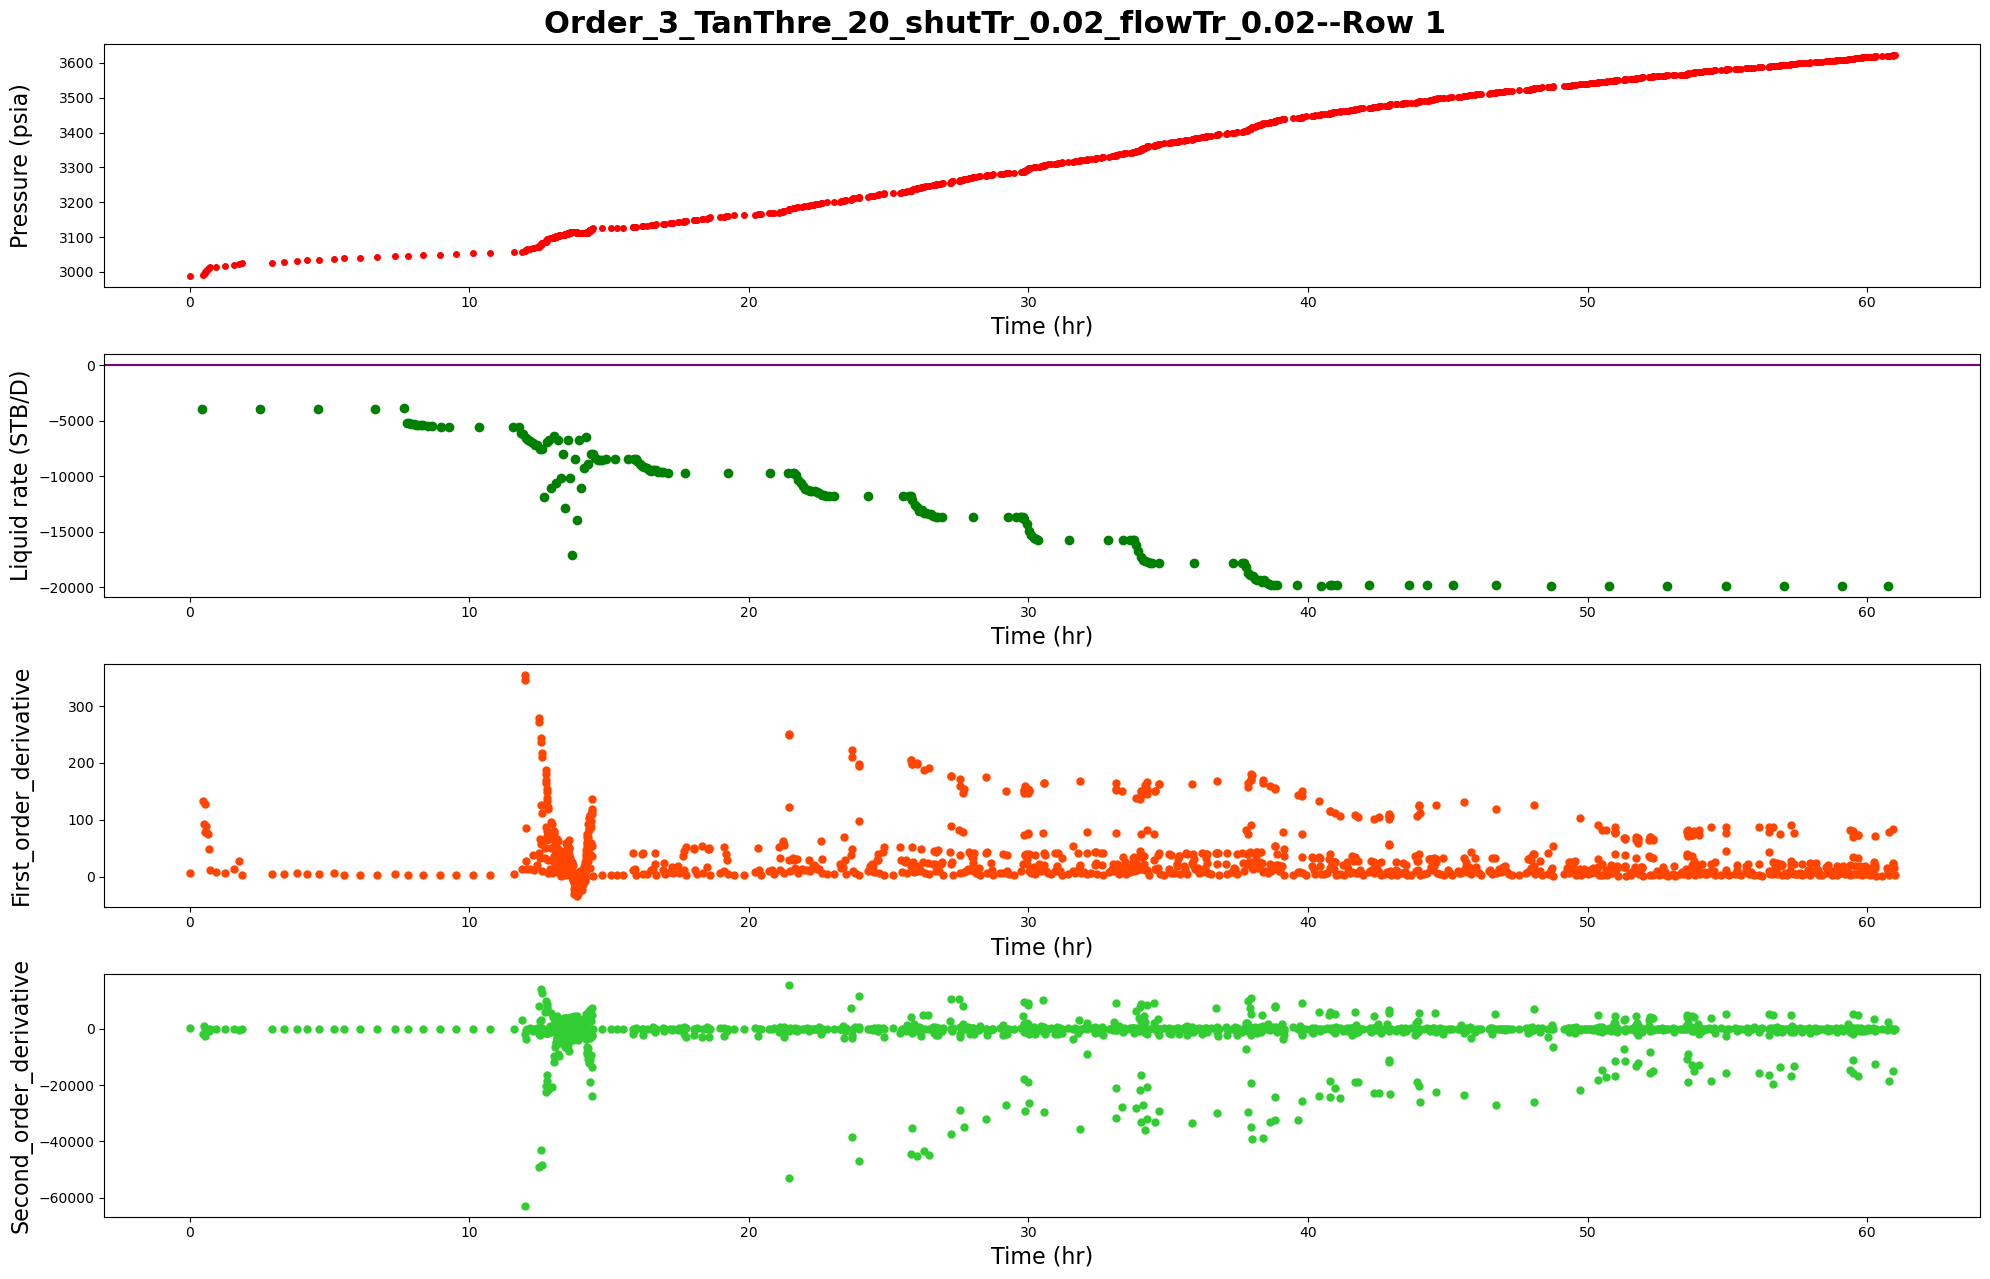

------row 2-----detected points:[2248]


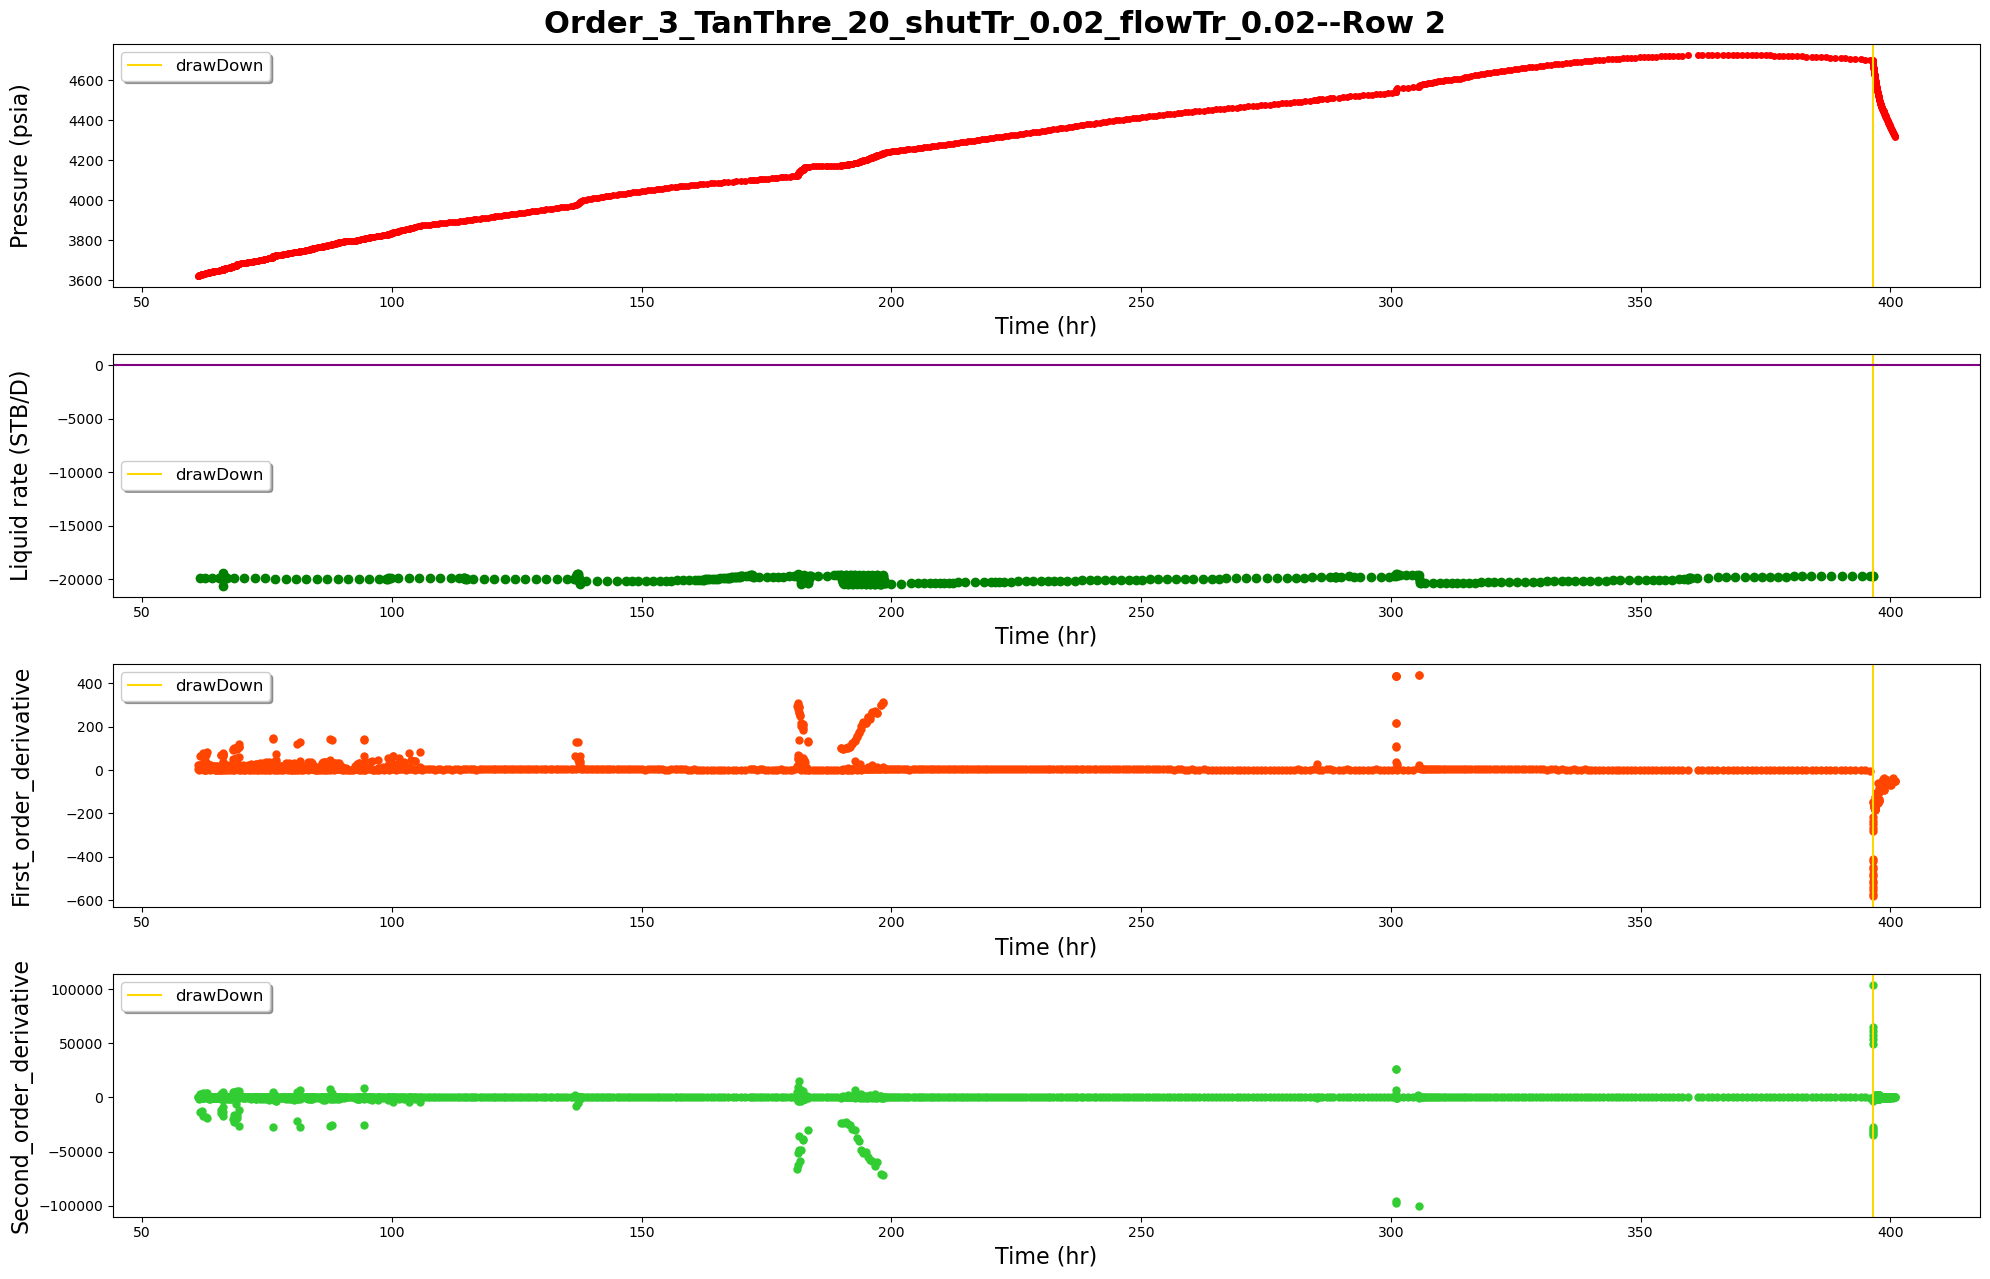

------row 3-----detected points:[2477, 2804, 2884, 3095, 3560]


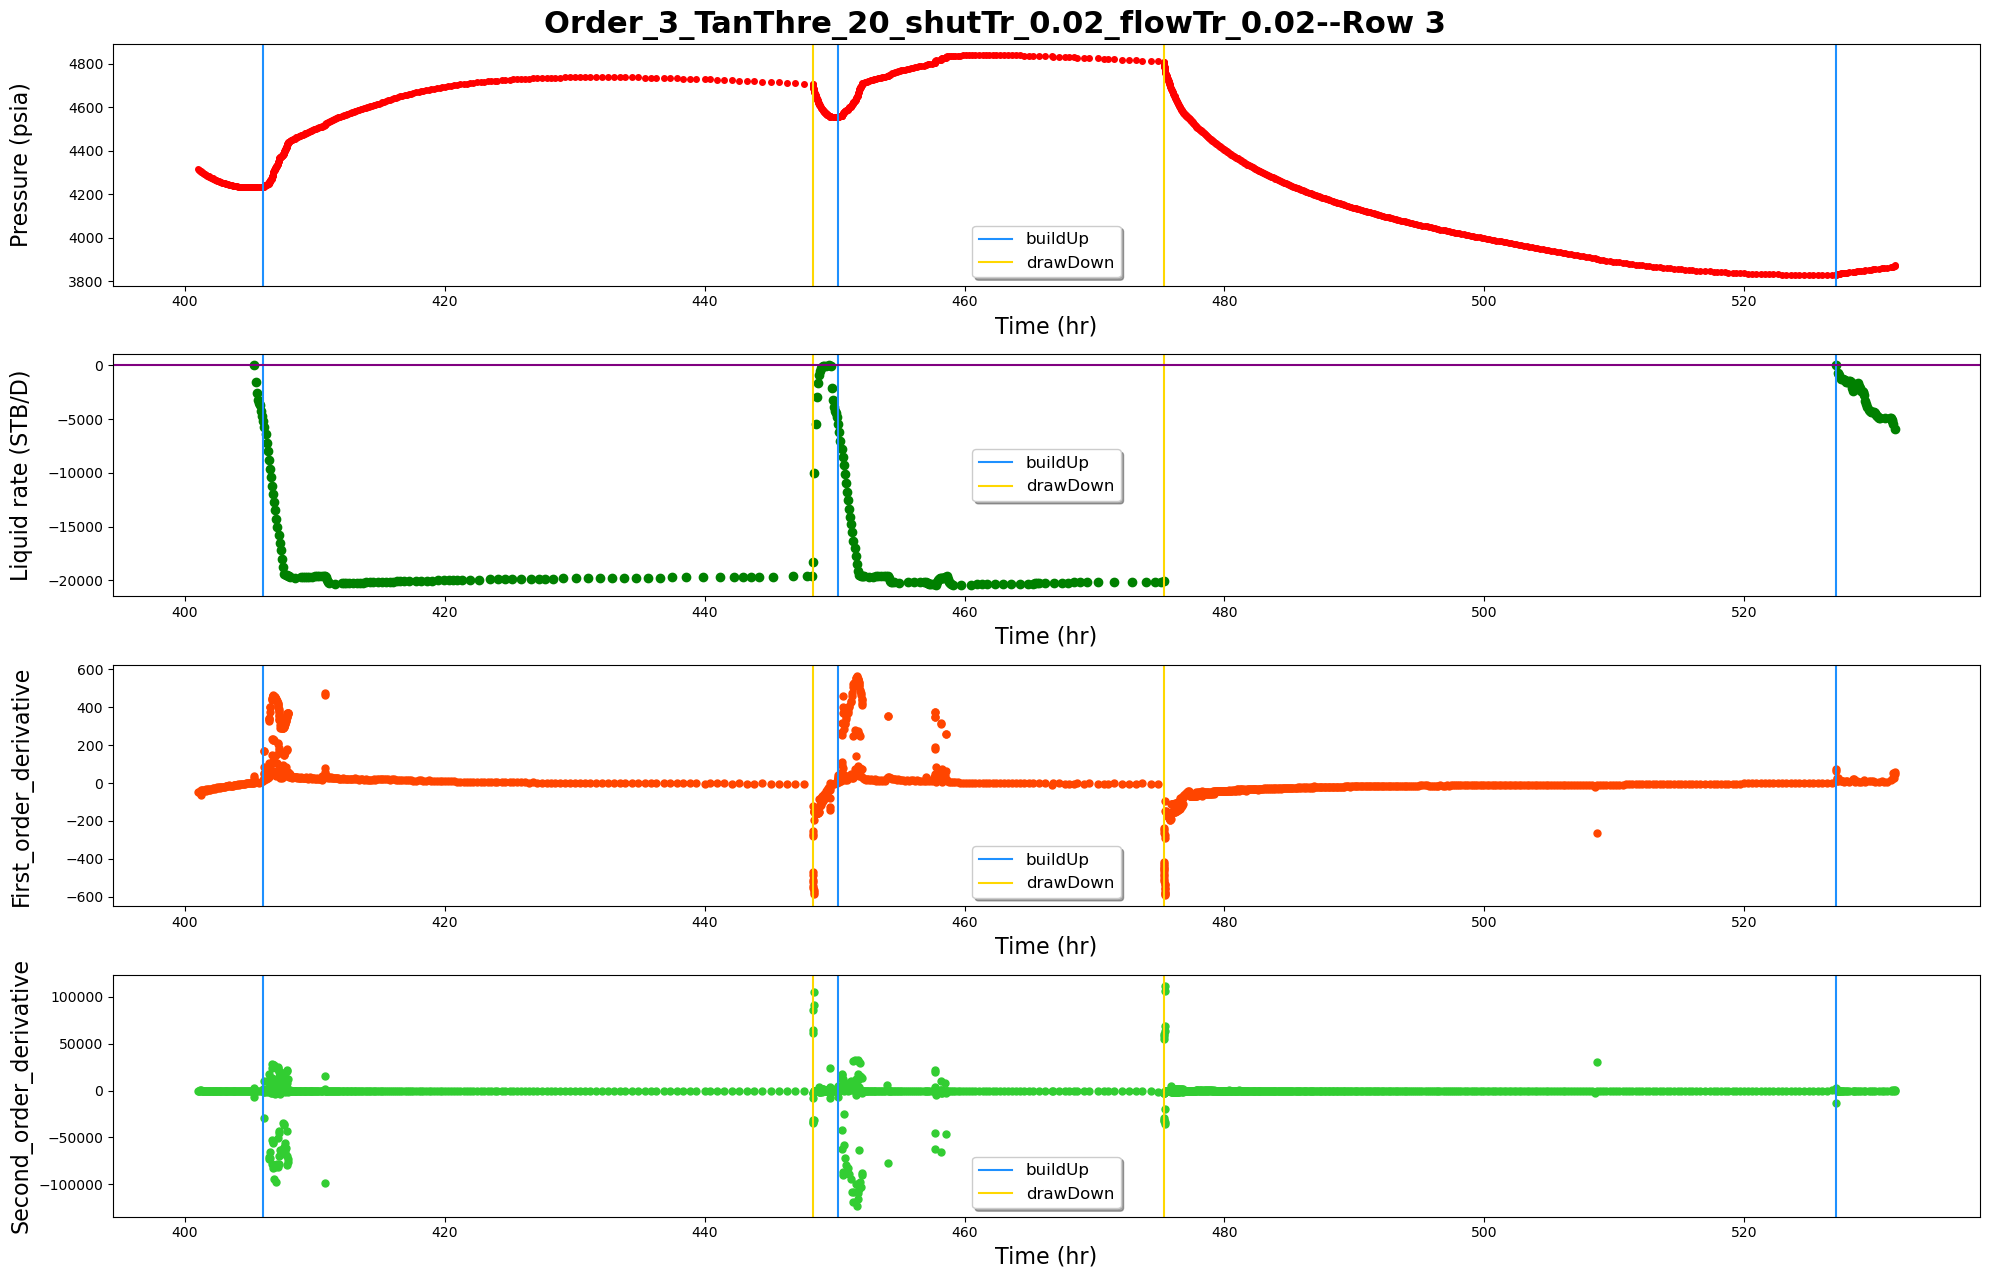

------row 4-----detected points:[4009, 4228, 4750]


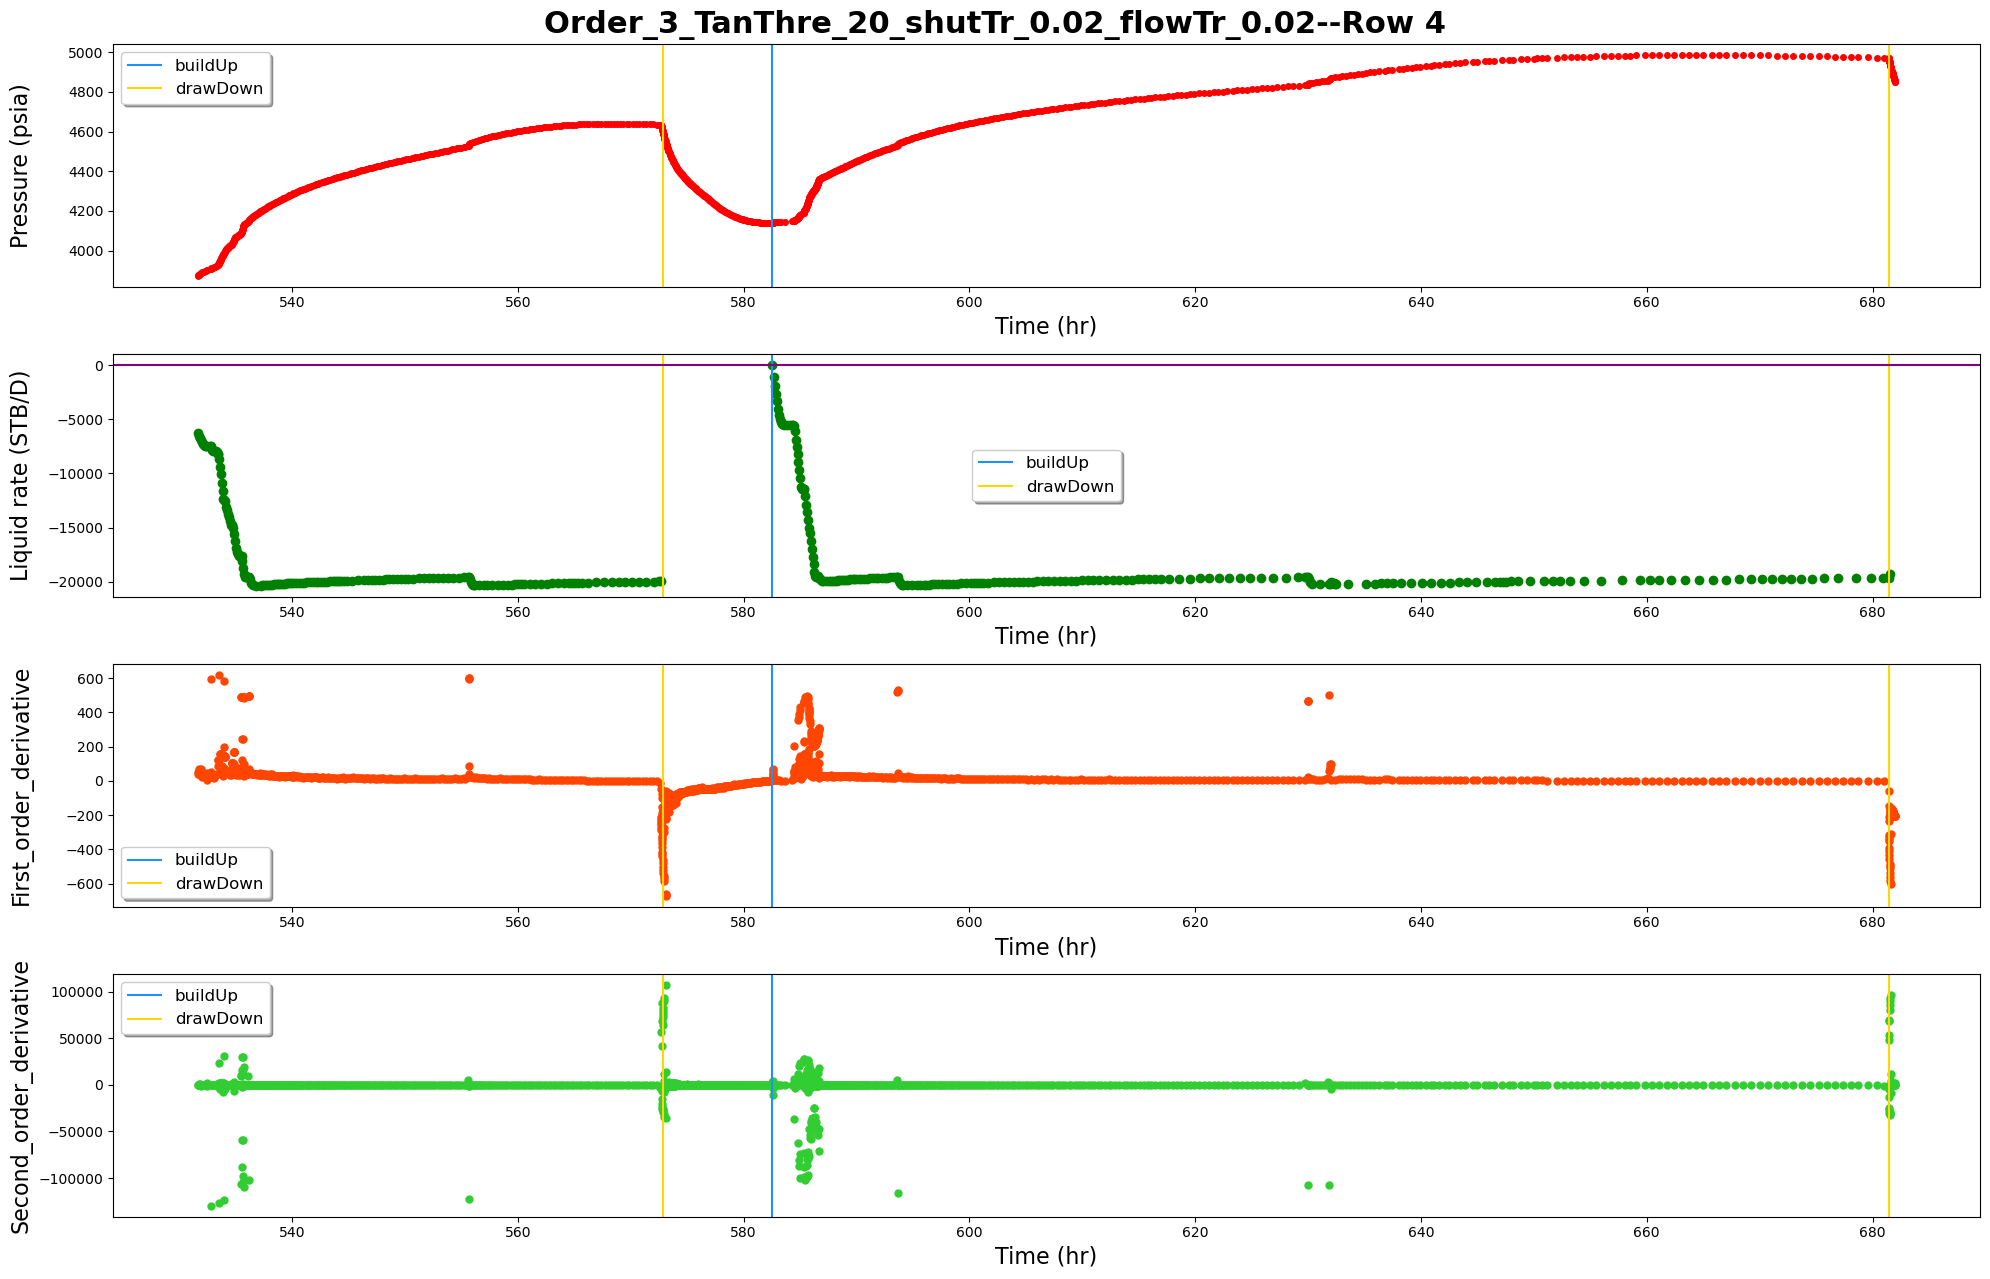

------row 5-----detected points:[4899, 5304, 5441, 5985]


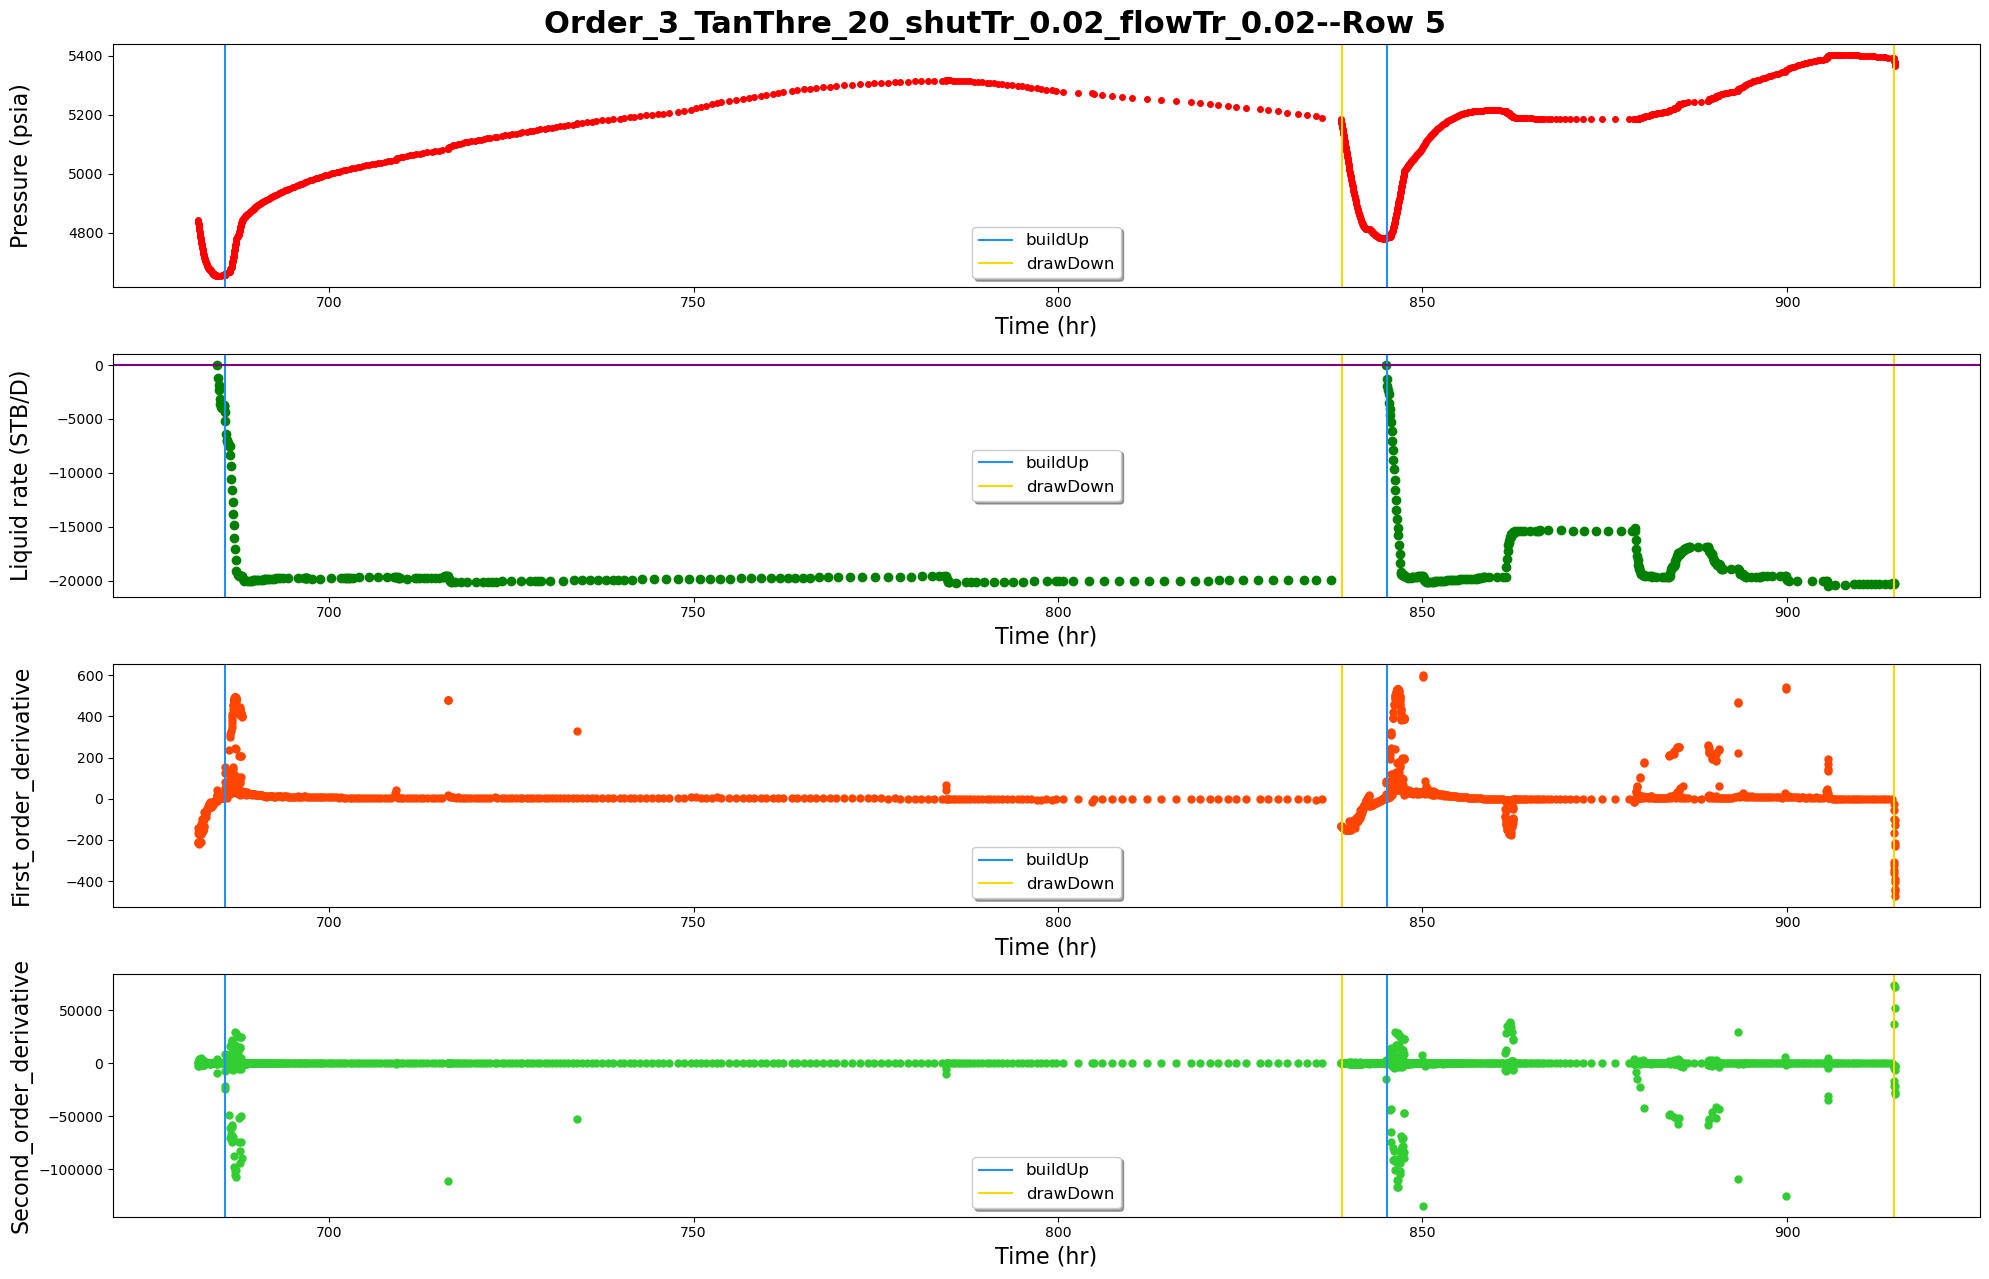

------row 6-----detected points:[6543]


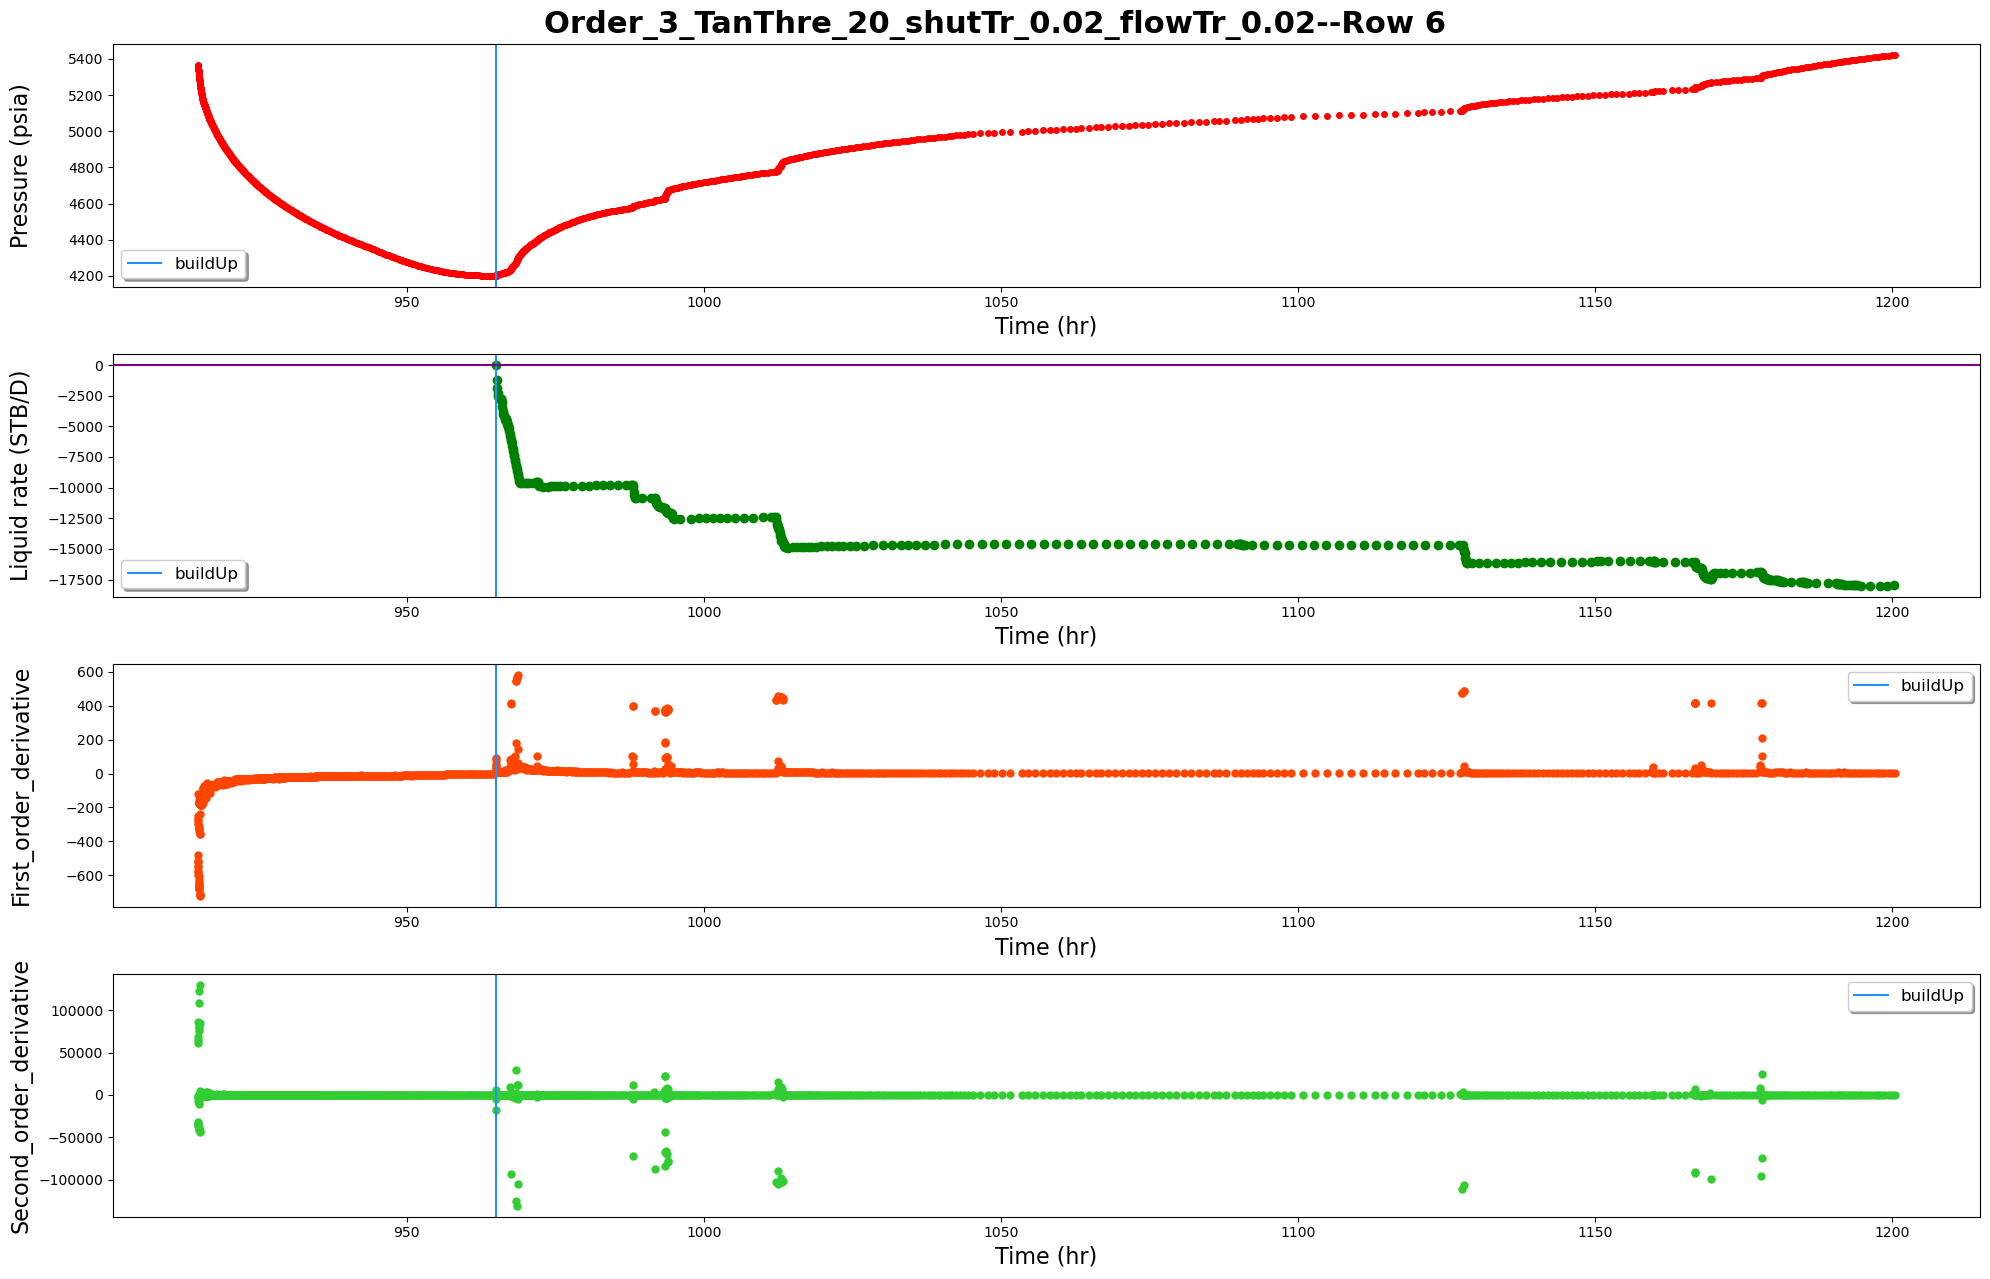

------row 7-----detected points:[7279, 7548, 8003, 8366]


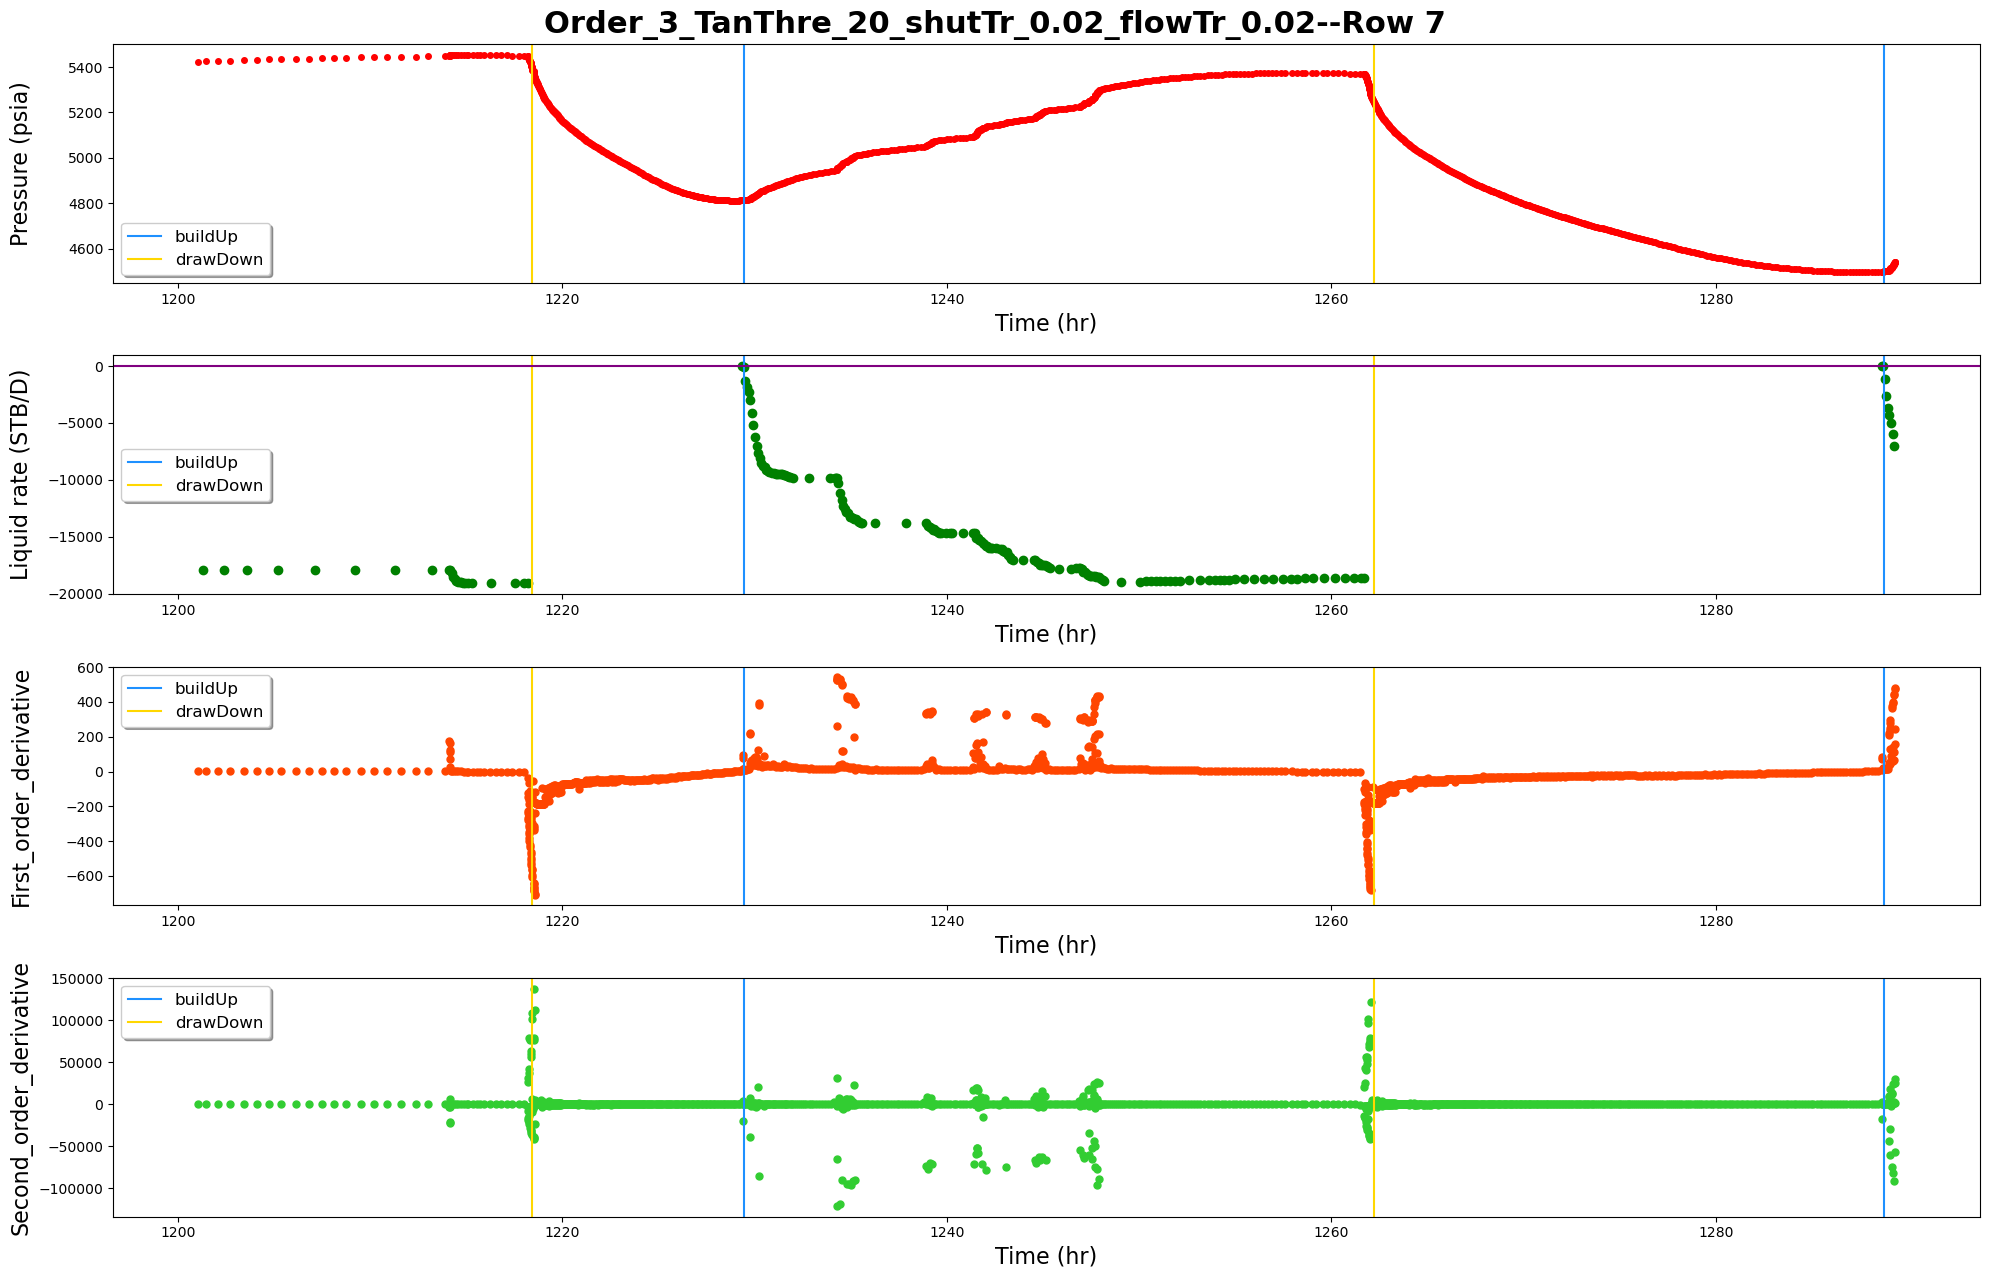

------row 8-----detected points:[9024]


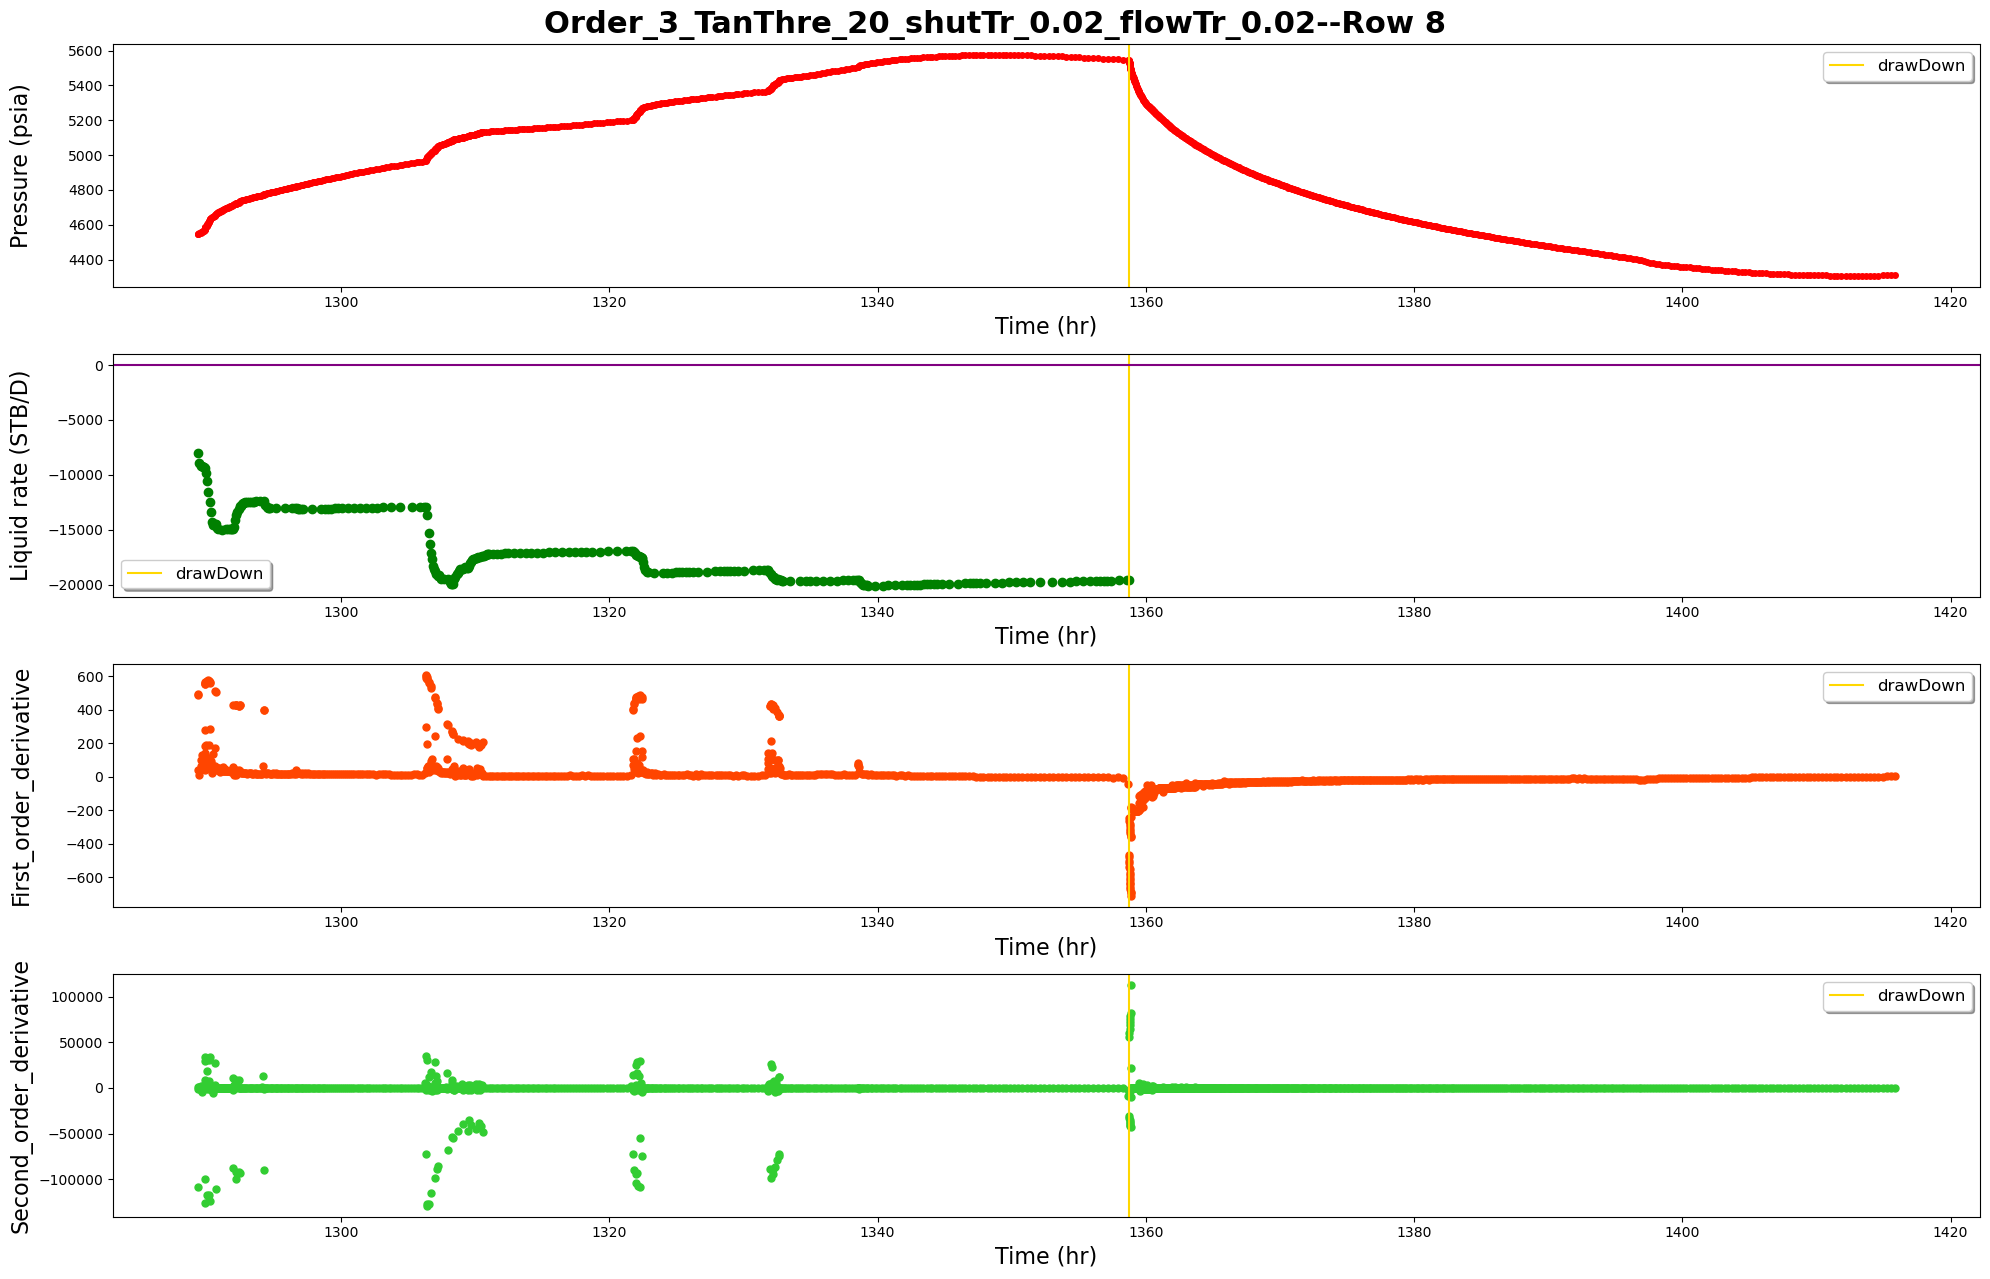

------row 9-----detected points:[9606, 10149, 10224, 10545]


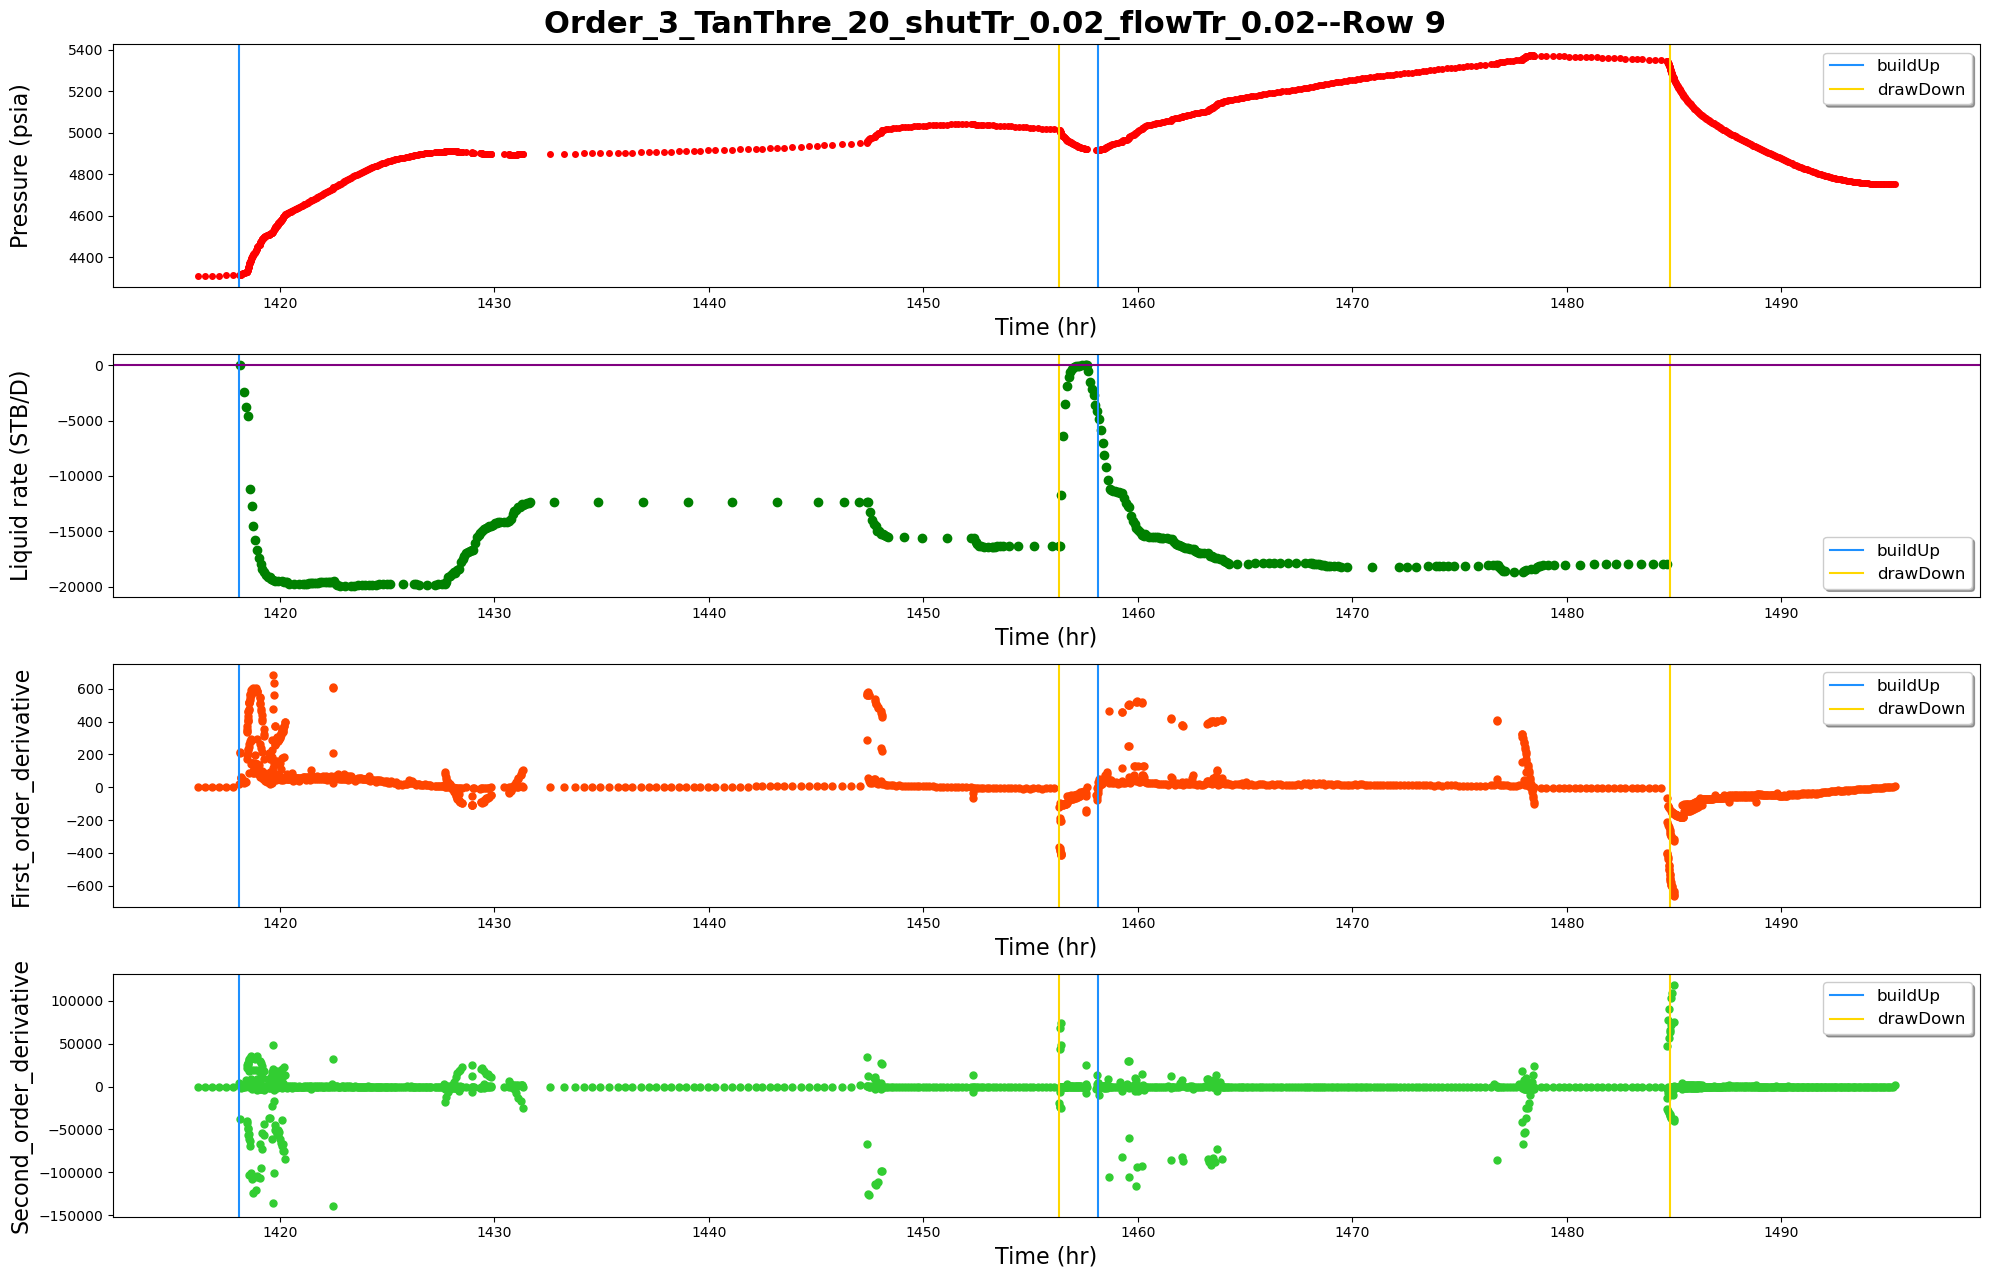

------row 10-----detected points:[10800, 11340, 11480]


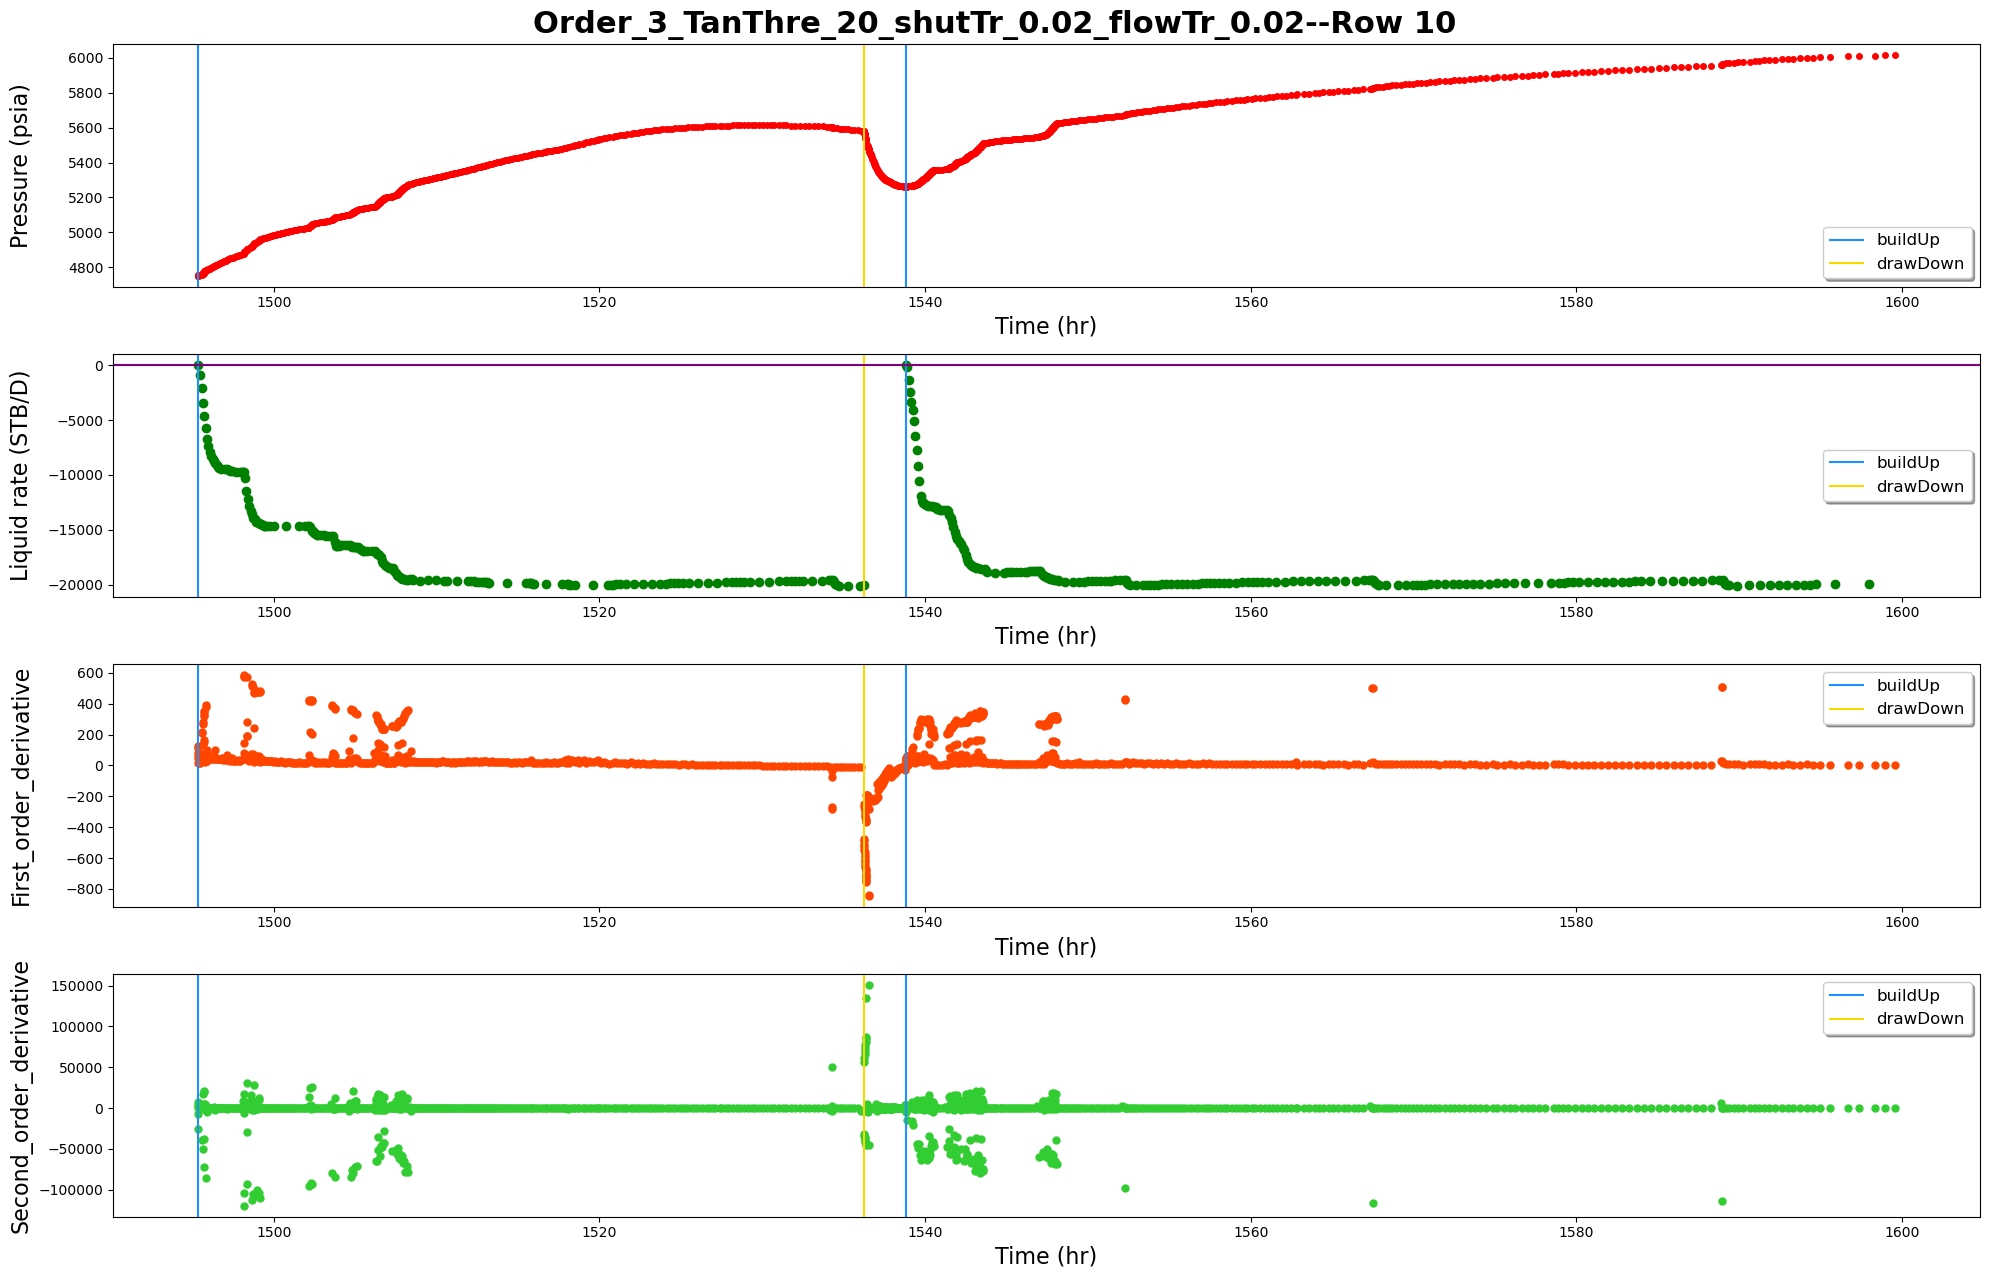

------row 11-----detected points:[12362, 13038]


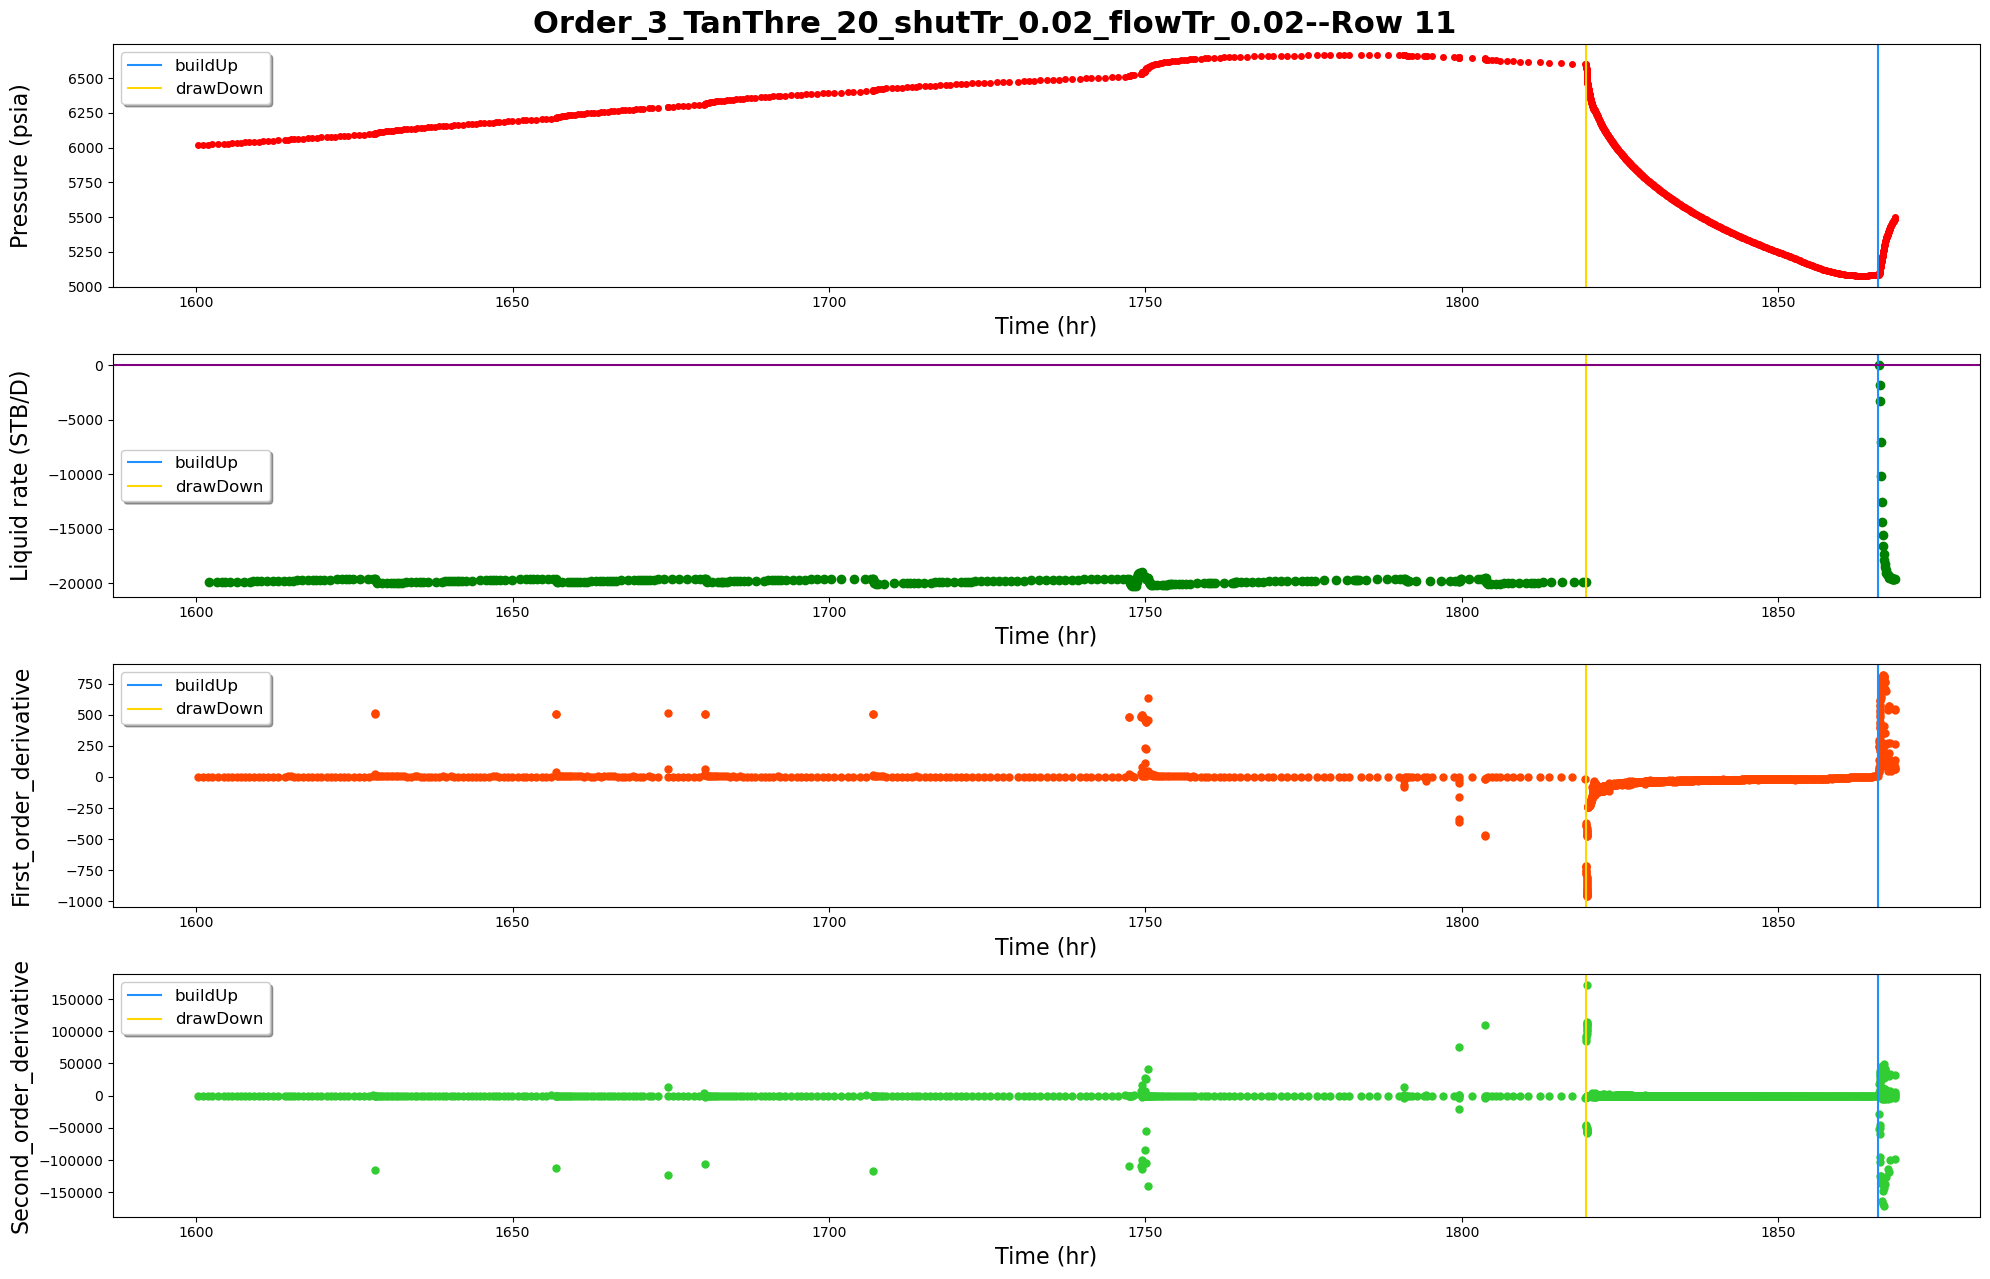

------row 12-----detected points:[13909, 14085]


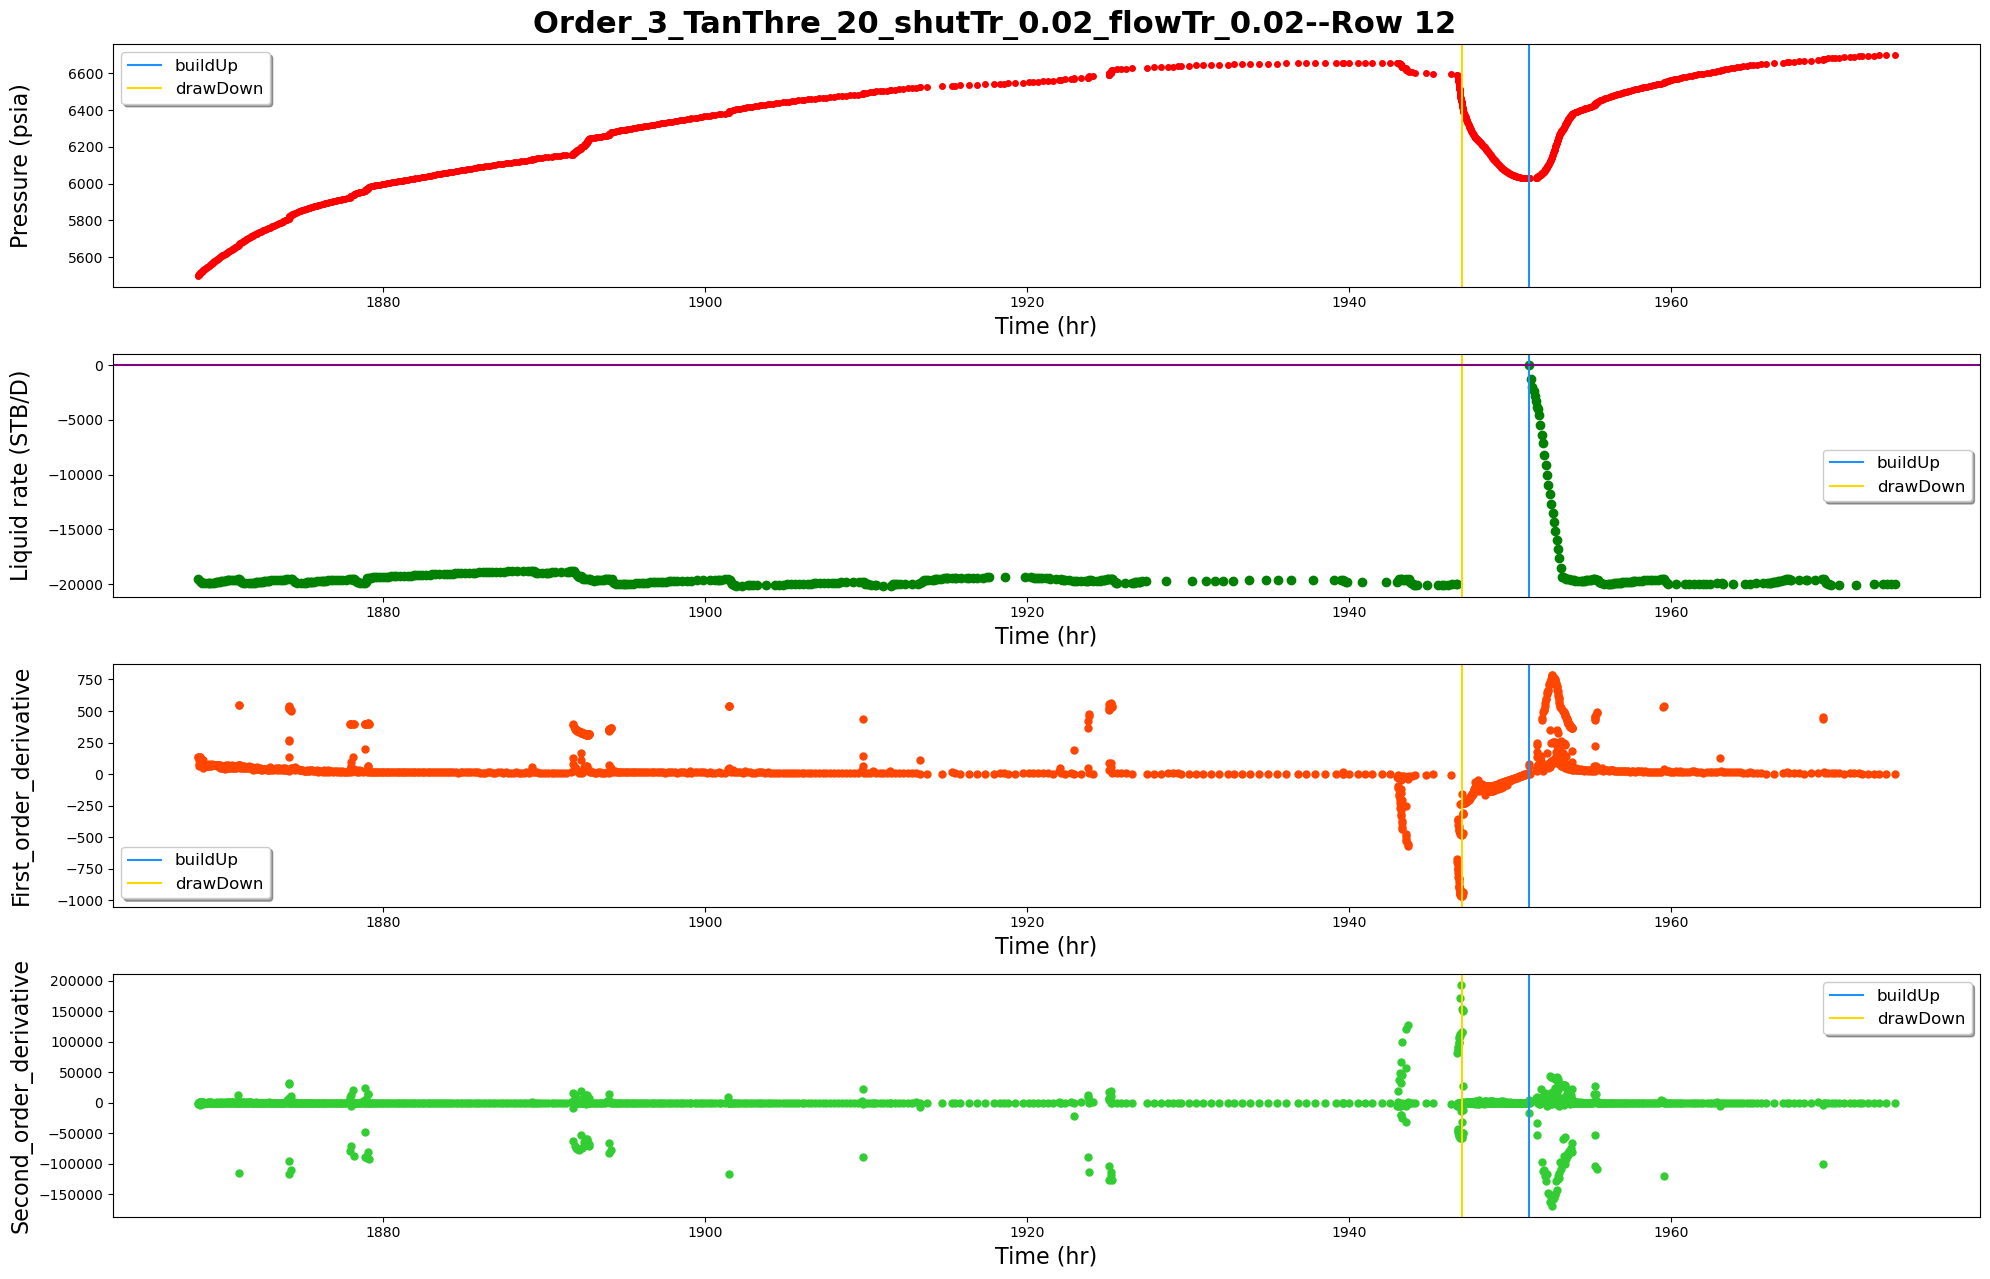

------row 13-----detected points:[14477, 14574, 14774, 15342]


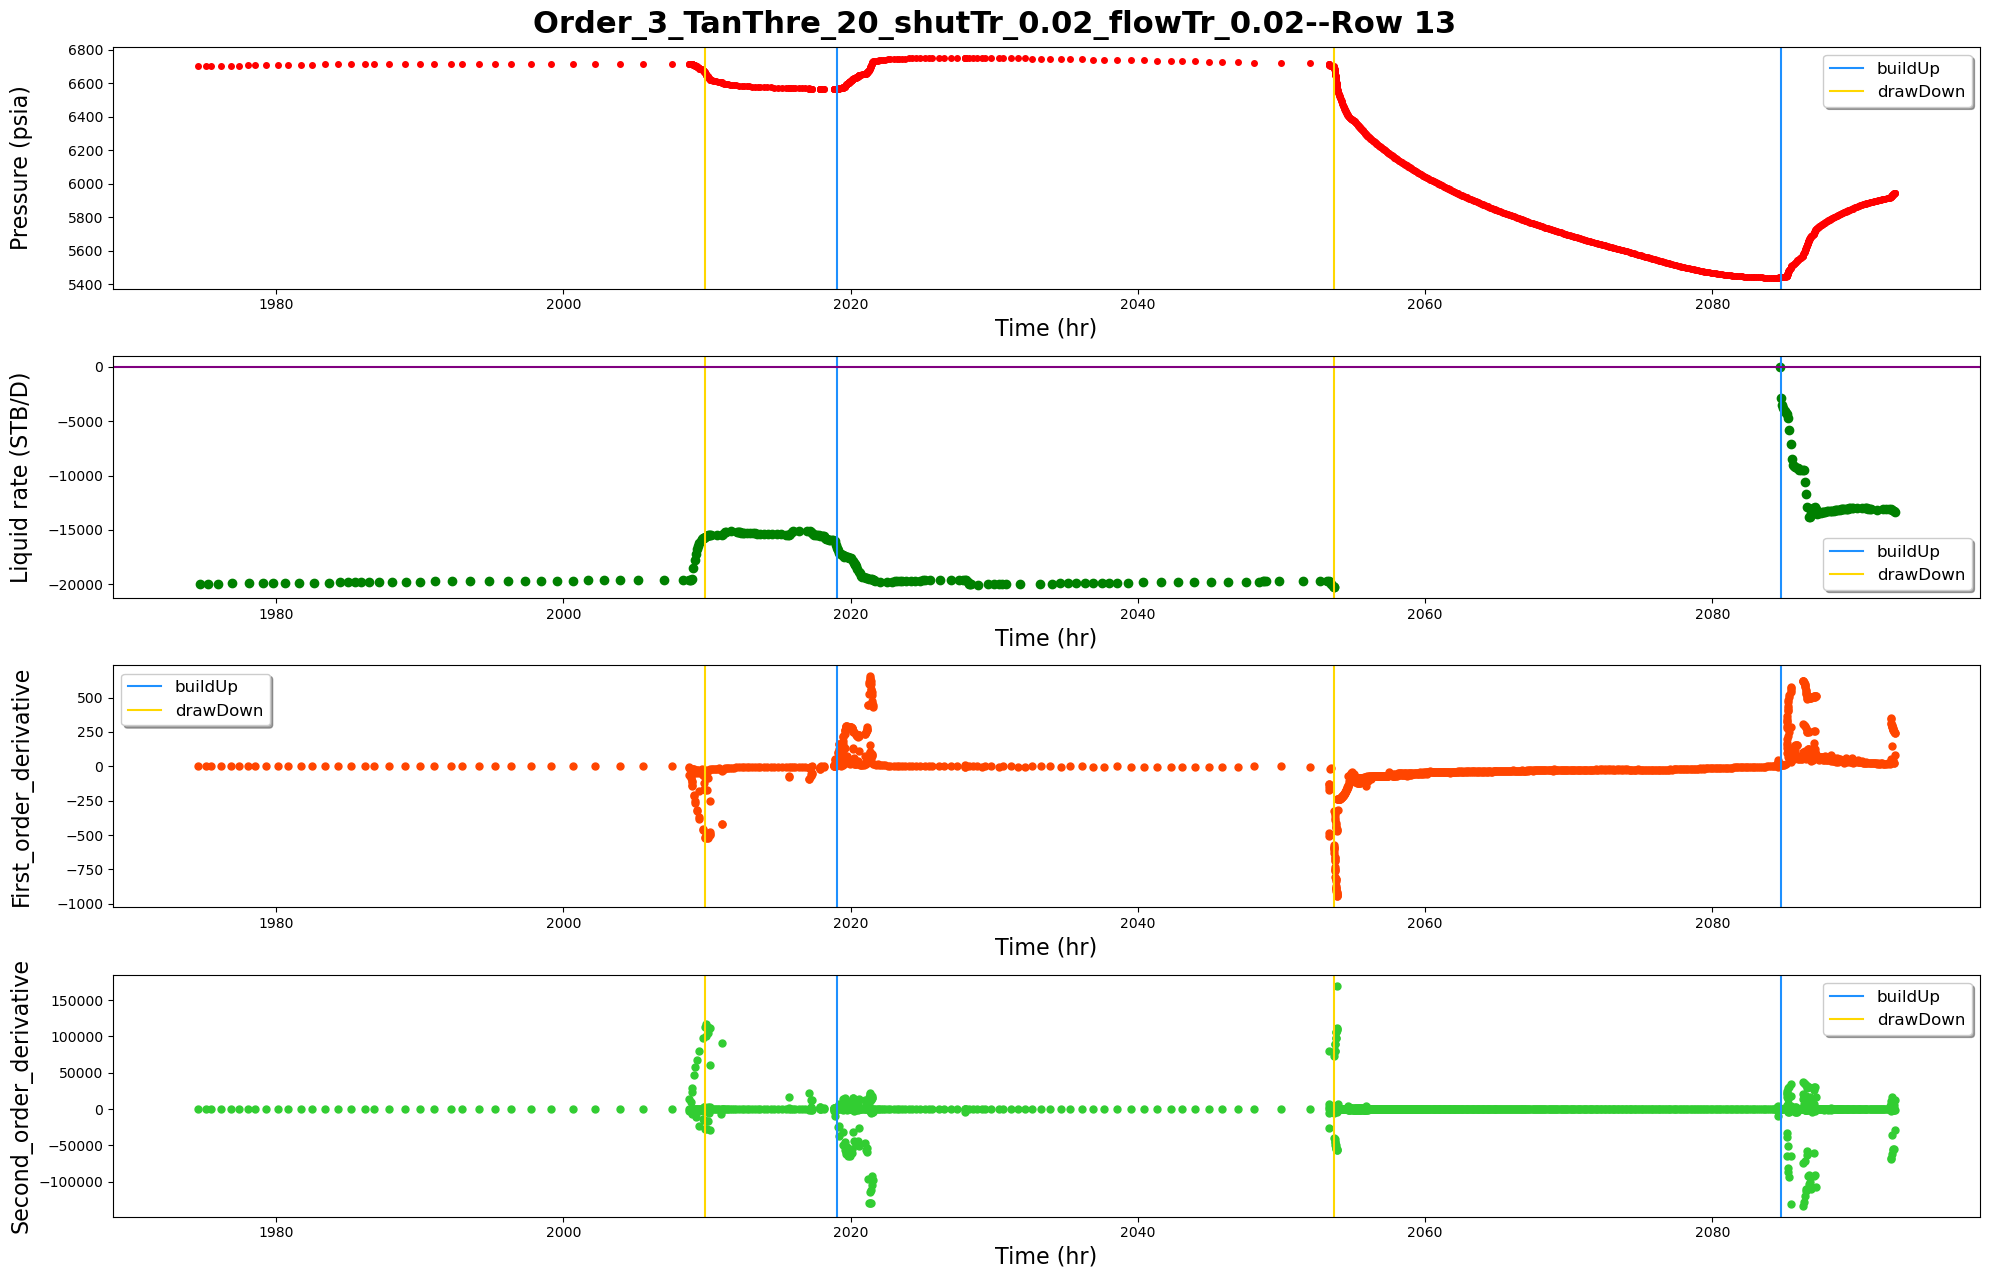

------row 14-----detected points:[16096, 16580]


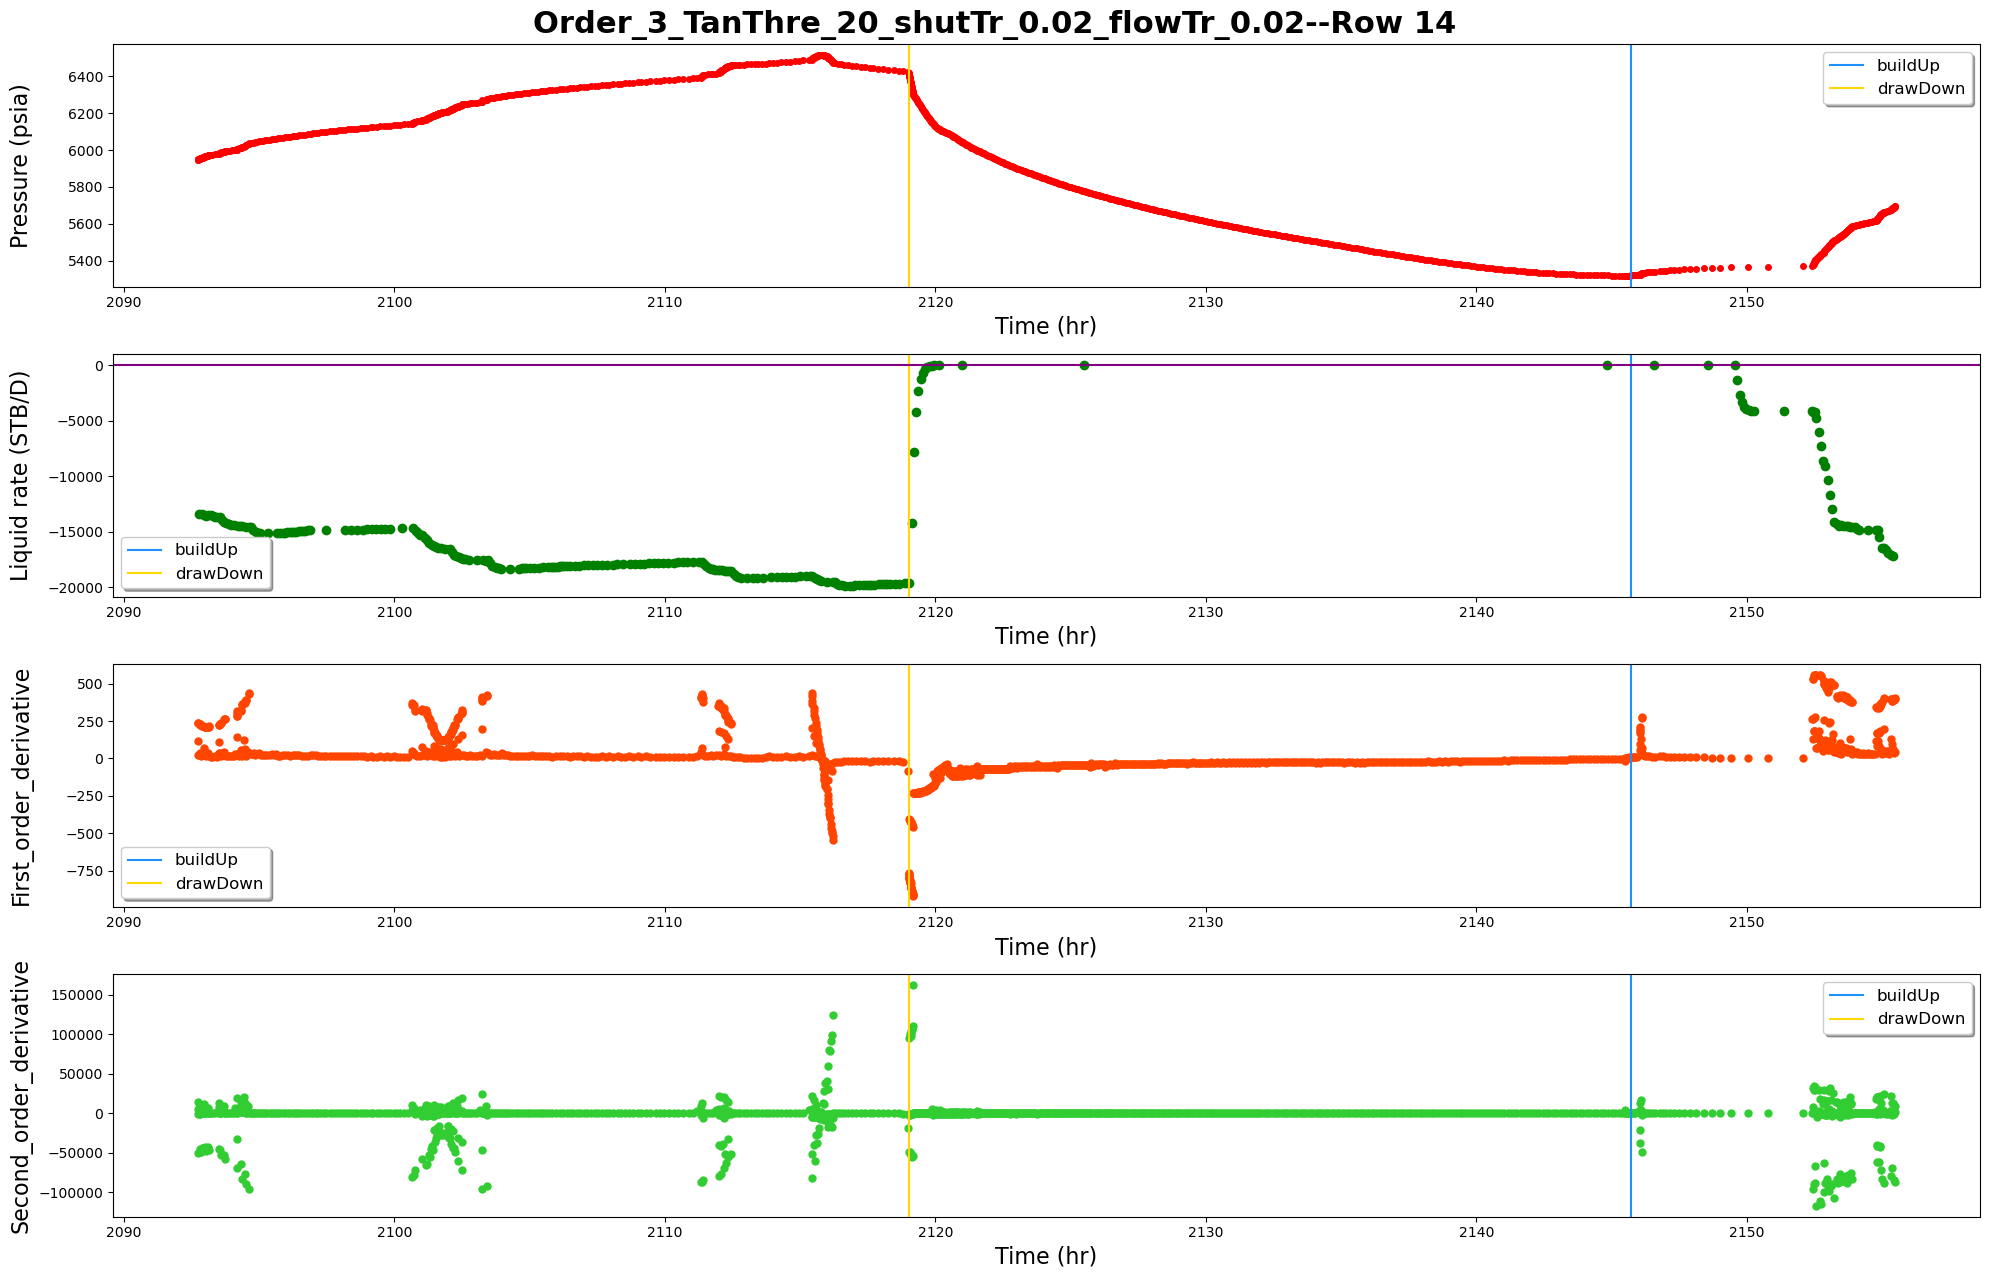

------row 15-----detected points:[17631]


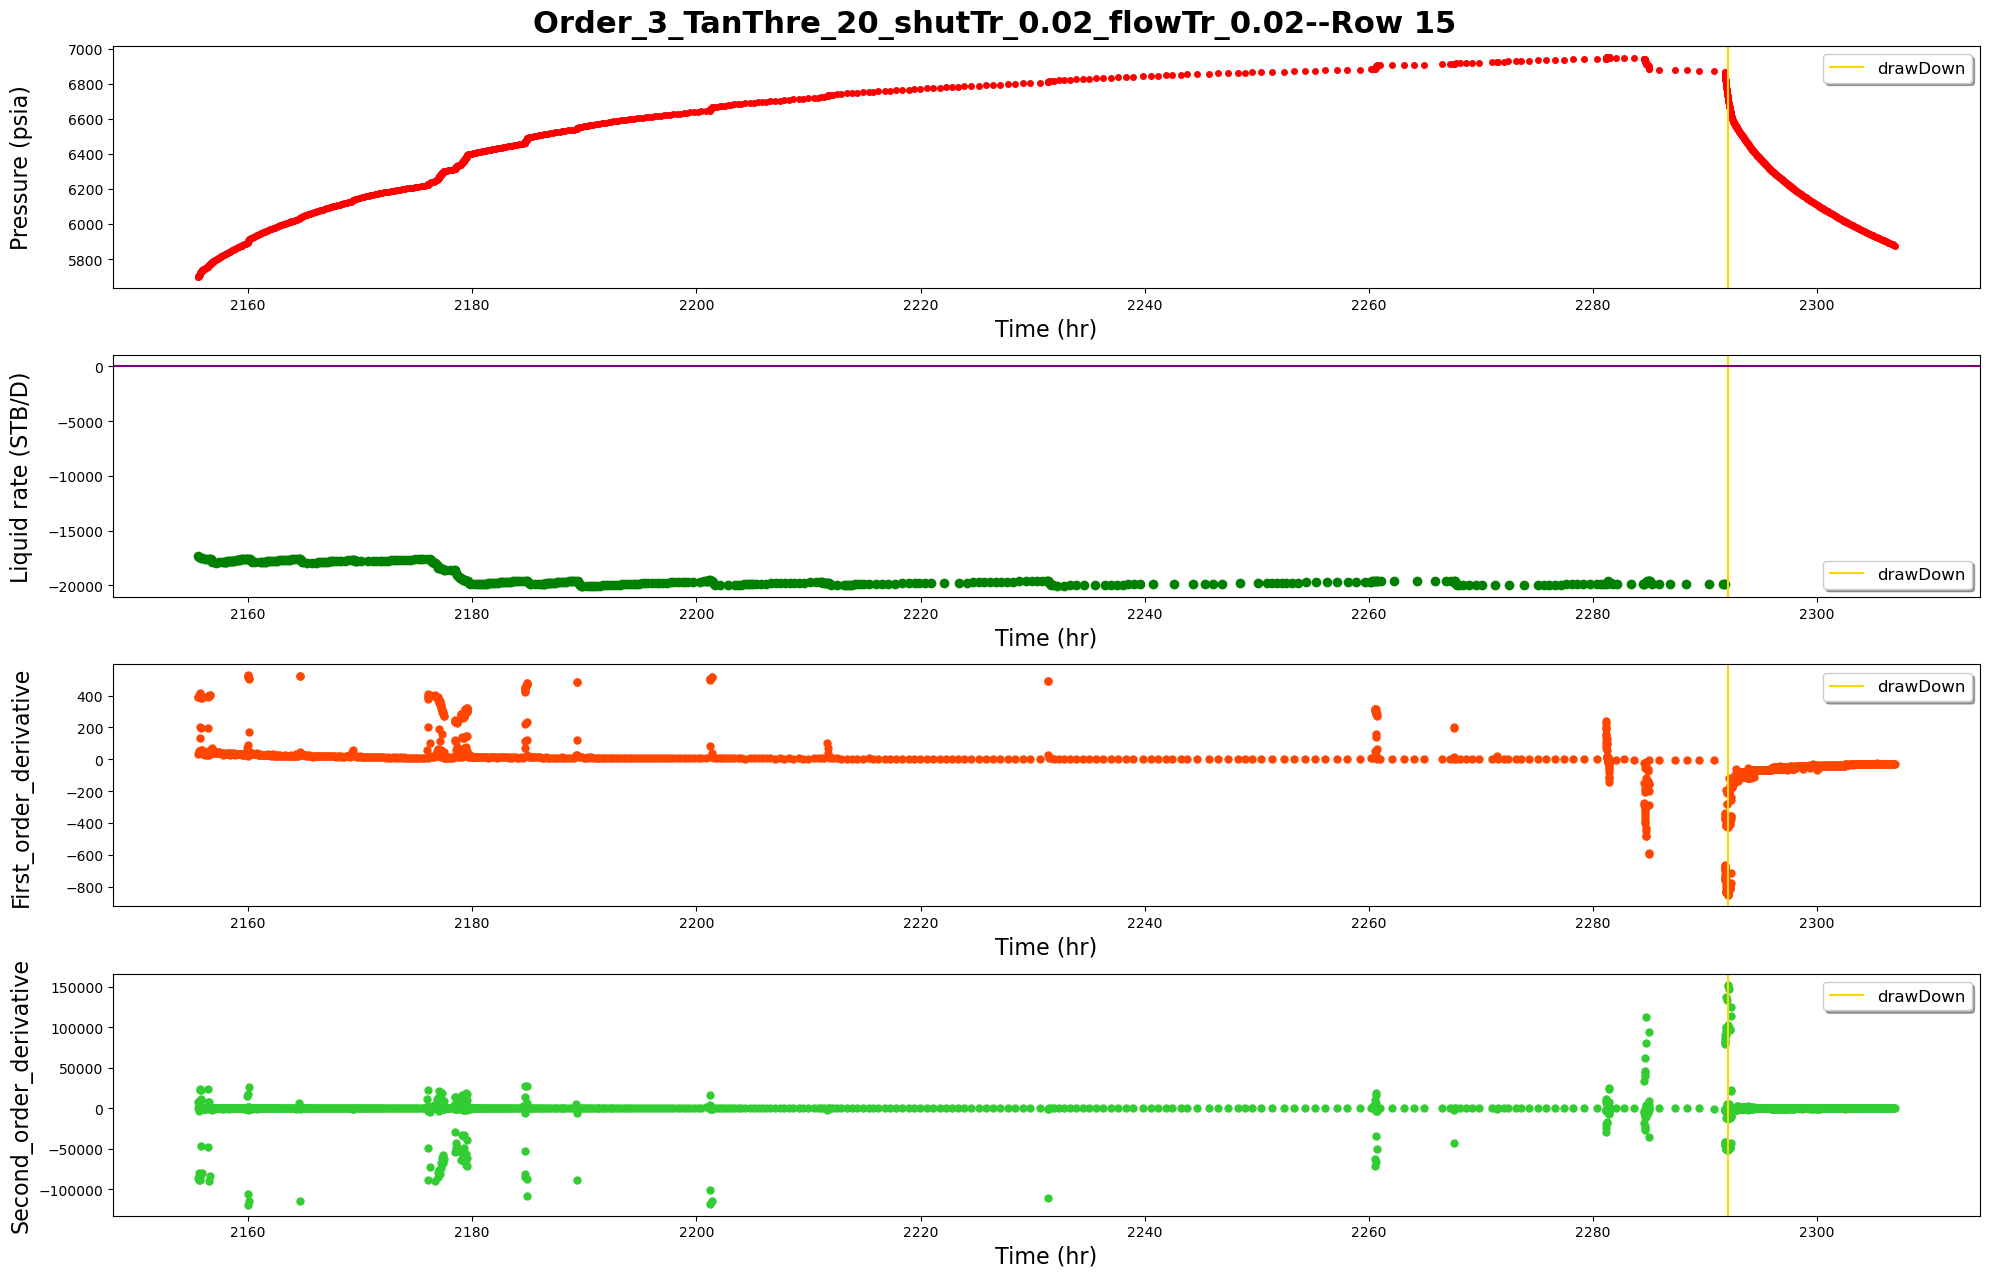

------row 16-----detected points:[18433]


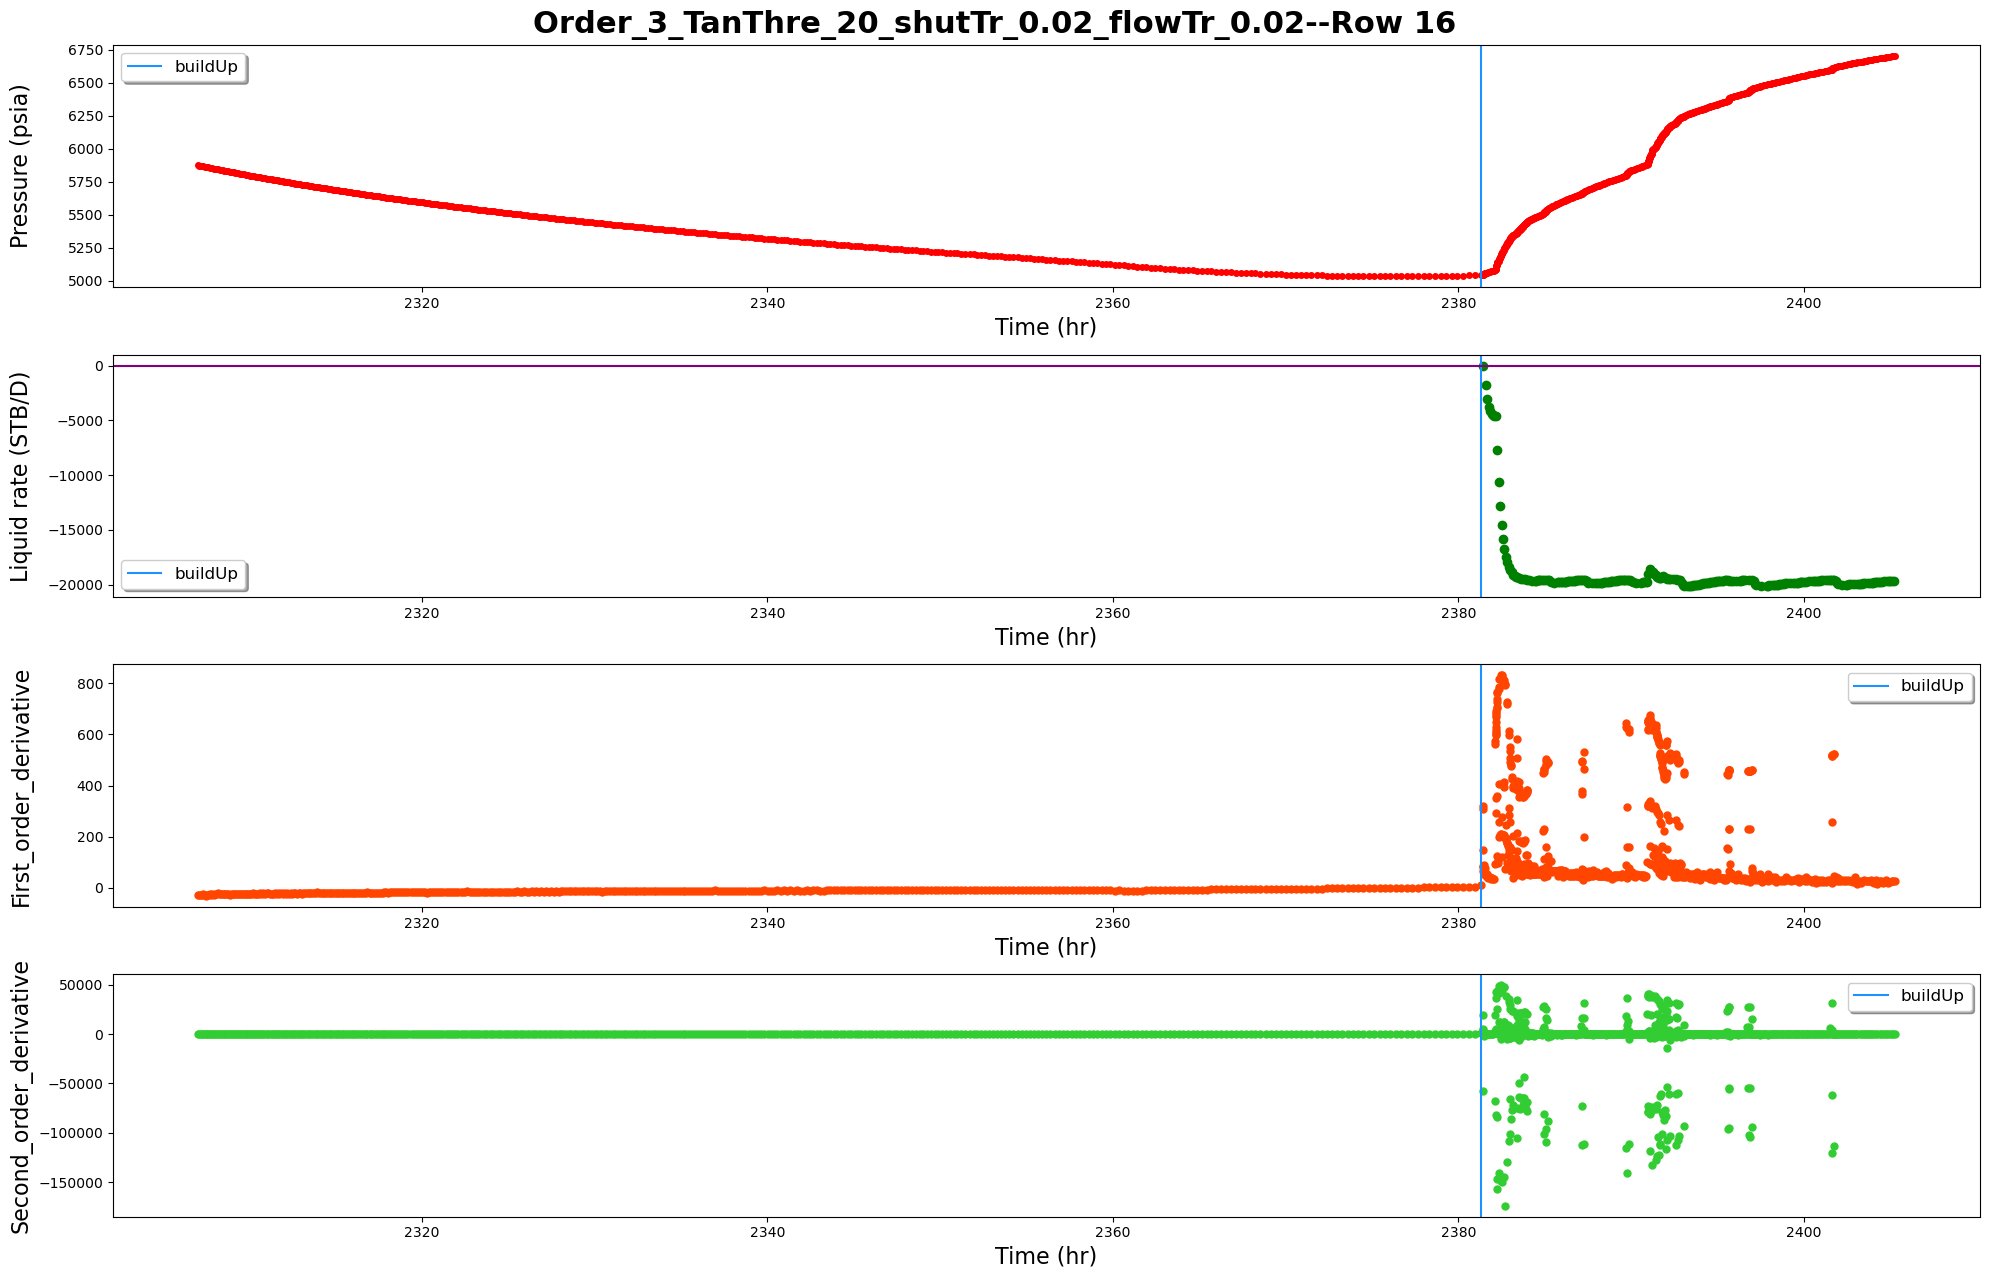

------row 17-----detected points:[19642, 19761, 20077, 20342]


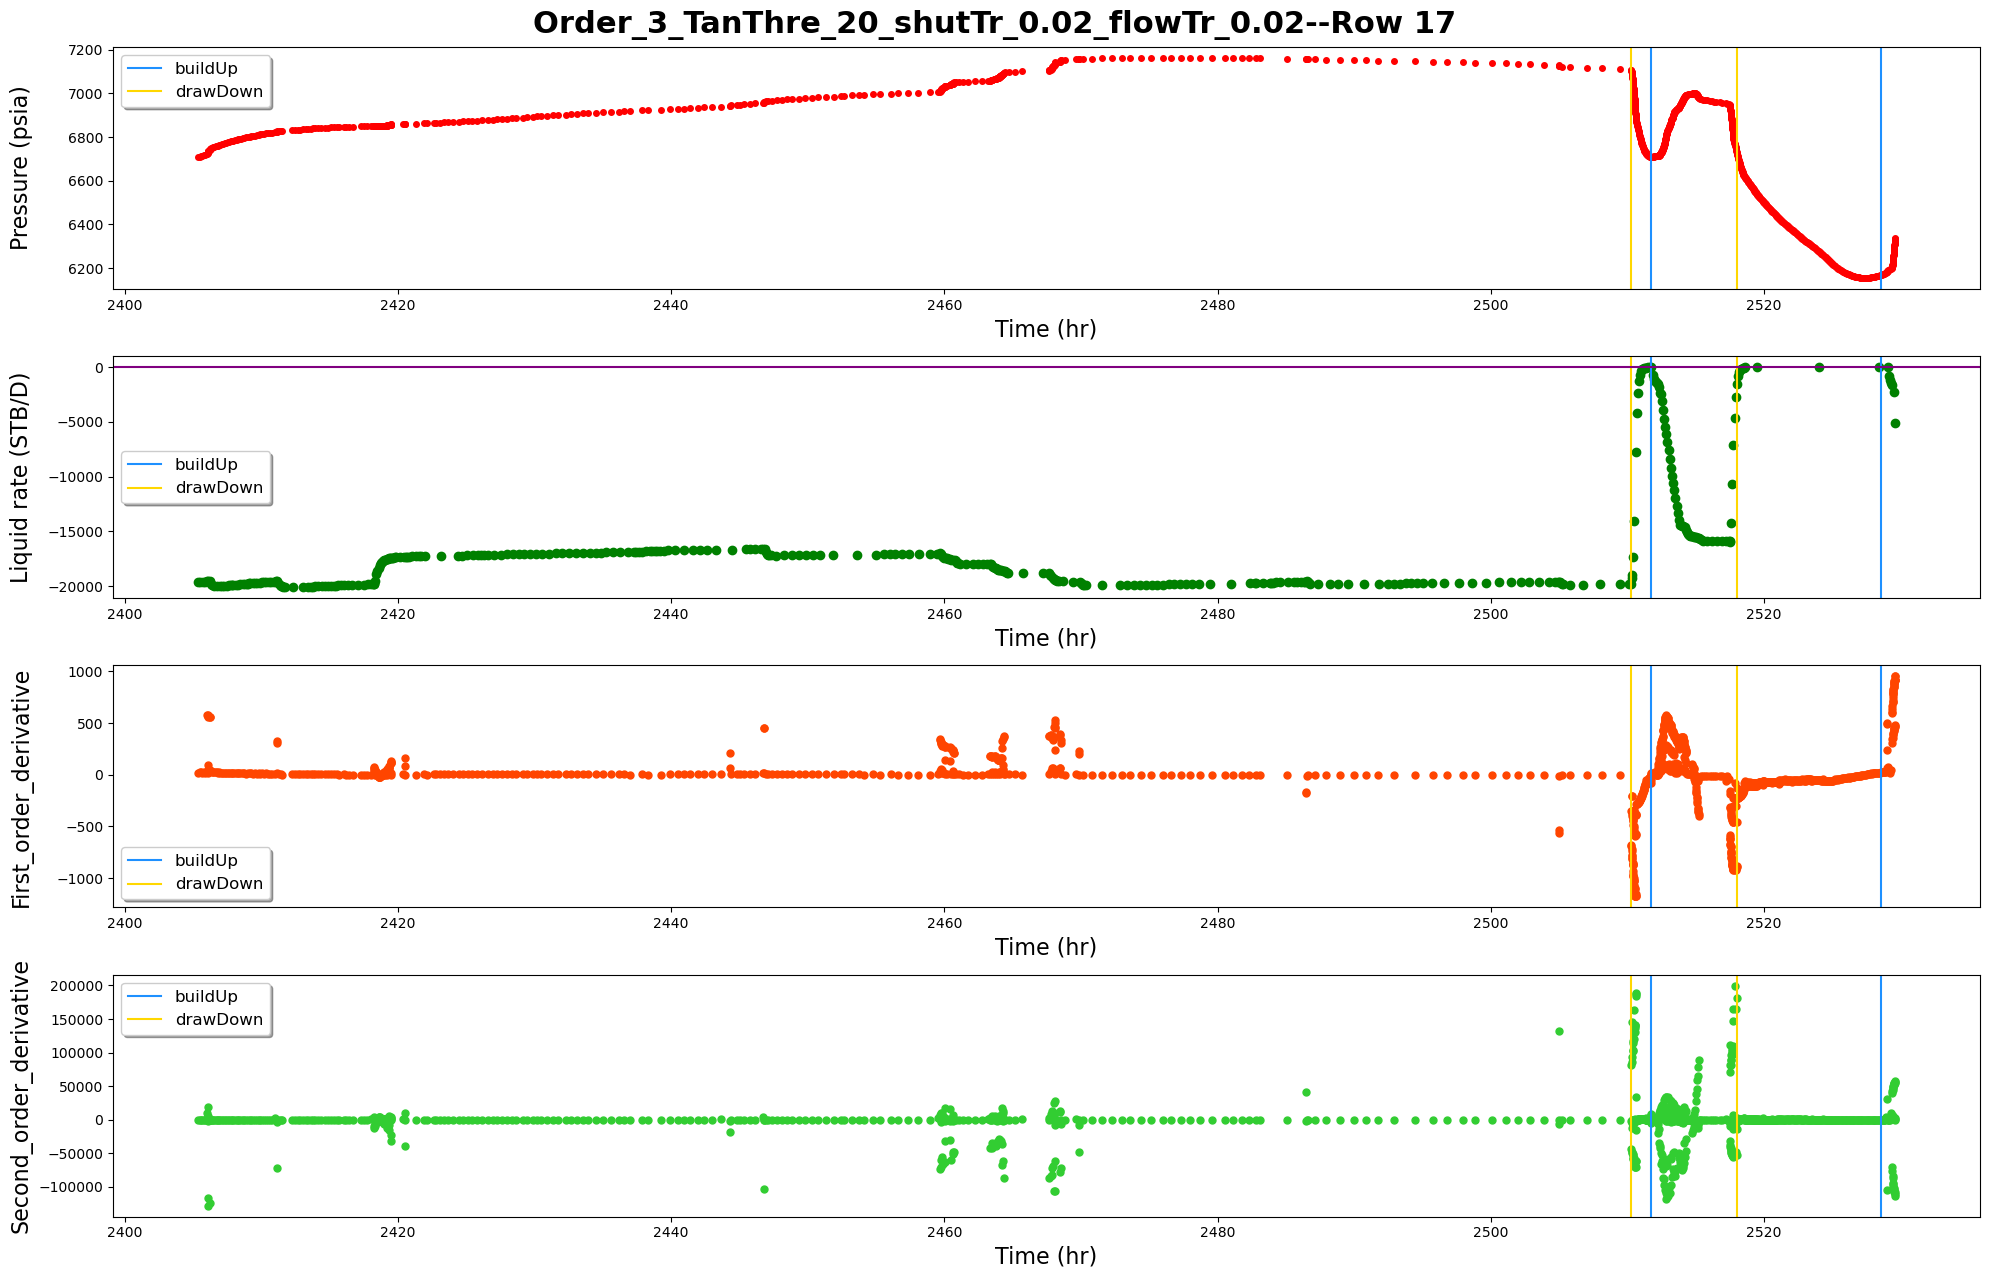

------row 18-----detected points:[20700, 21031]


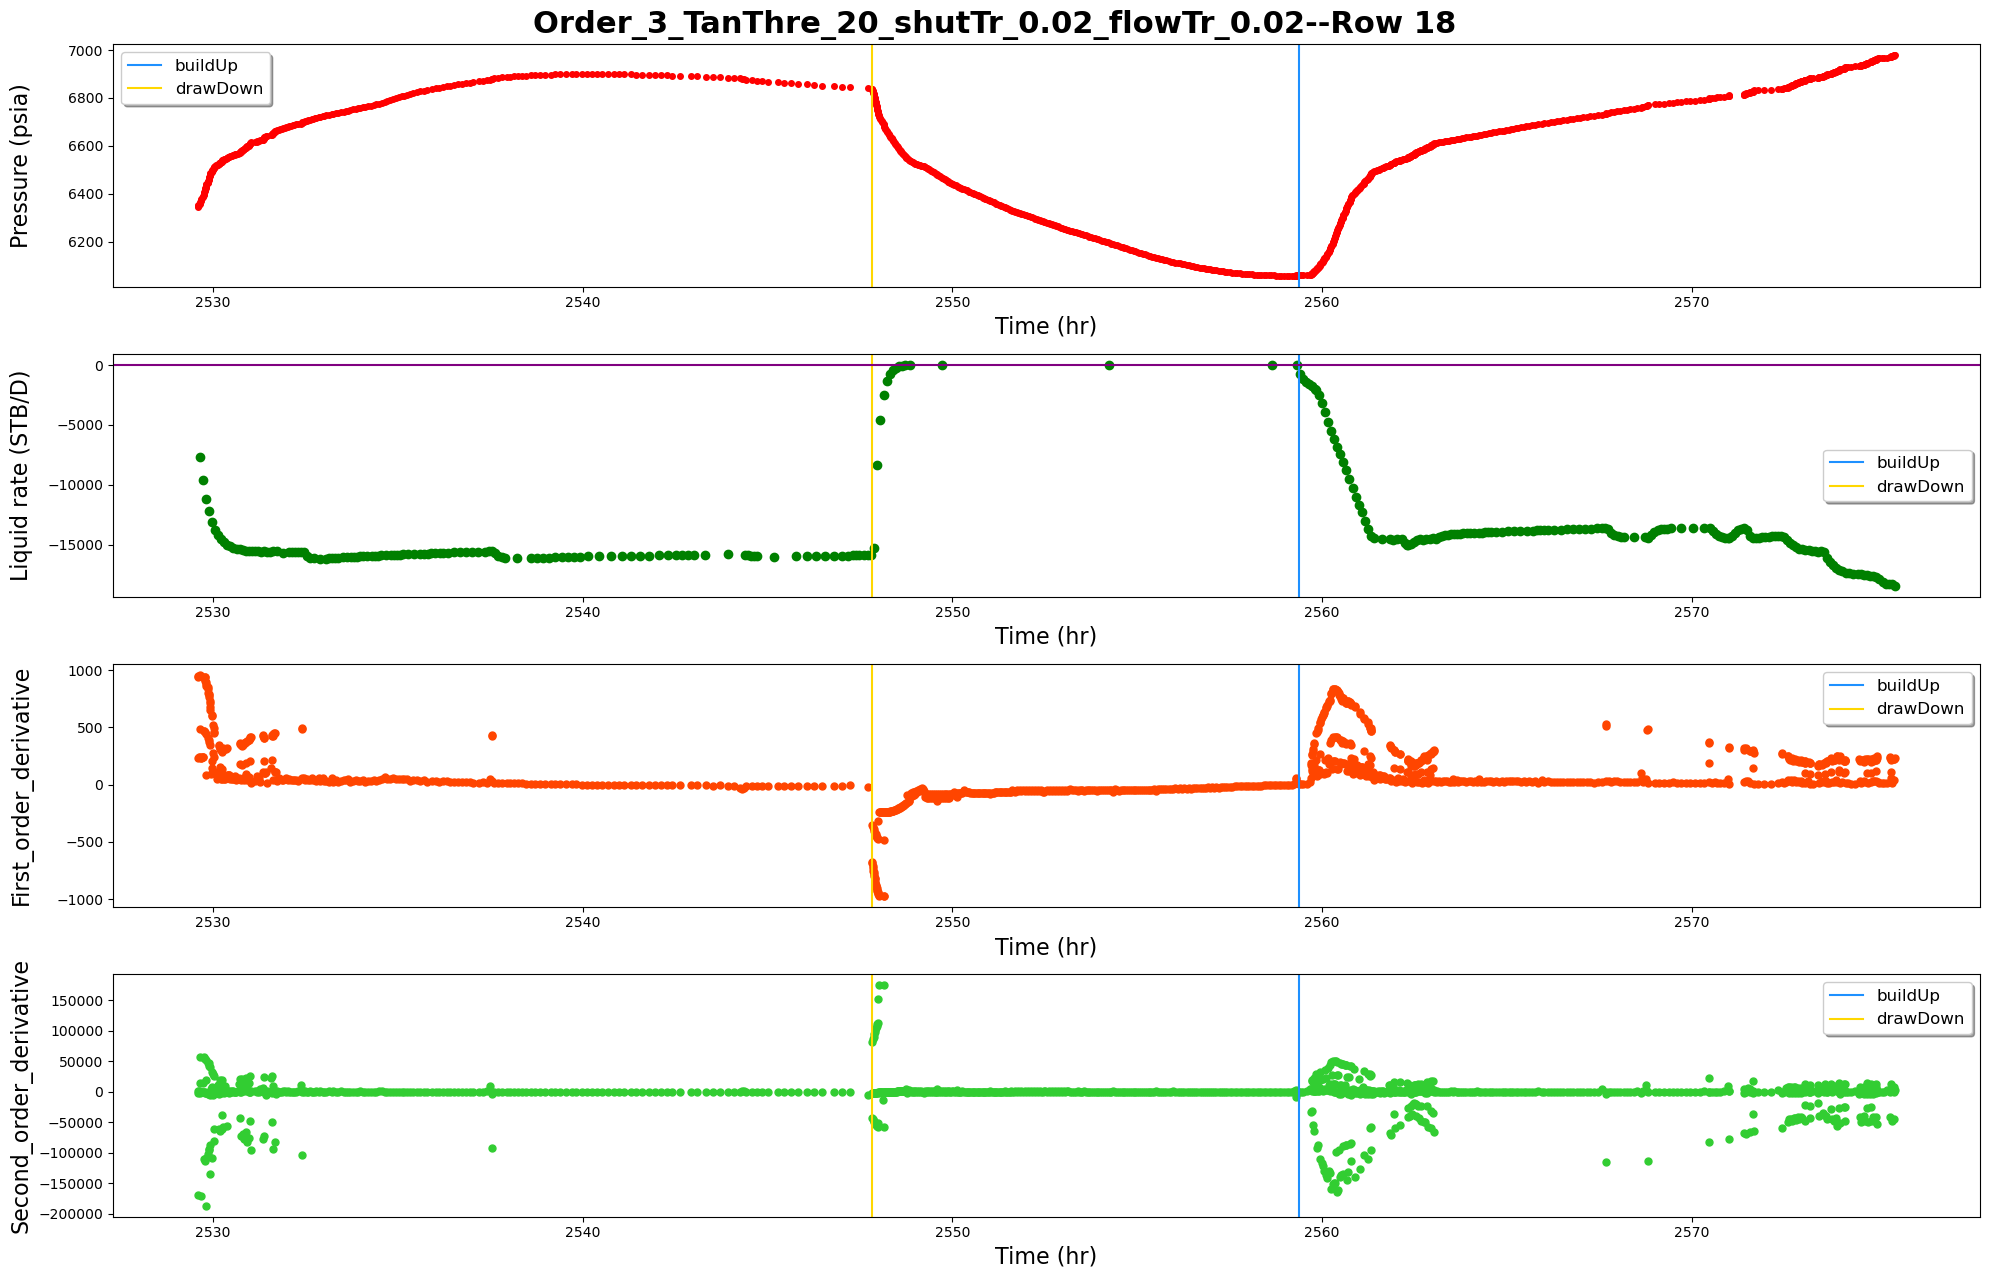

------row 19-----detected points:[21974, 22181, 22728]


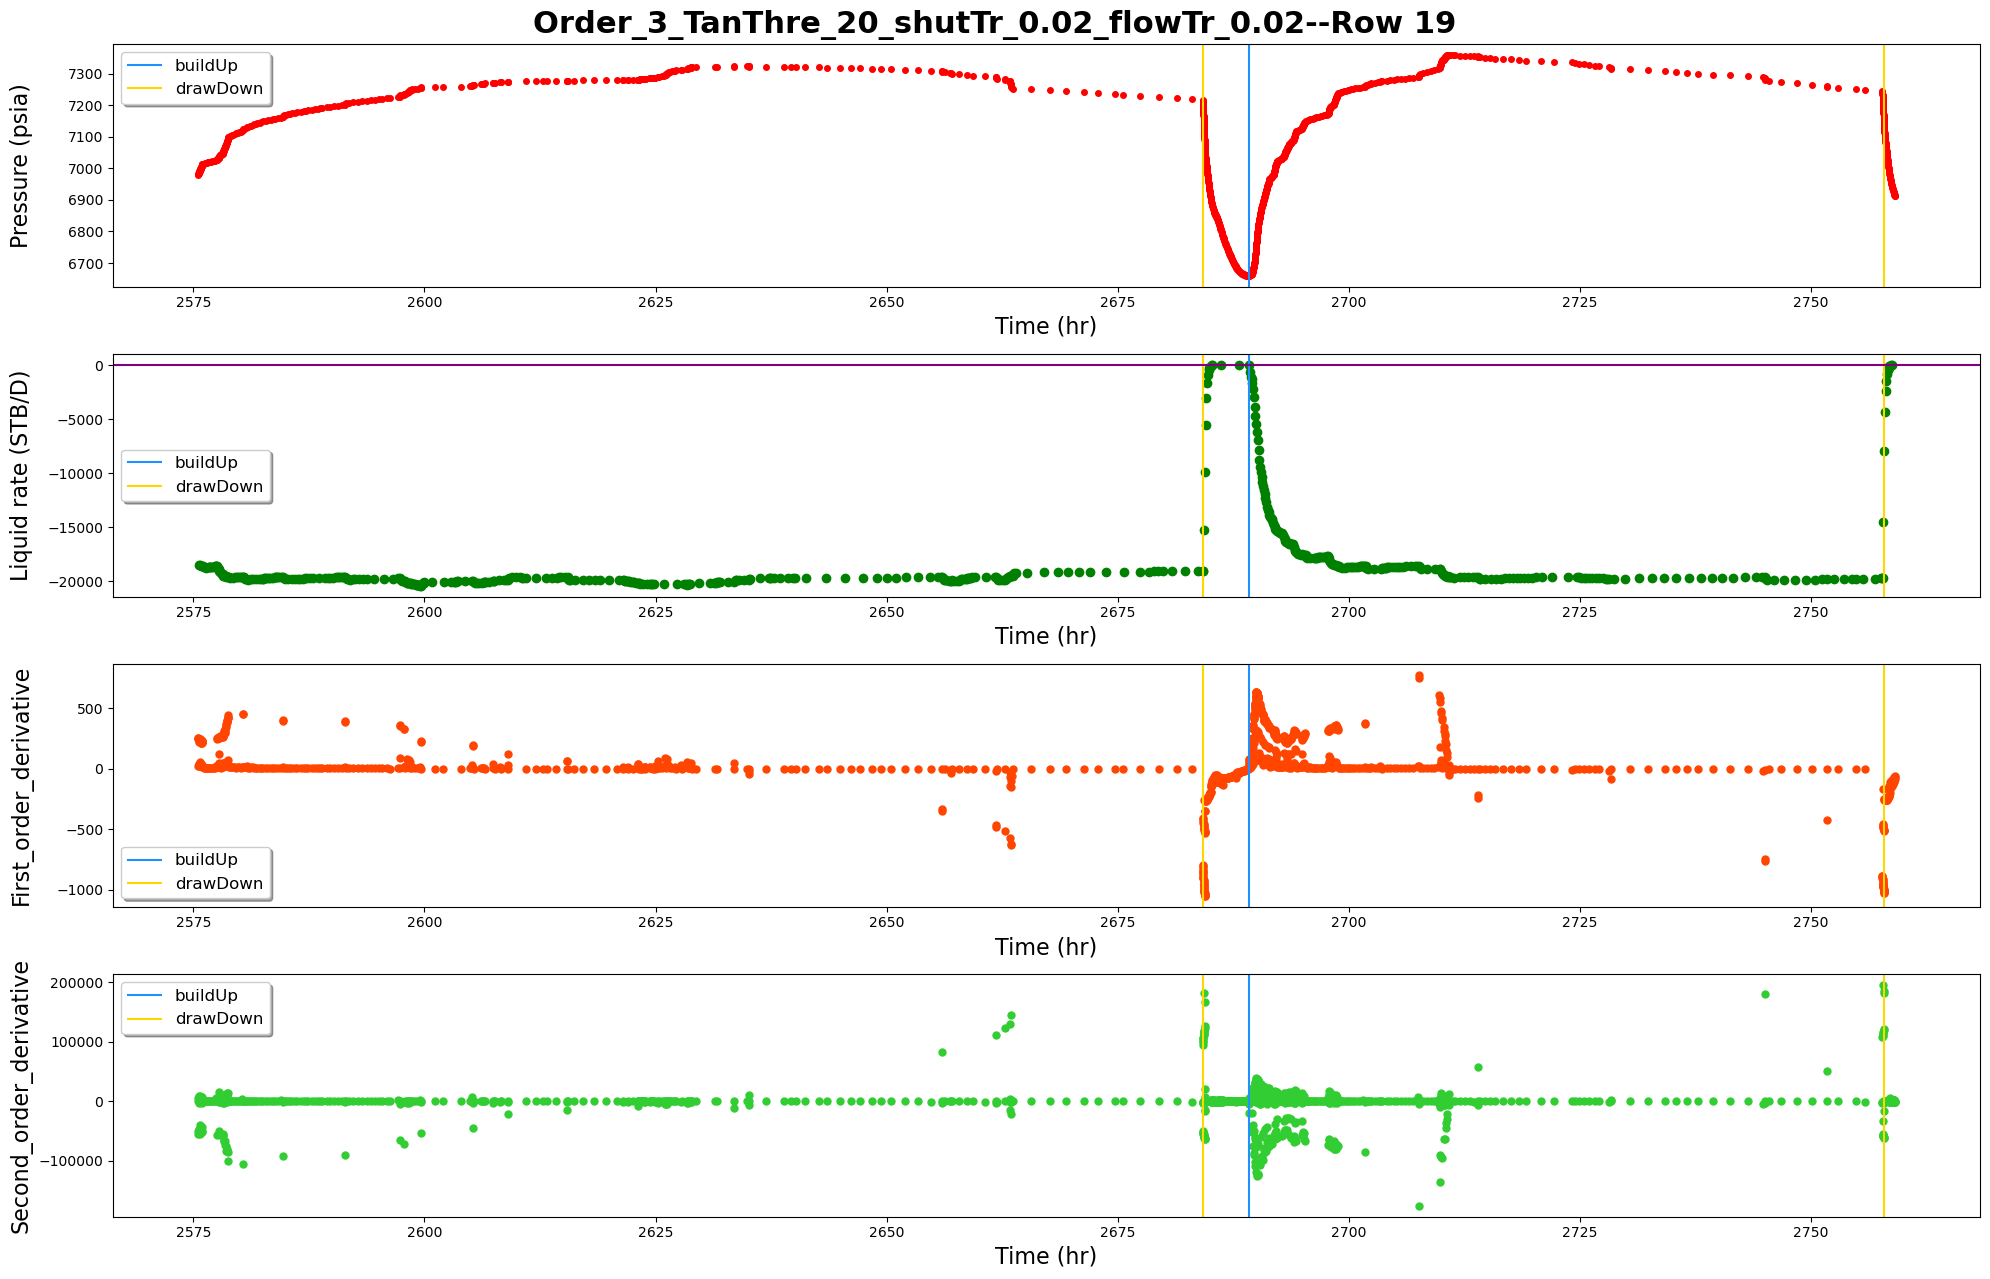

------row 20-----detected points:[23227]


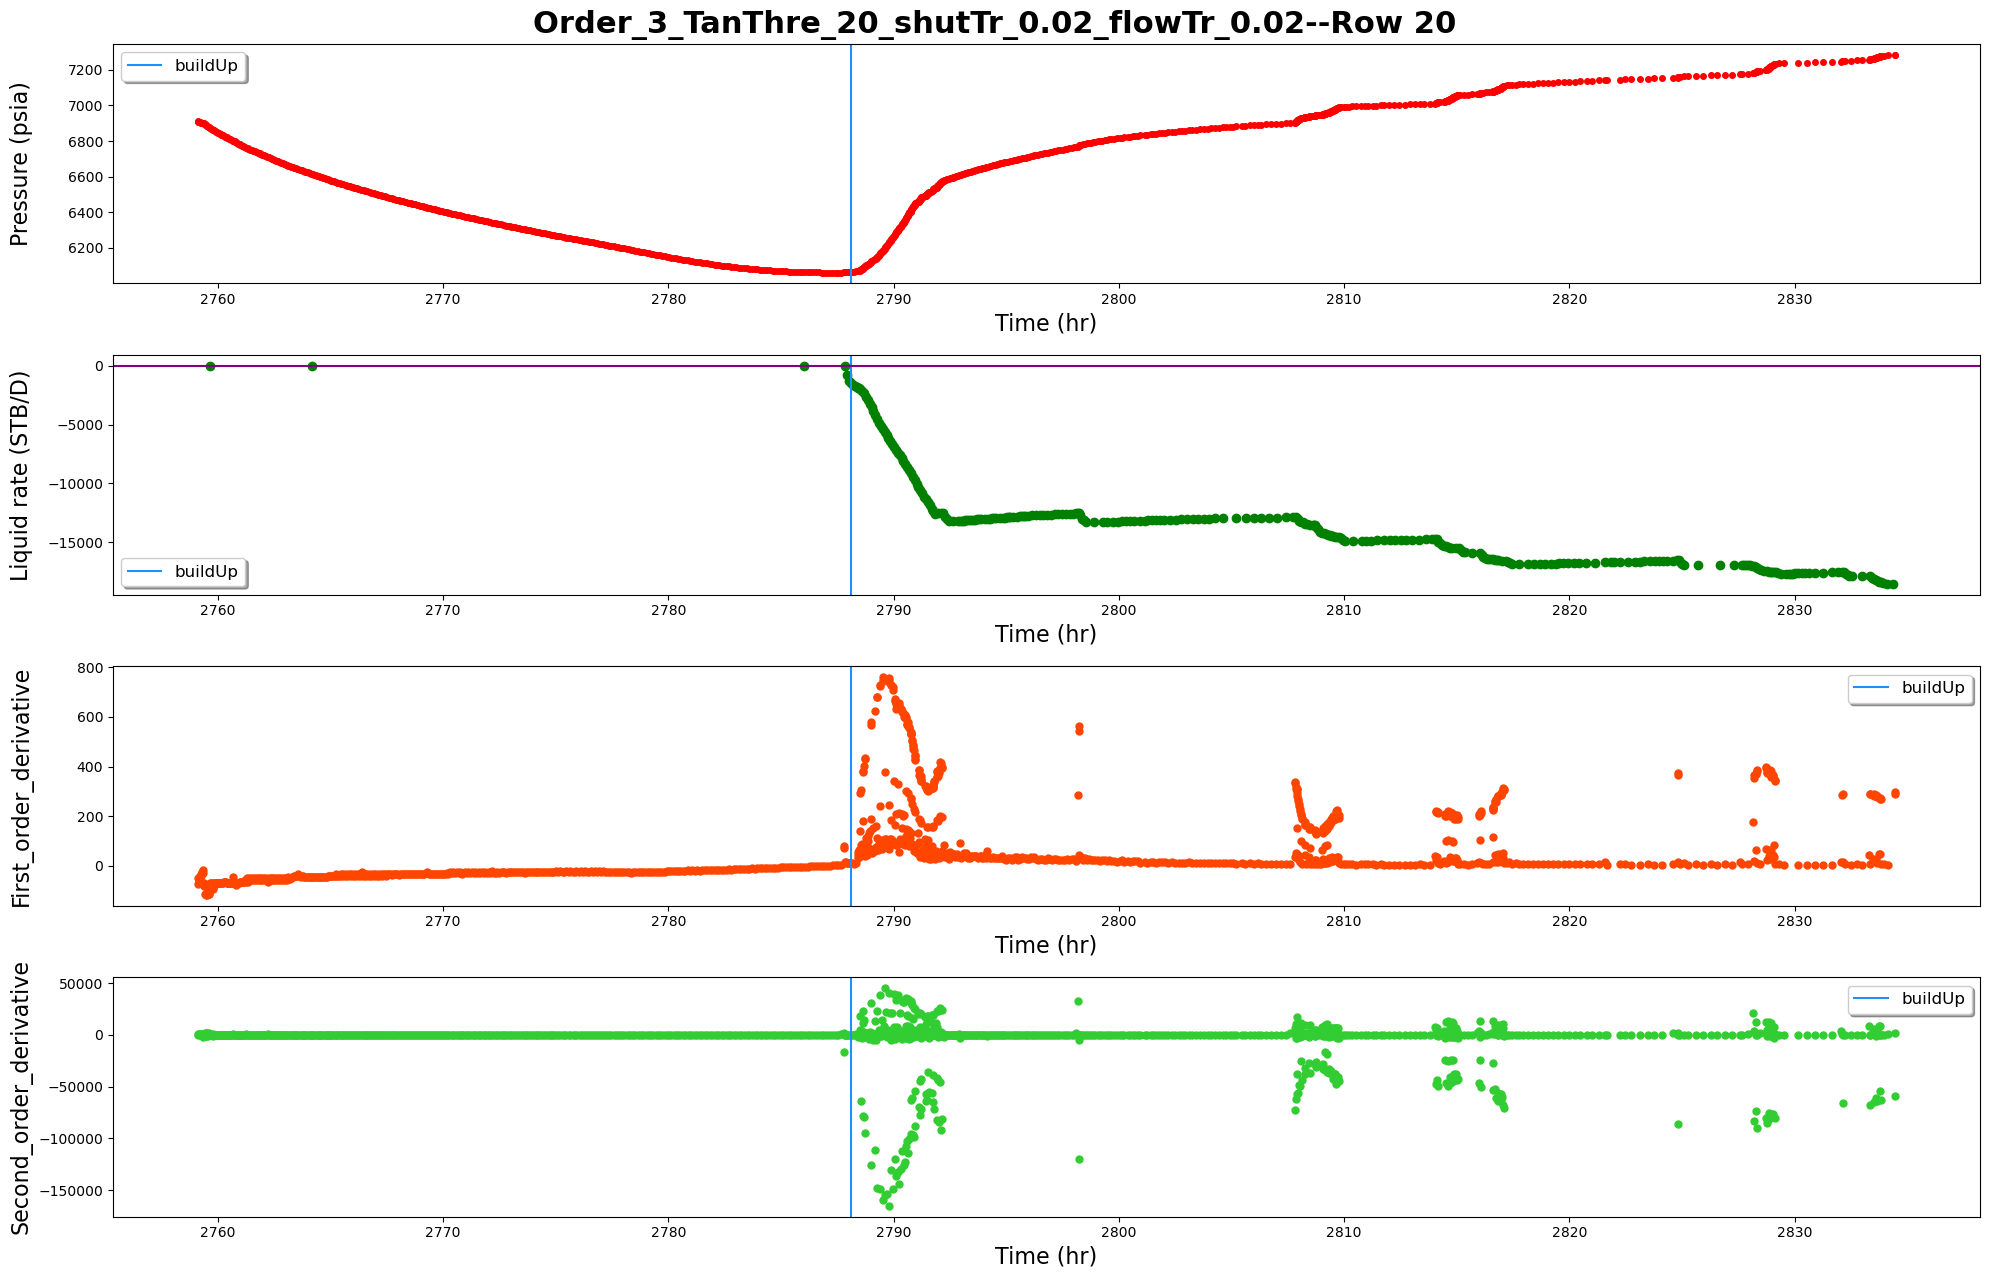

------row 21-----detected points:[24215, 24679]


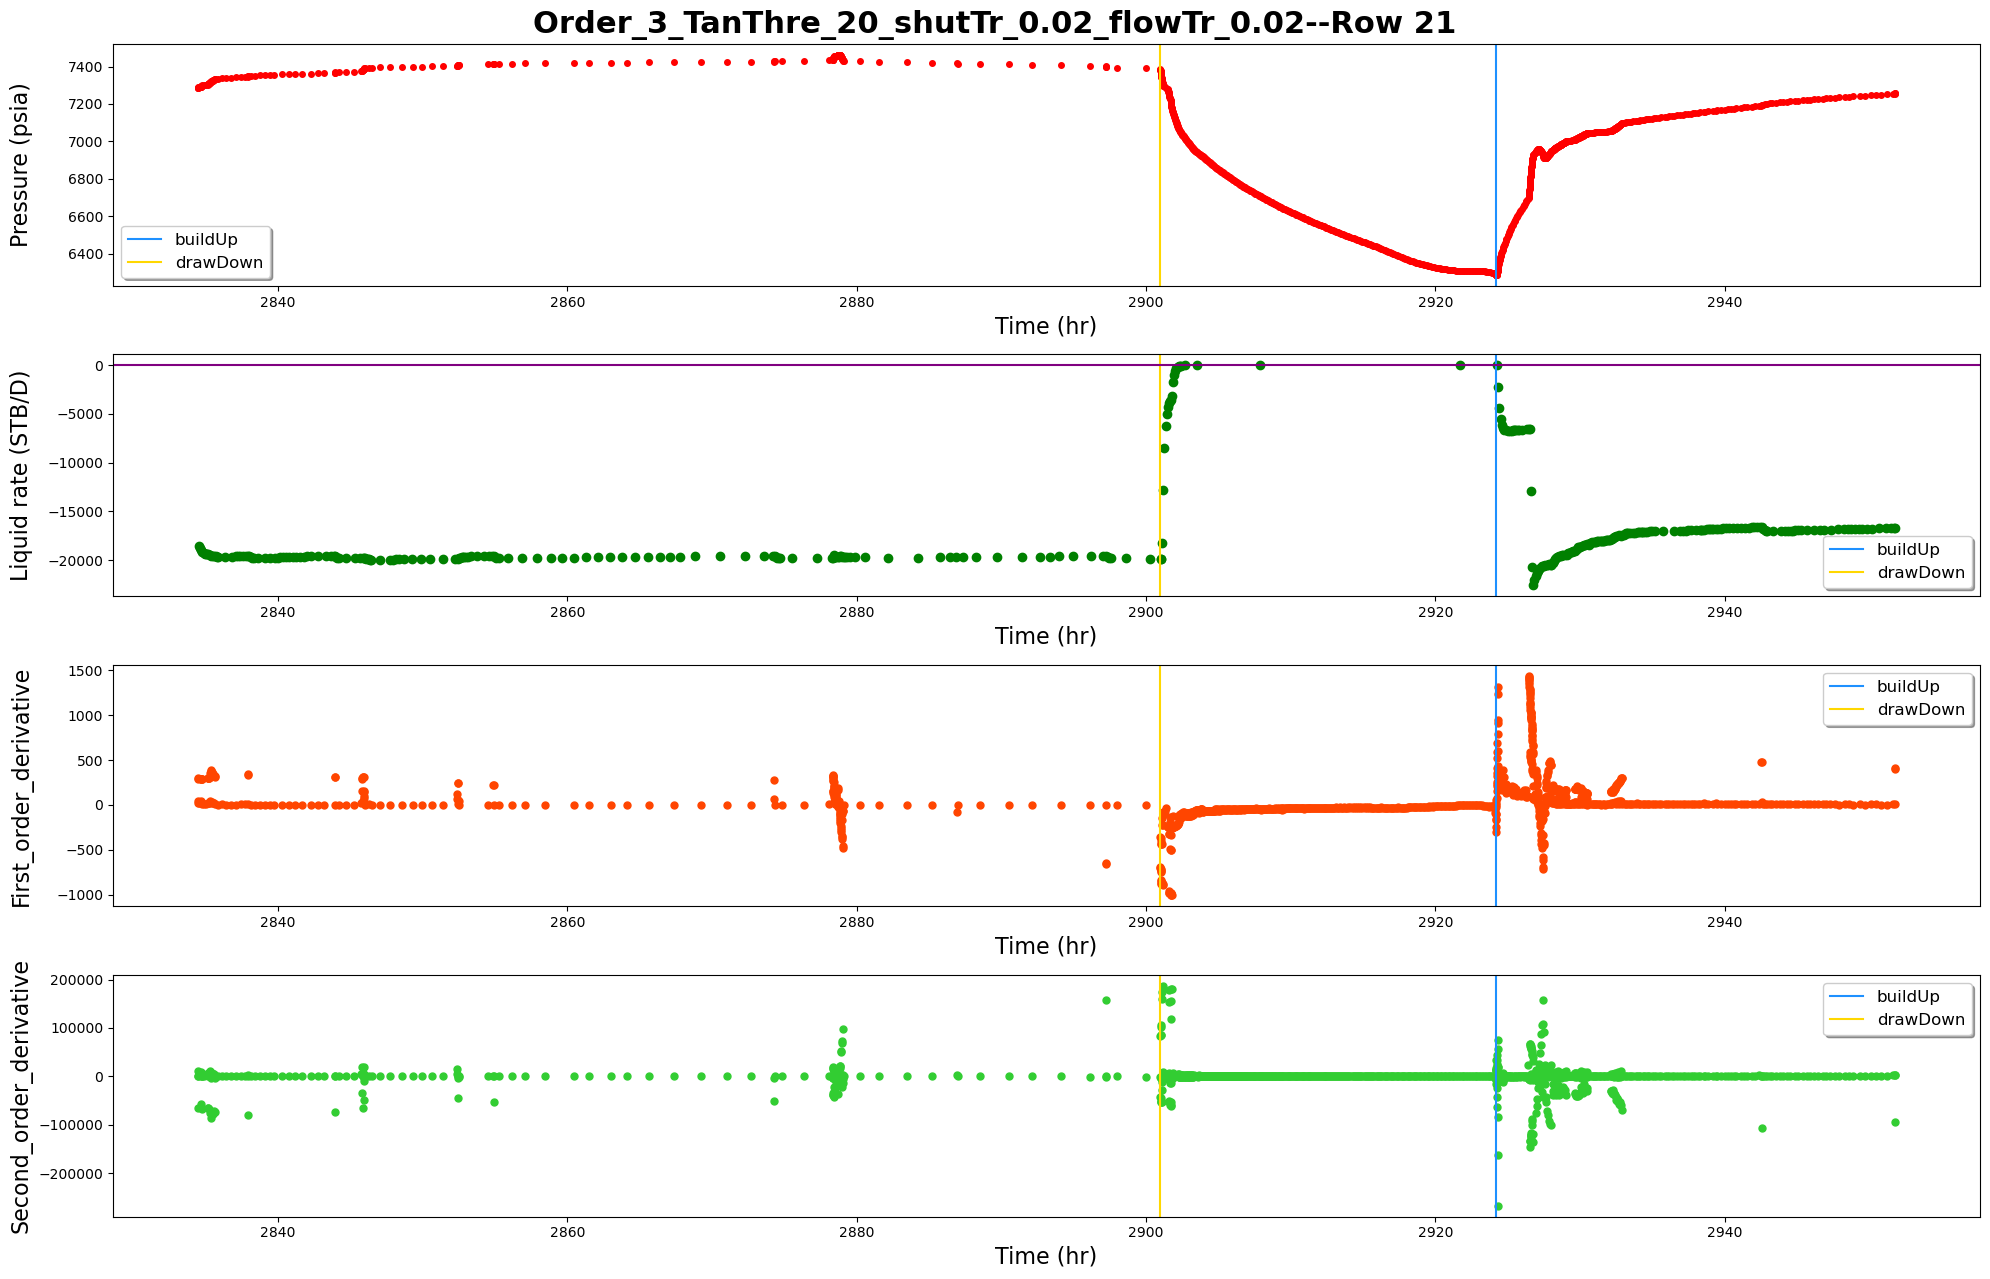

------row 22-----detected points:[25750, 25998]


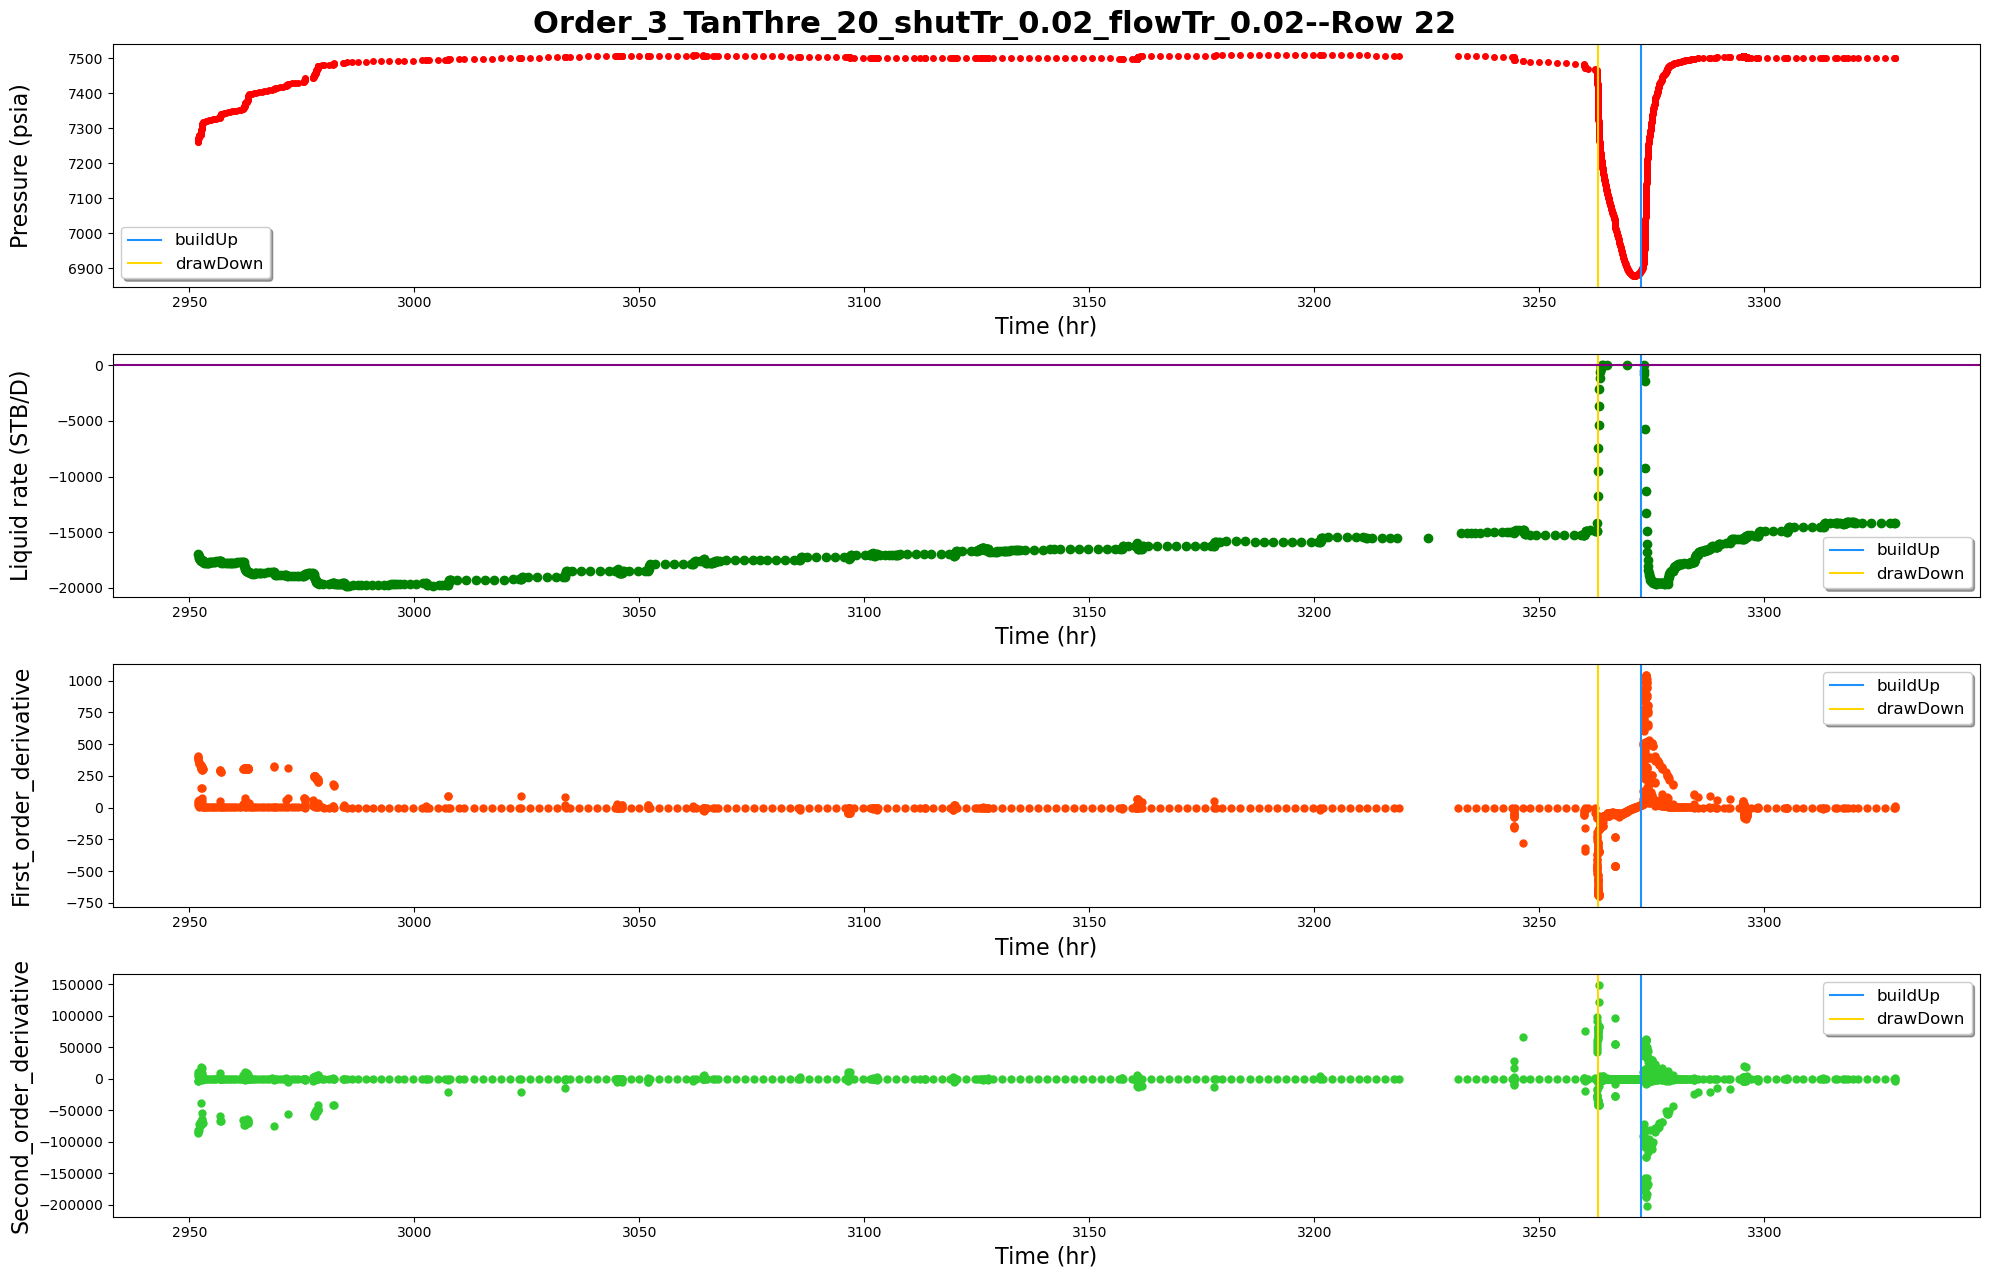

------row 23-----detected points:[26708, 26755, 27043, 27318]


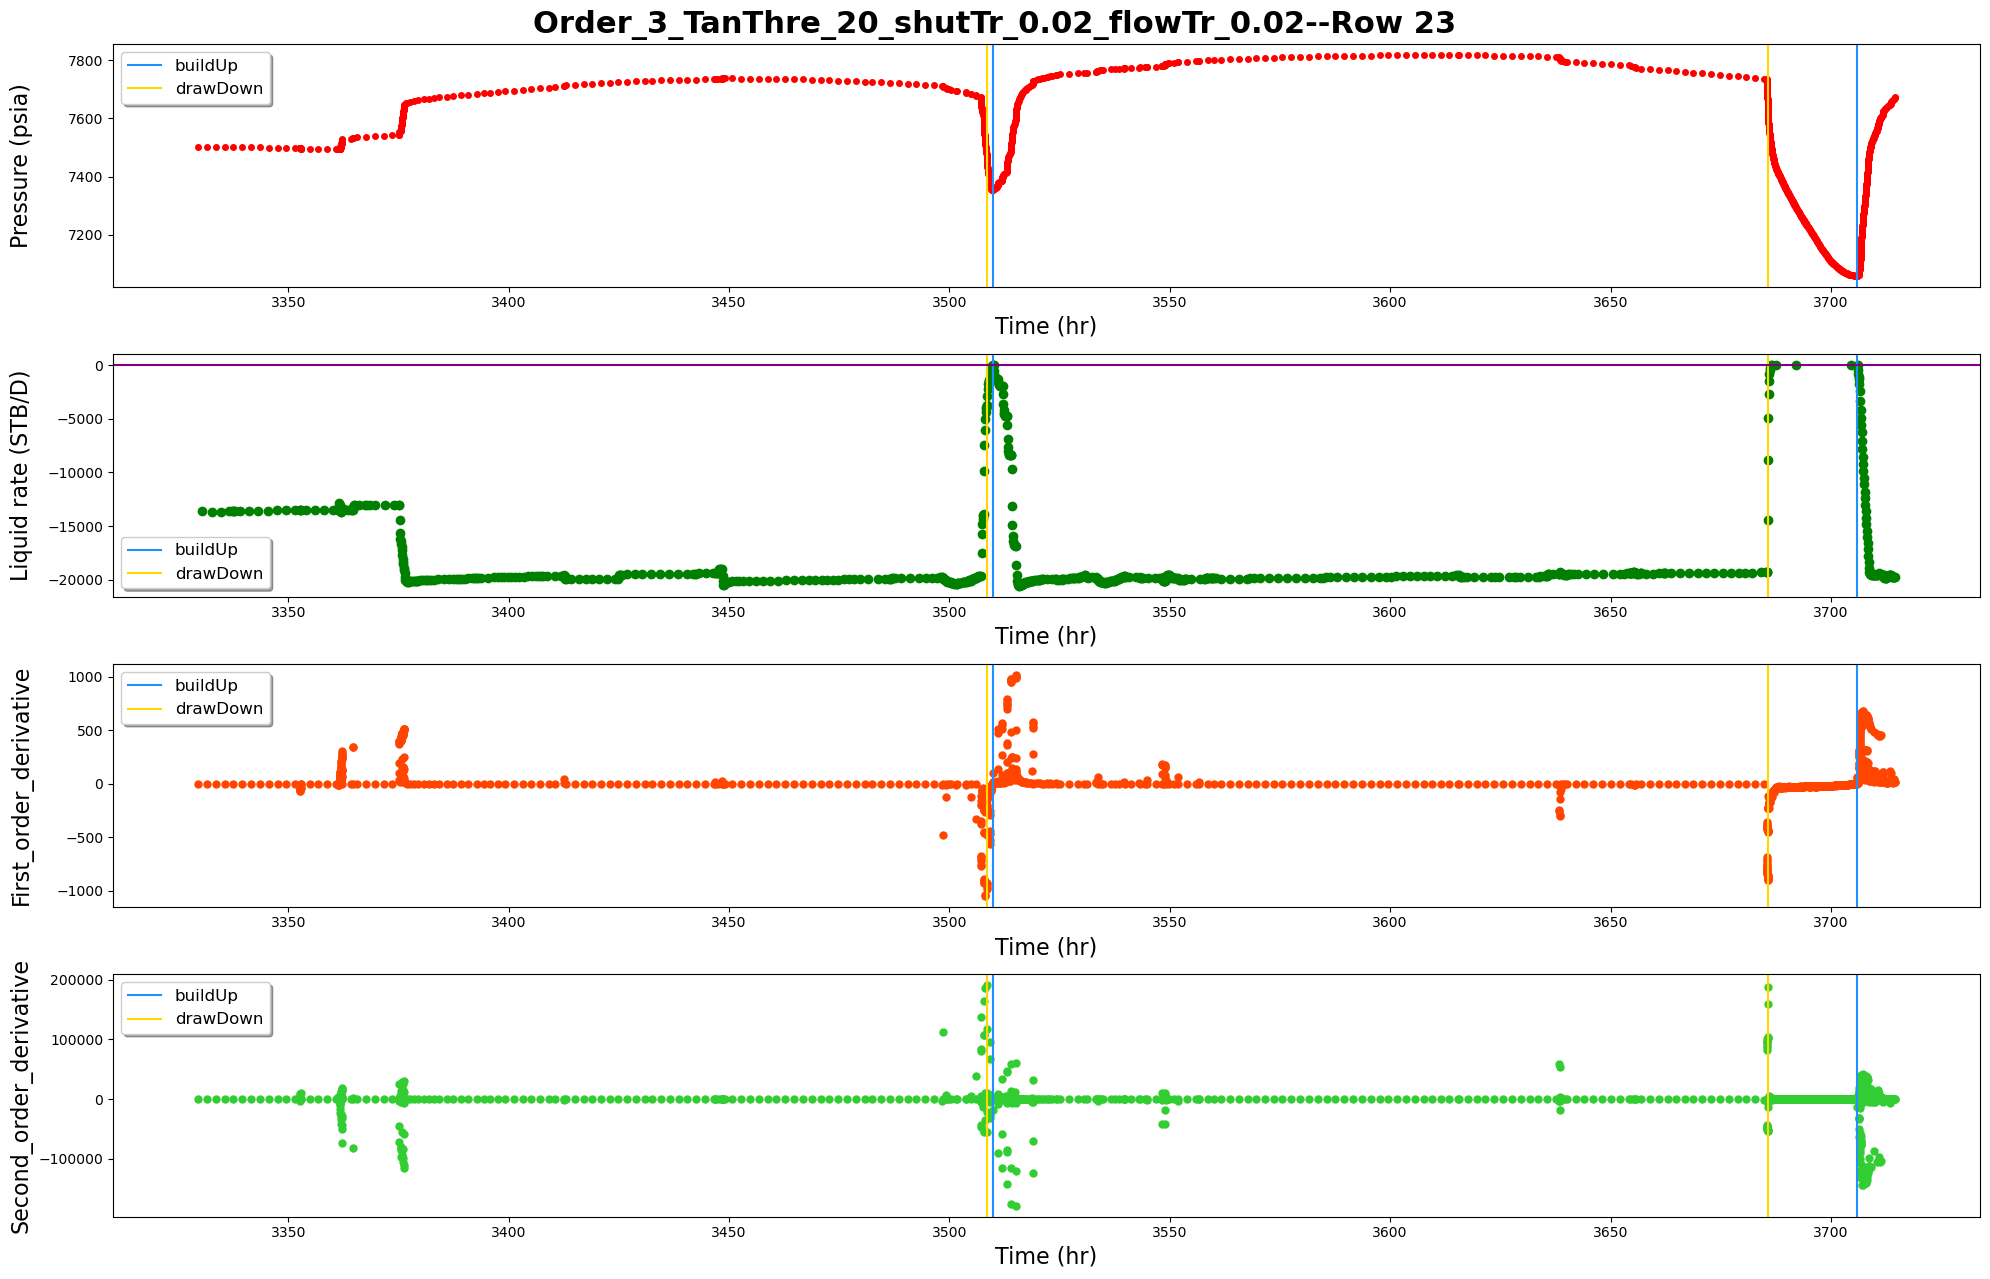

------row 24-----detected points:[27799, 27962, 28302, 28493]


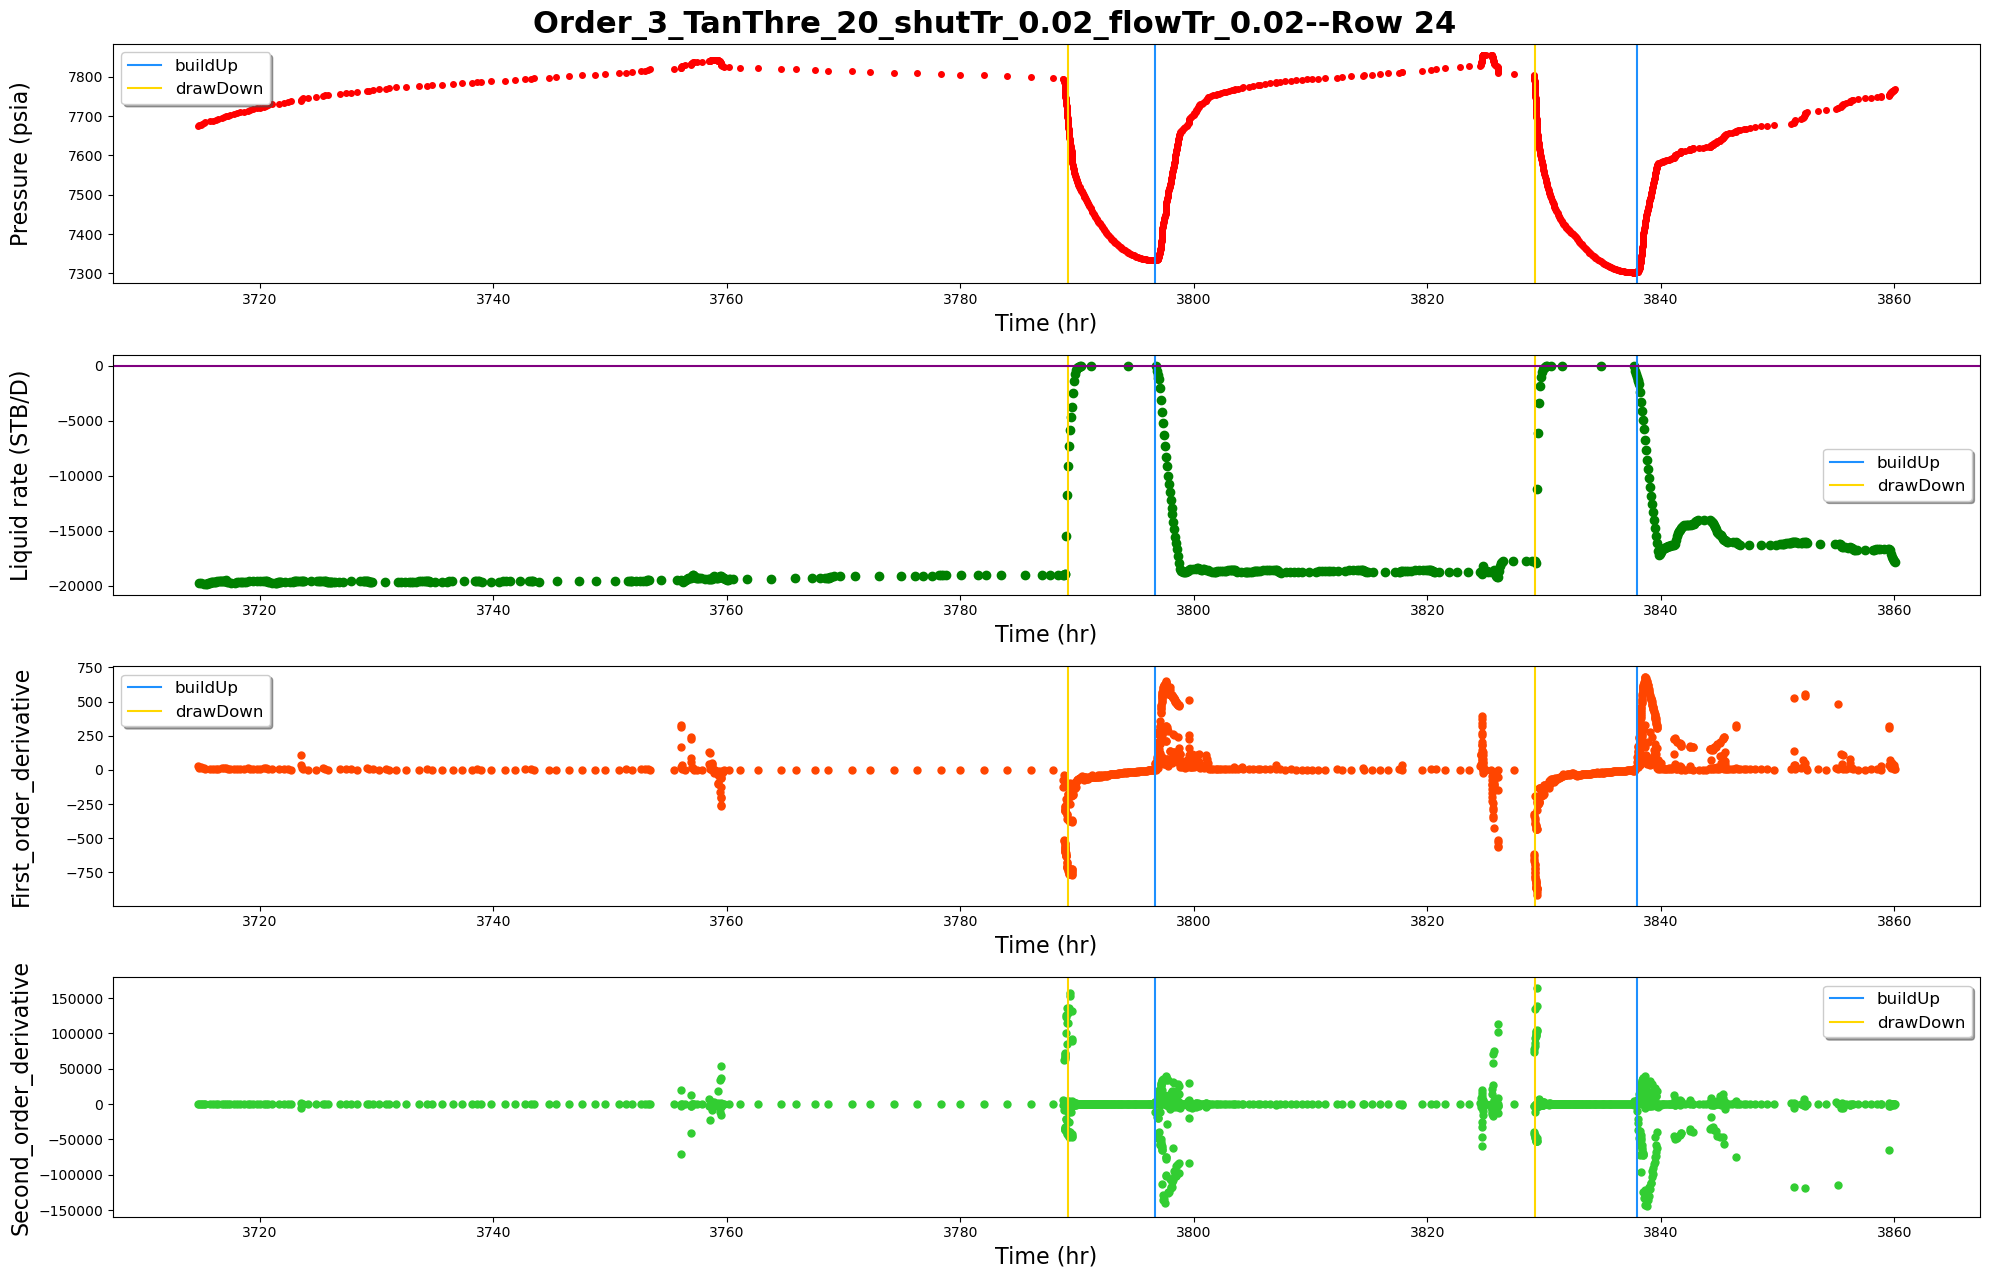

------row 25-----detected points:[28876, 29109]


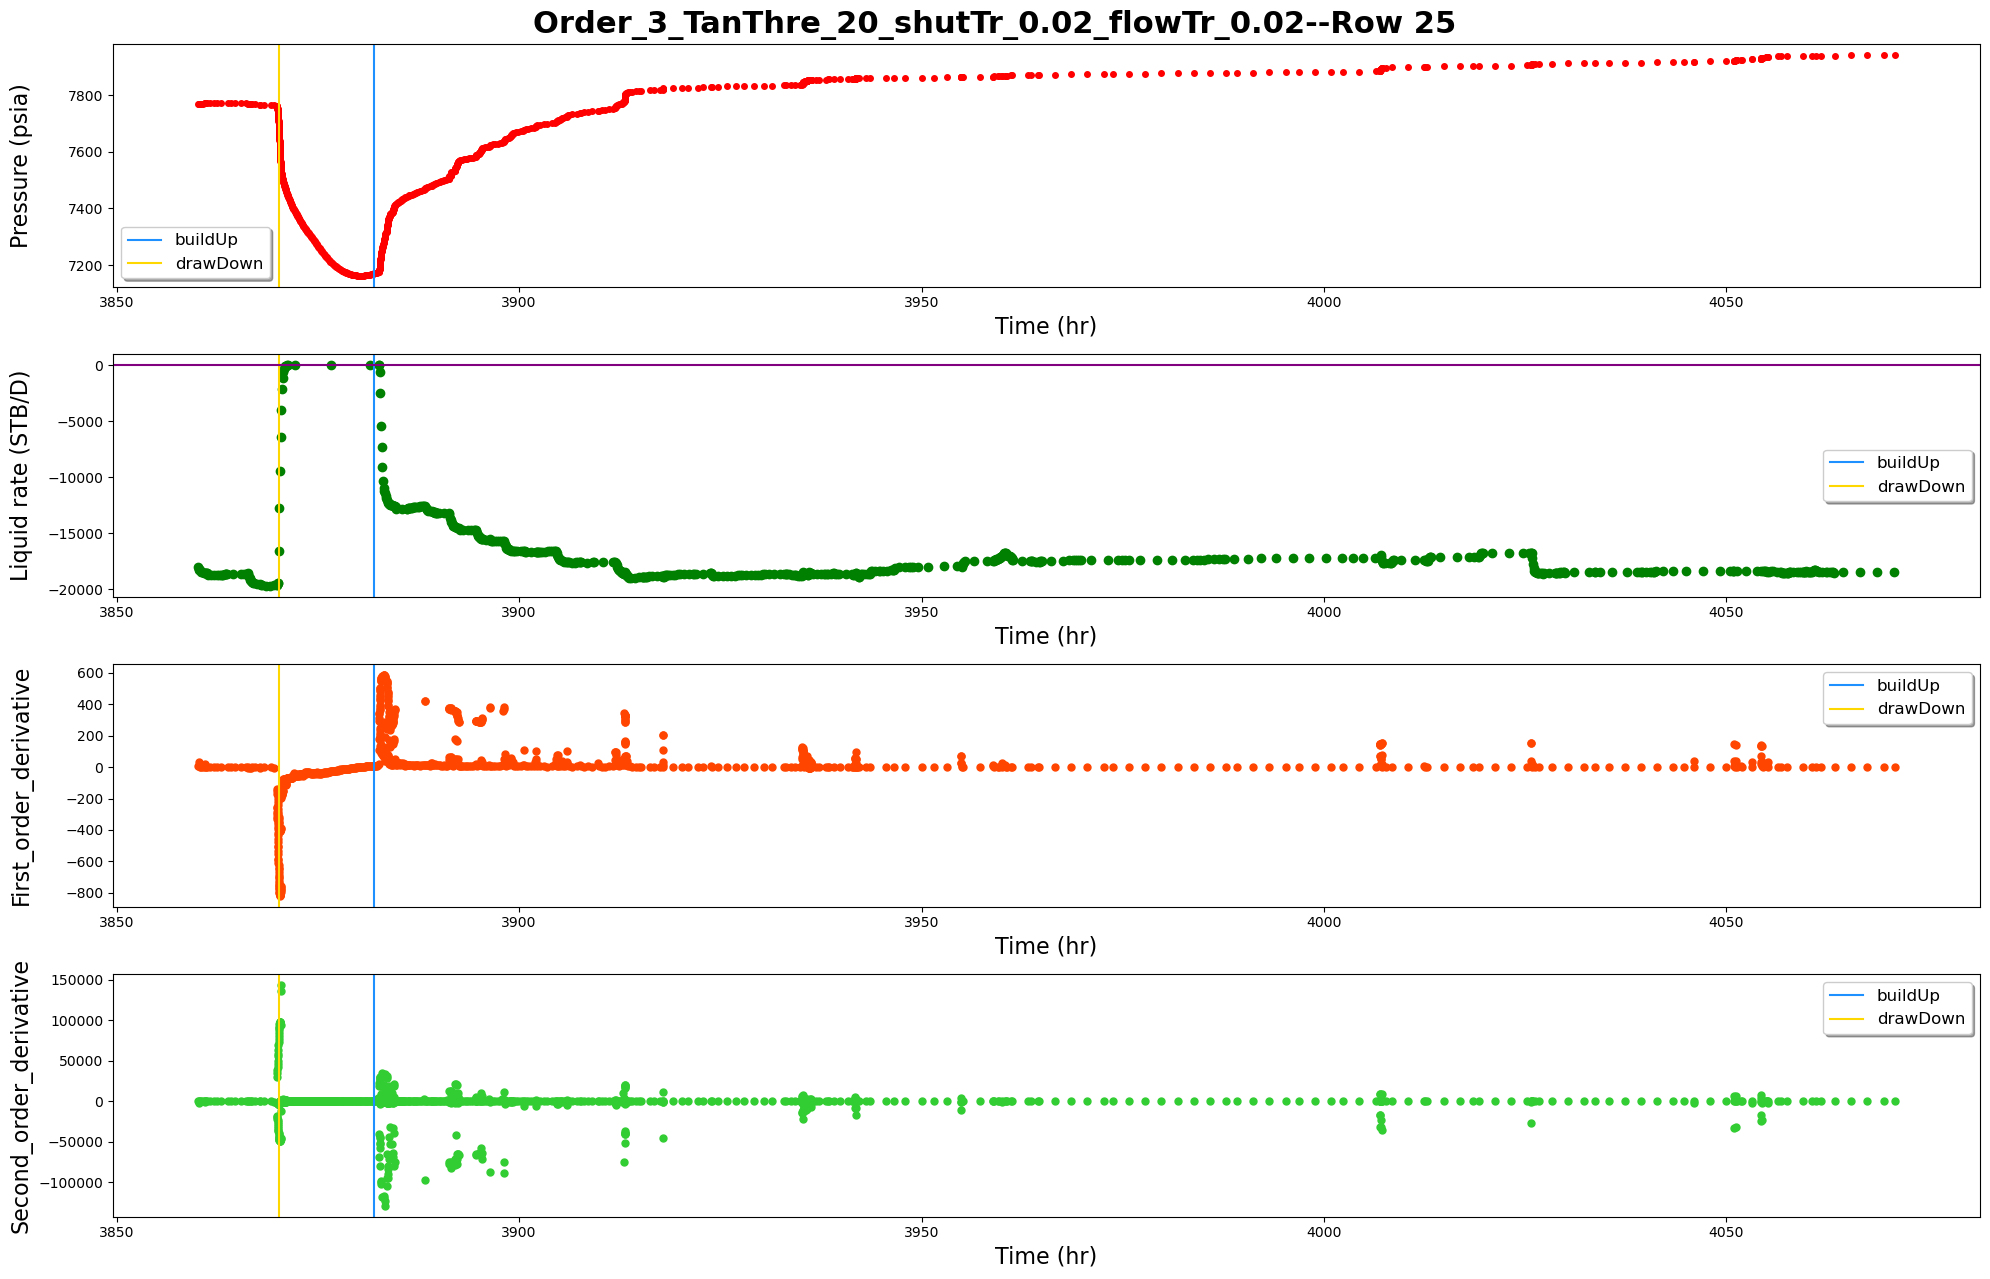

In [27]:
# method=""
# points_type="allPoints"
points_type="majorTransients"
# parameters={}
parameters={"Order":polynomial_order,
            "TanThre":deltaTangent_criterion,
            "shutTr":minor_threshold_shutIn,
           "flowTr":minor_threshold_Flowing}
detect_points_dict={"buildUp":transients.major_buildUp,
                   "drawDown":transients.major_drawDown}

buildup=detect_points_dict["buildUp"]
drawdown=detect_points_dict["drawDown"]
txt=f"buildup:{len(buildup)}, drawdown:{len(drawdown)}"
pprint(txt)
plot_whole=True
plot_details=True
plot_statistics=False
save=True
folder_name=f"{method}/{points_type}/pointHalfWin_{point_halfWindow}_timeStep_{time_step}"
# folder_name="removed_transients"
%run plot_N_save.ipynb

# plot periods & multi rate break points

'buildup:170, drawdown:30'
---initializing...
---plotting...


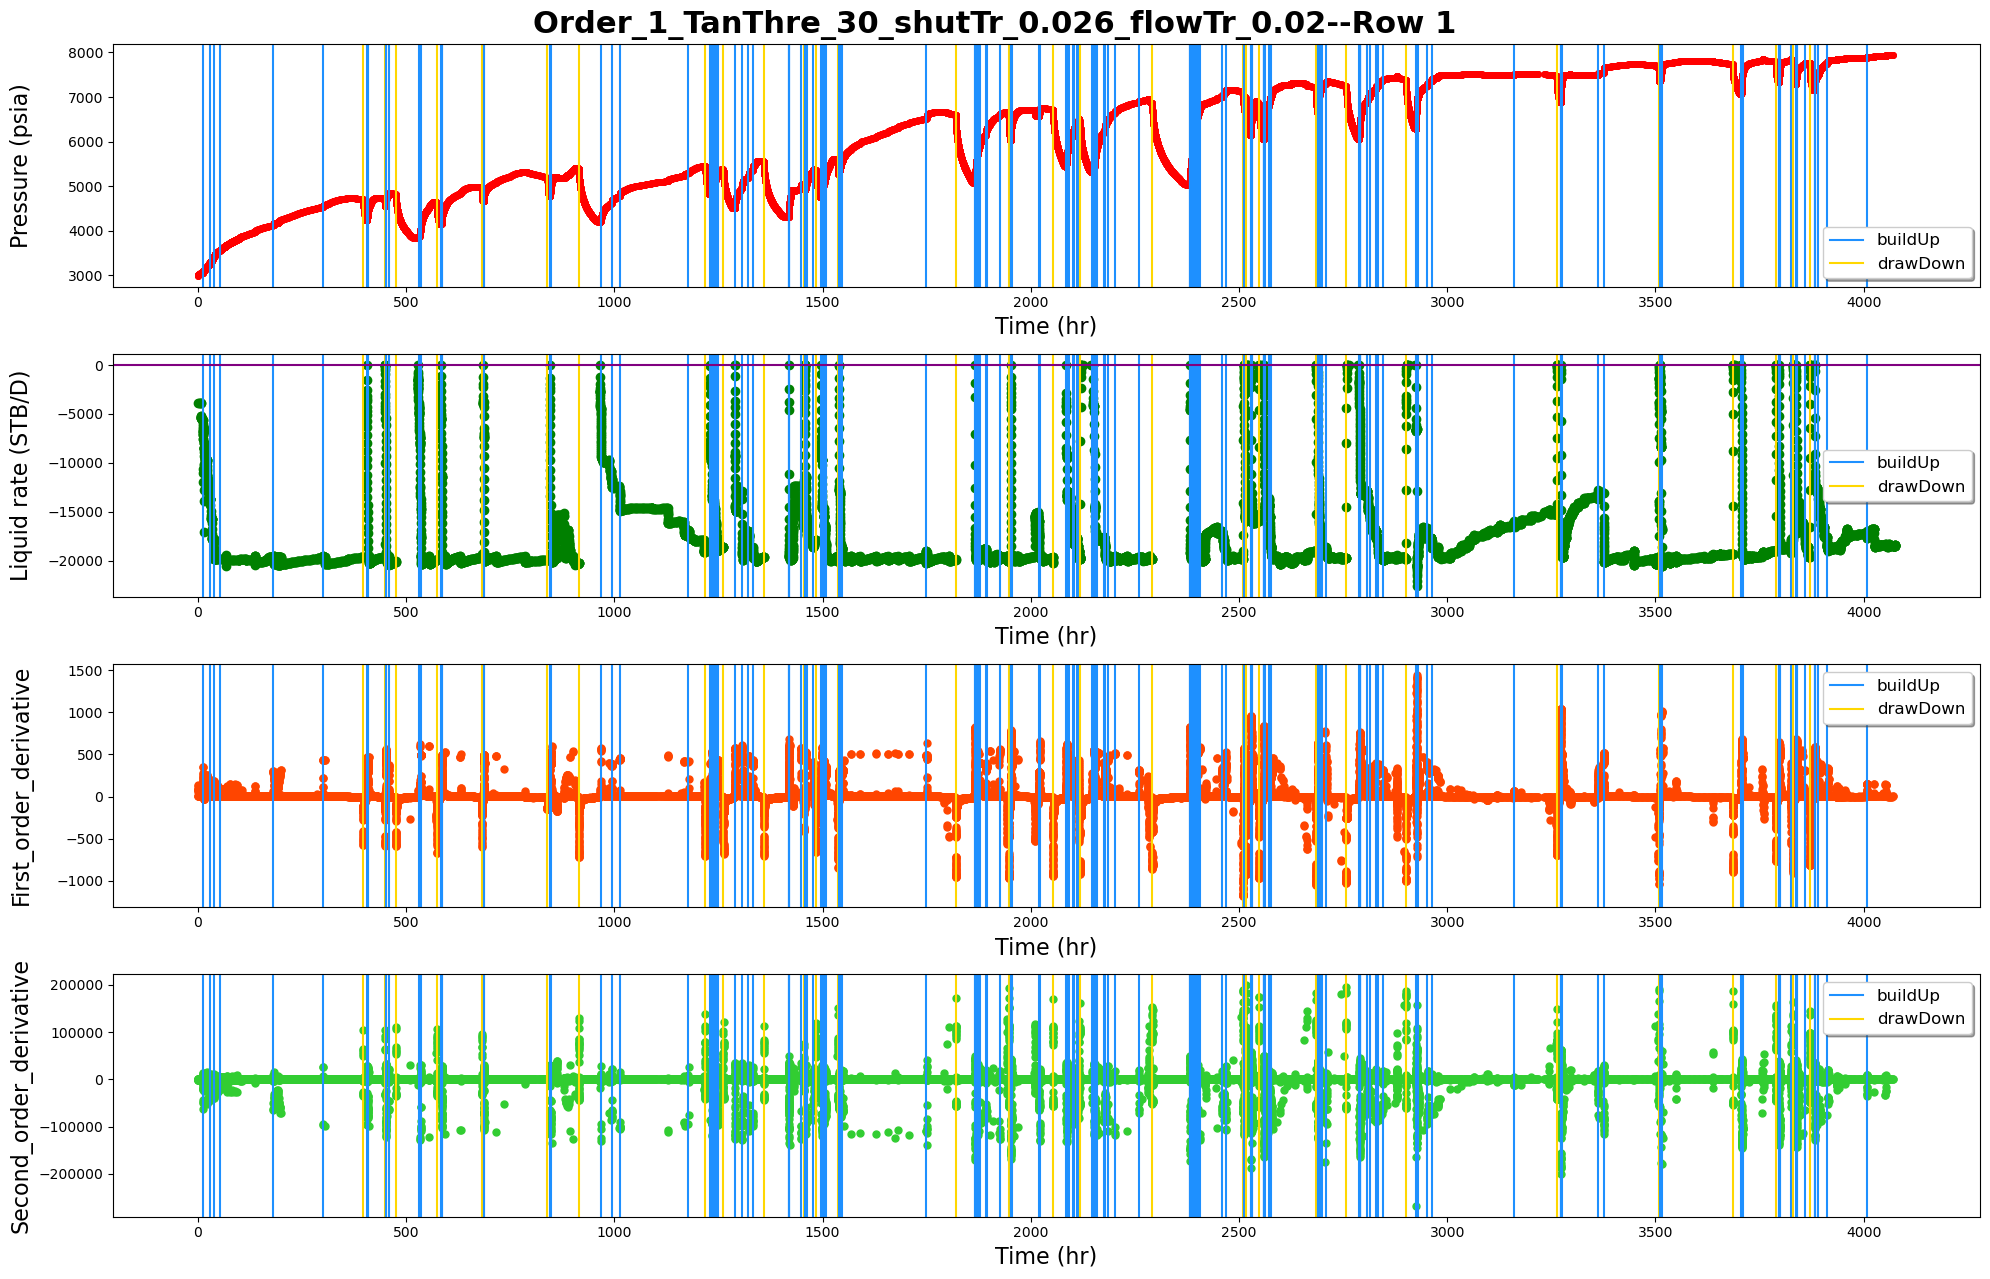

save whole....
detected 200 points as breakpoints
The plot is devided into 25 rows
------row 1-----detected points:[56, 508, 690, 1034]


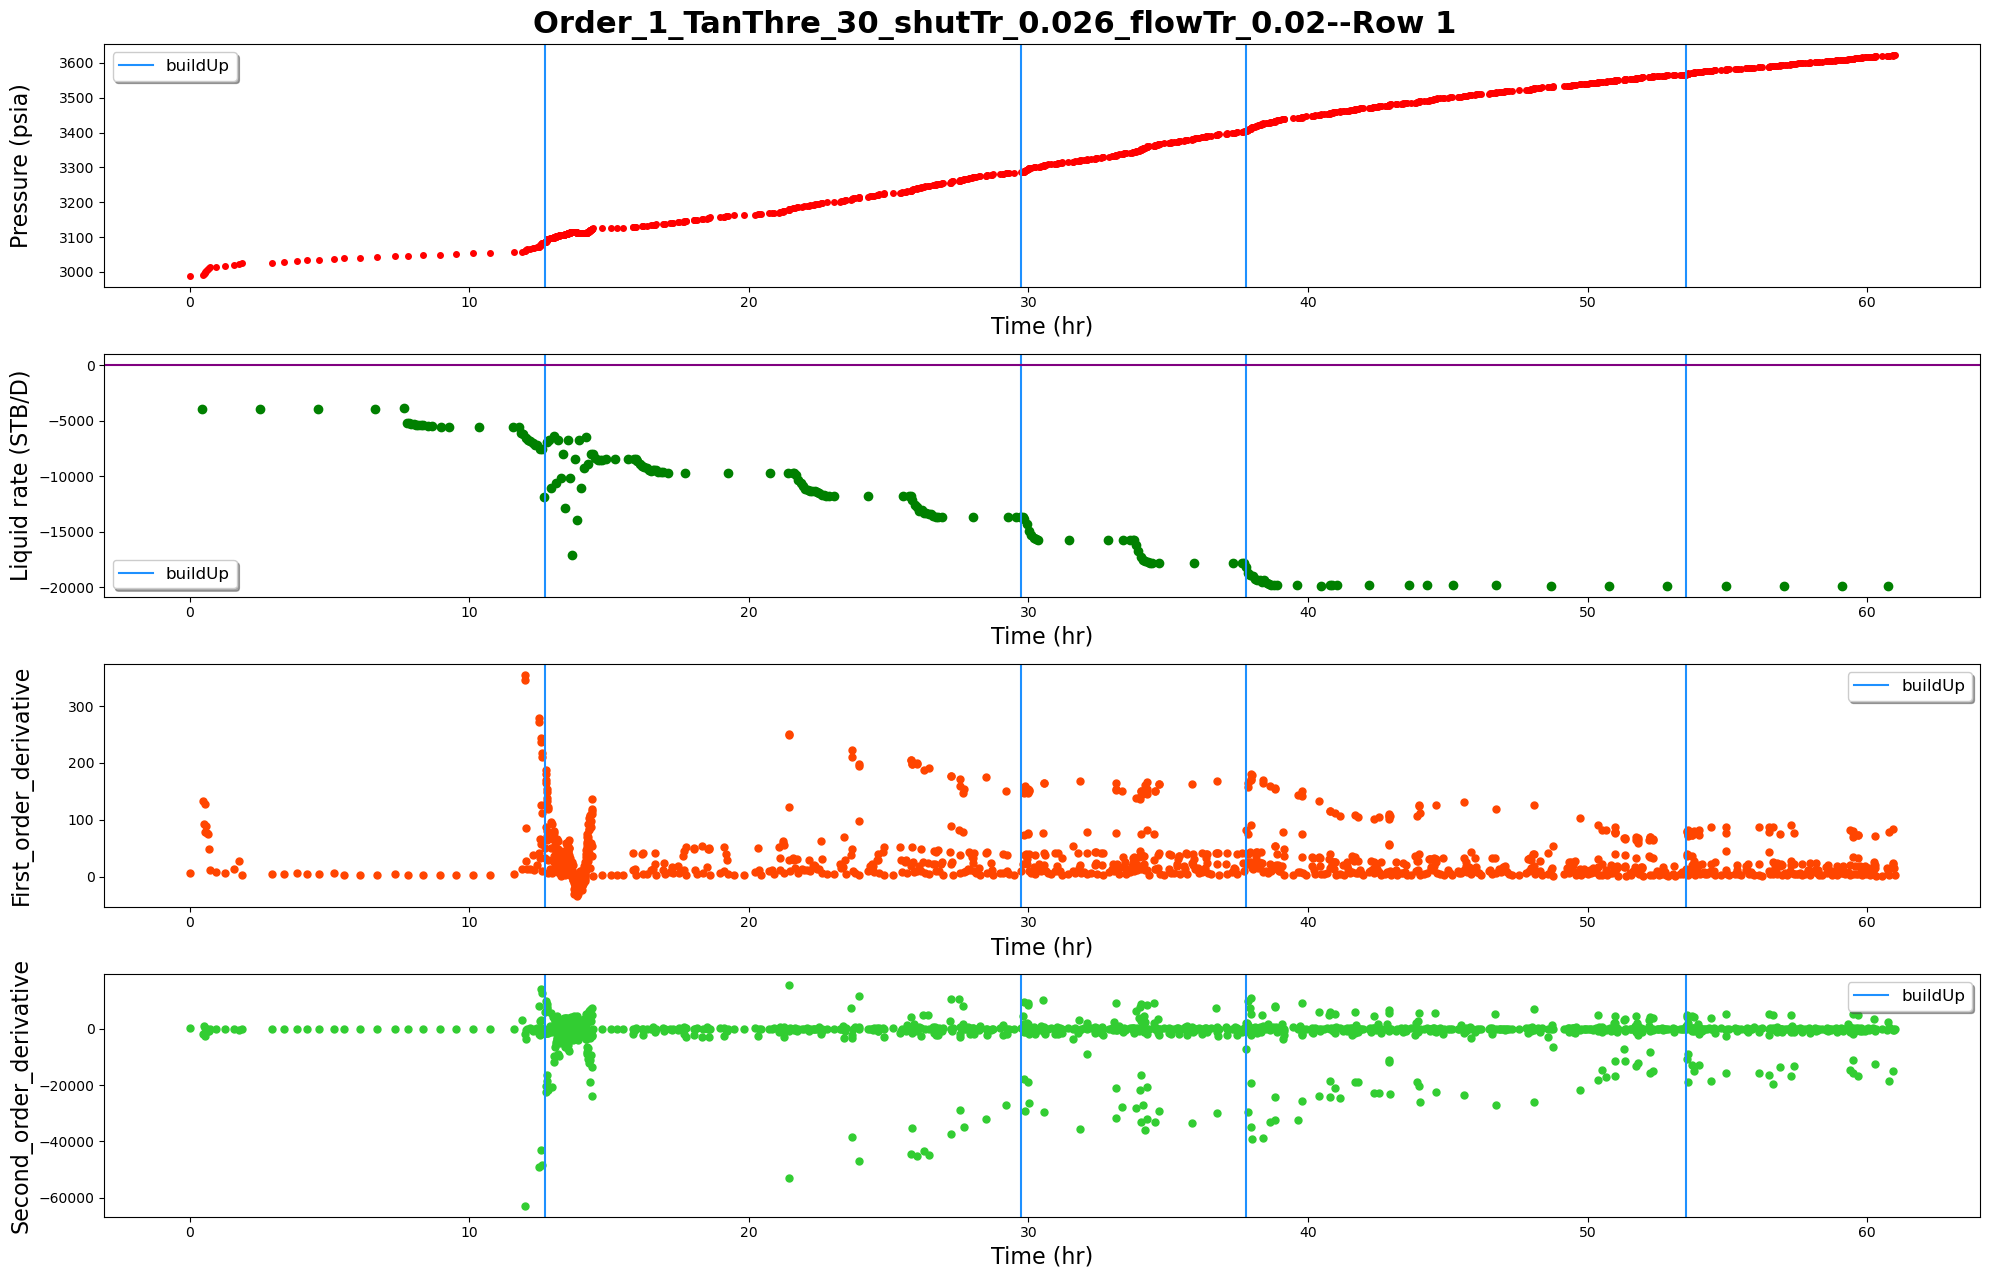

------row 2-----detected points:[1811, 2111, 2248]


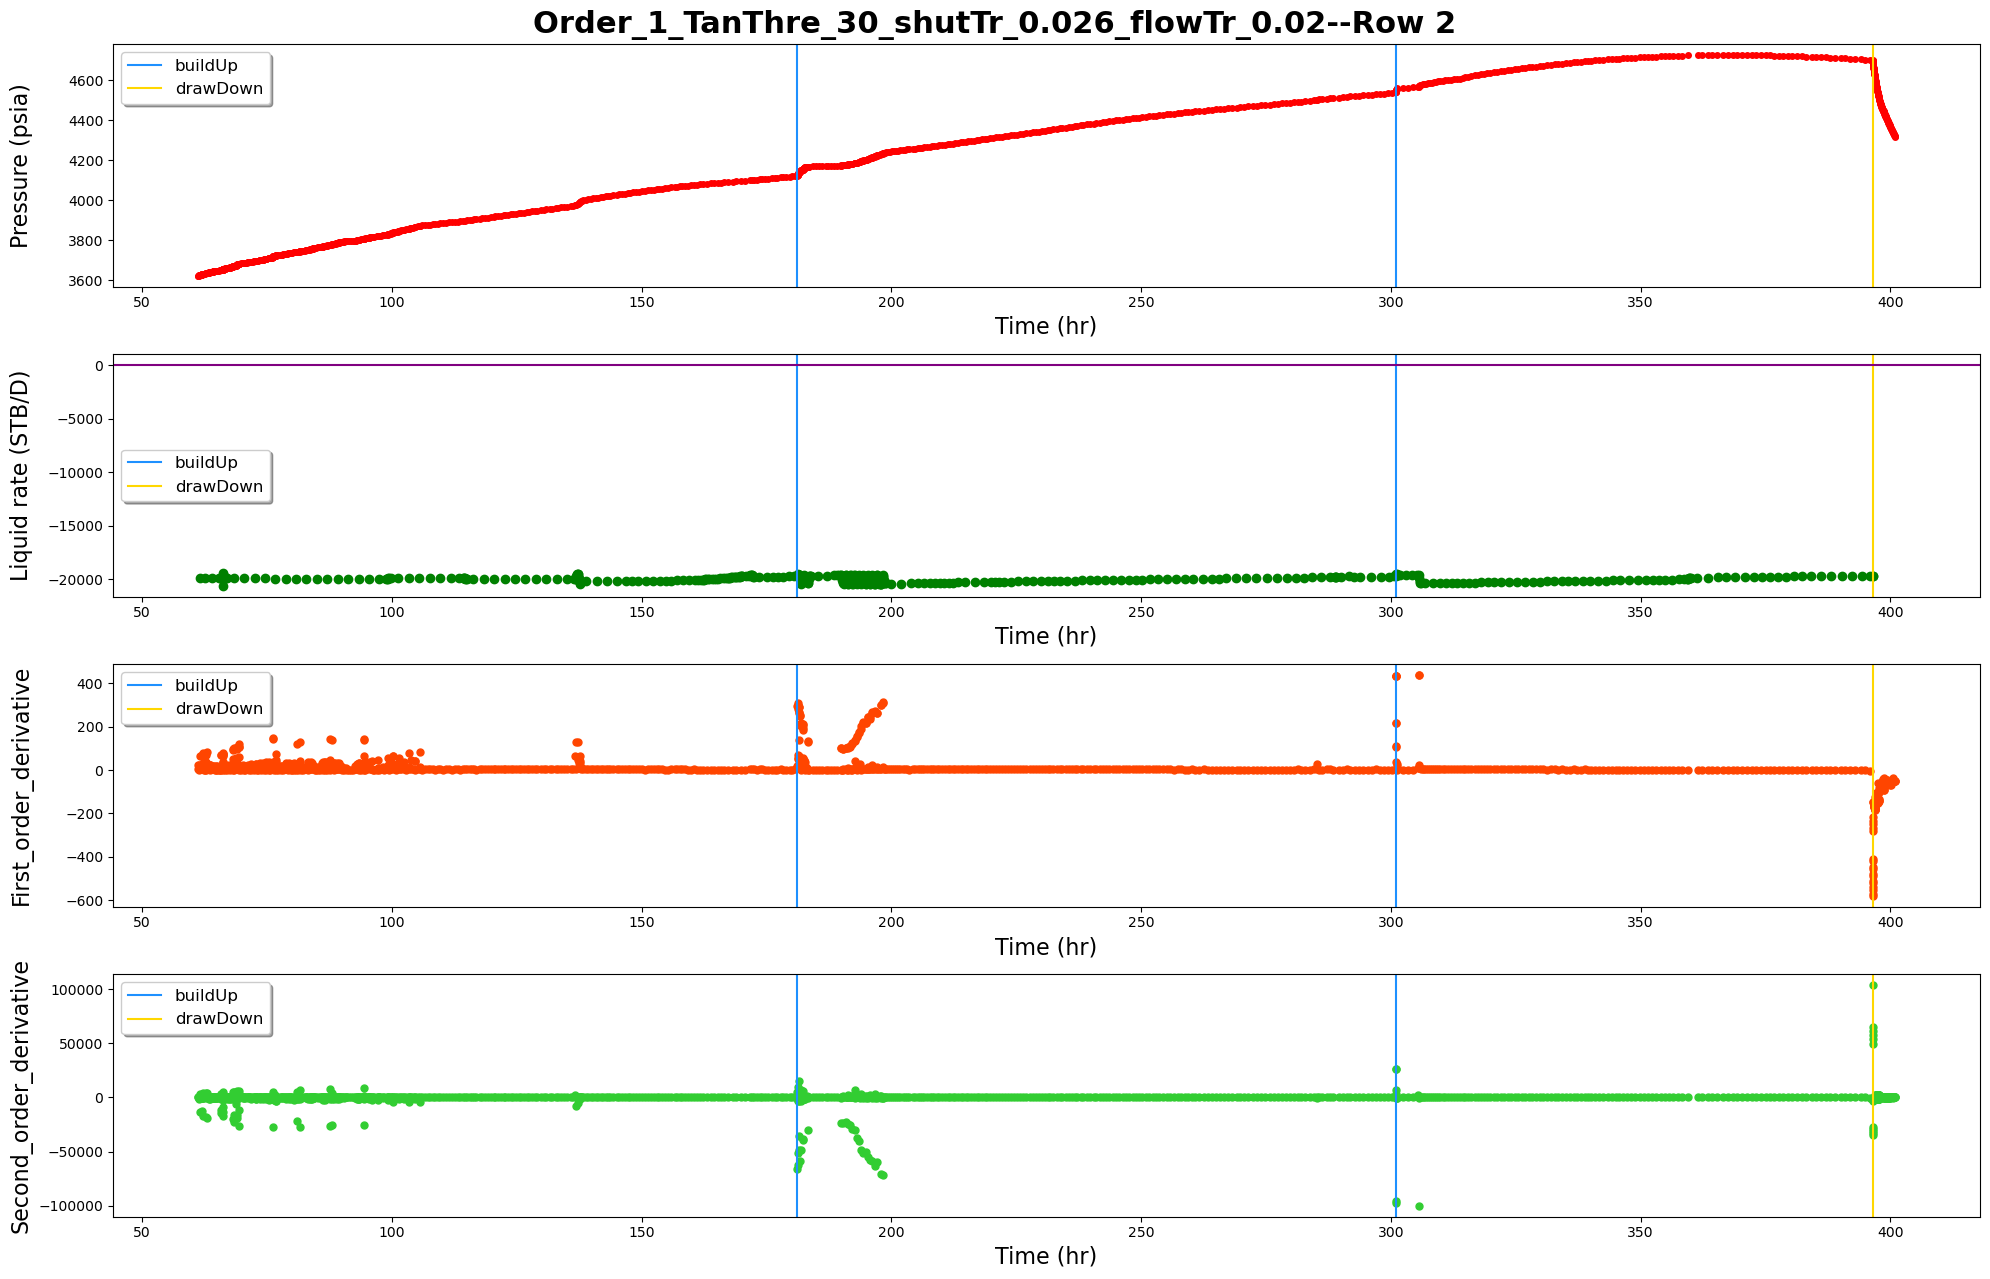

------row 3-----detected points:[2477, 2539, 2601, 2804, 2892, 2950, 3022, 3095, 3595]


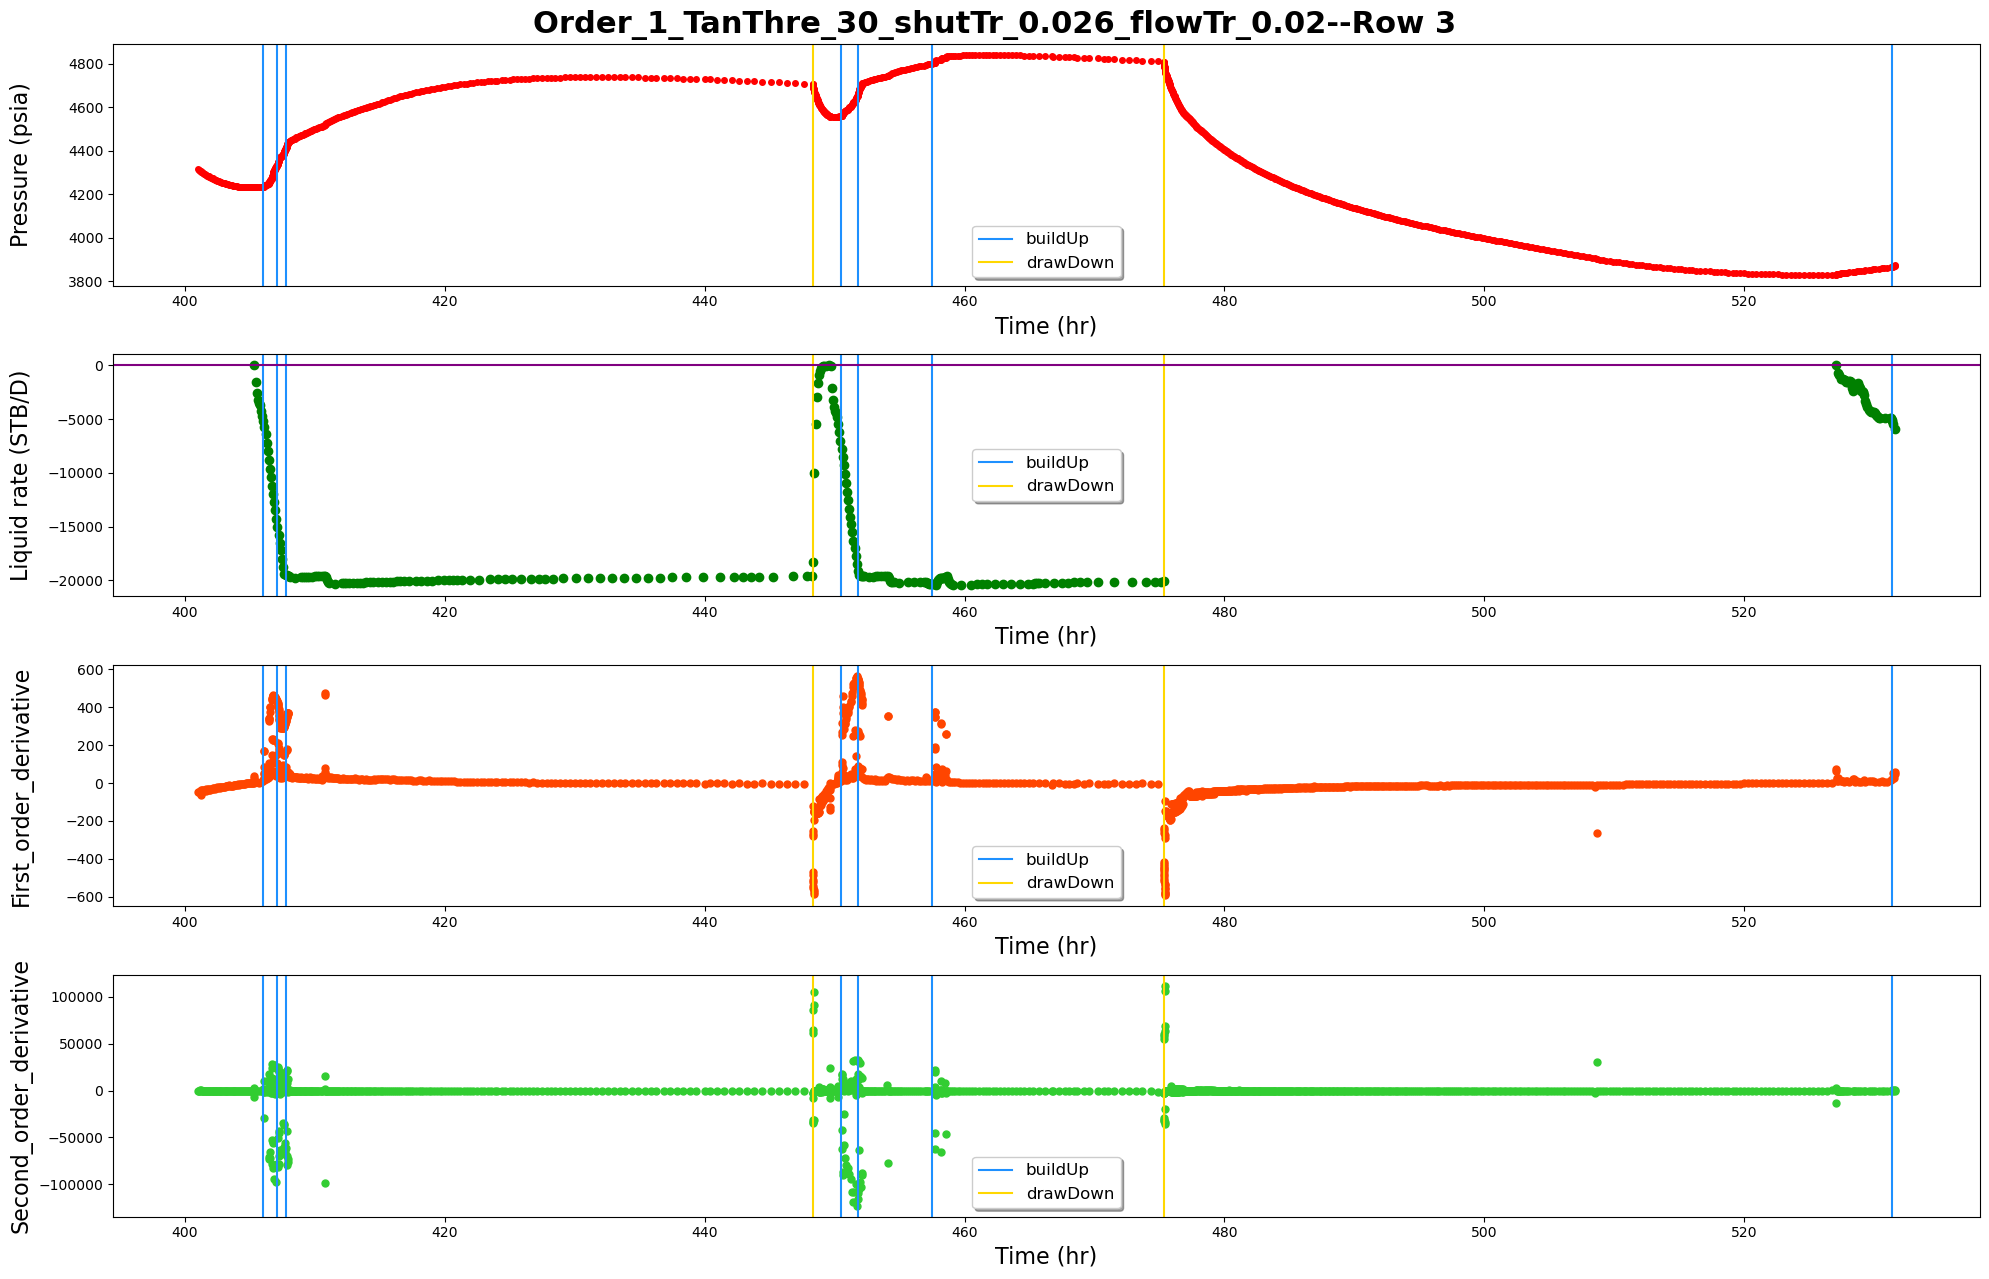

------row 4-----detected points:[3665, 4009, 4246, 4305, 4392, 4750]


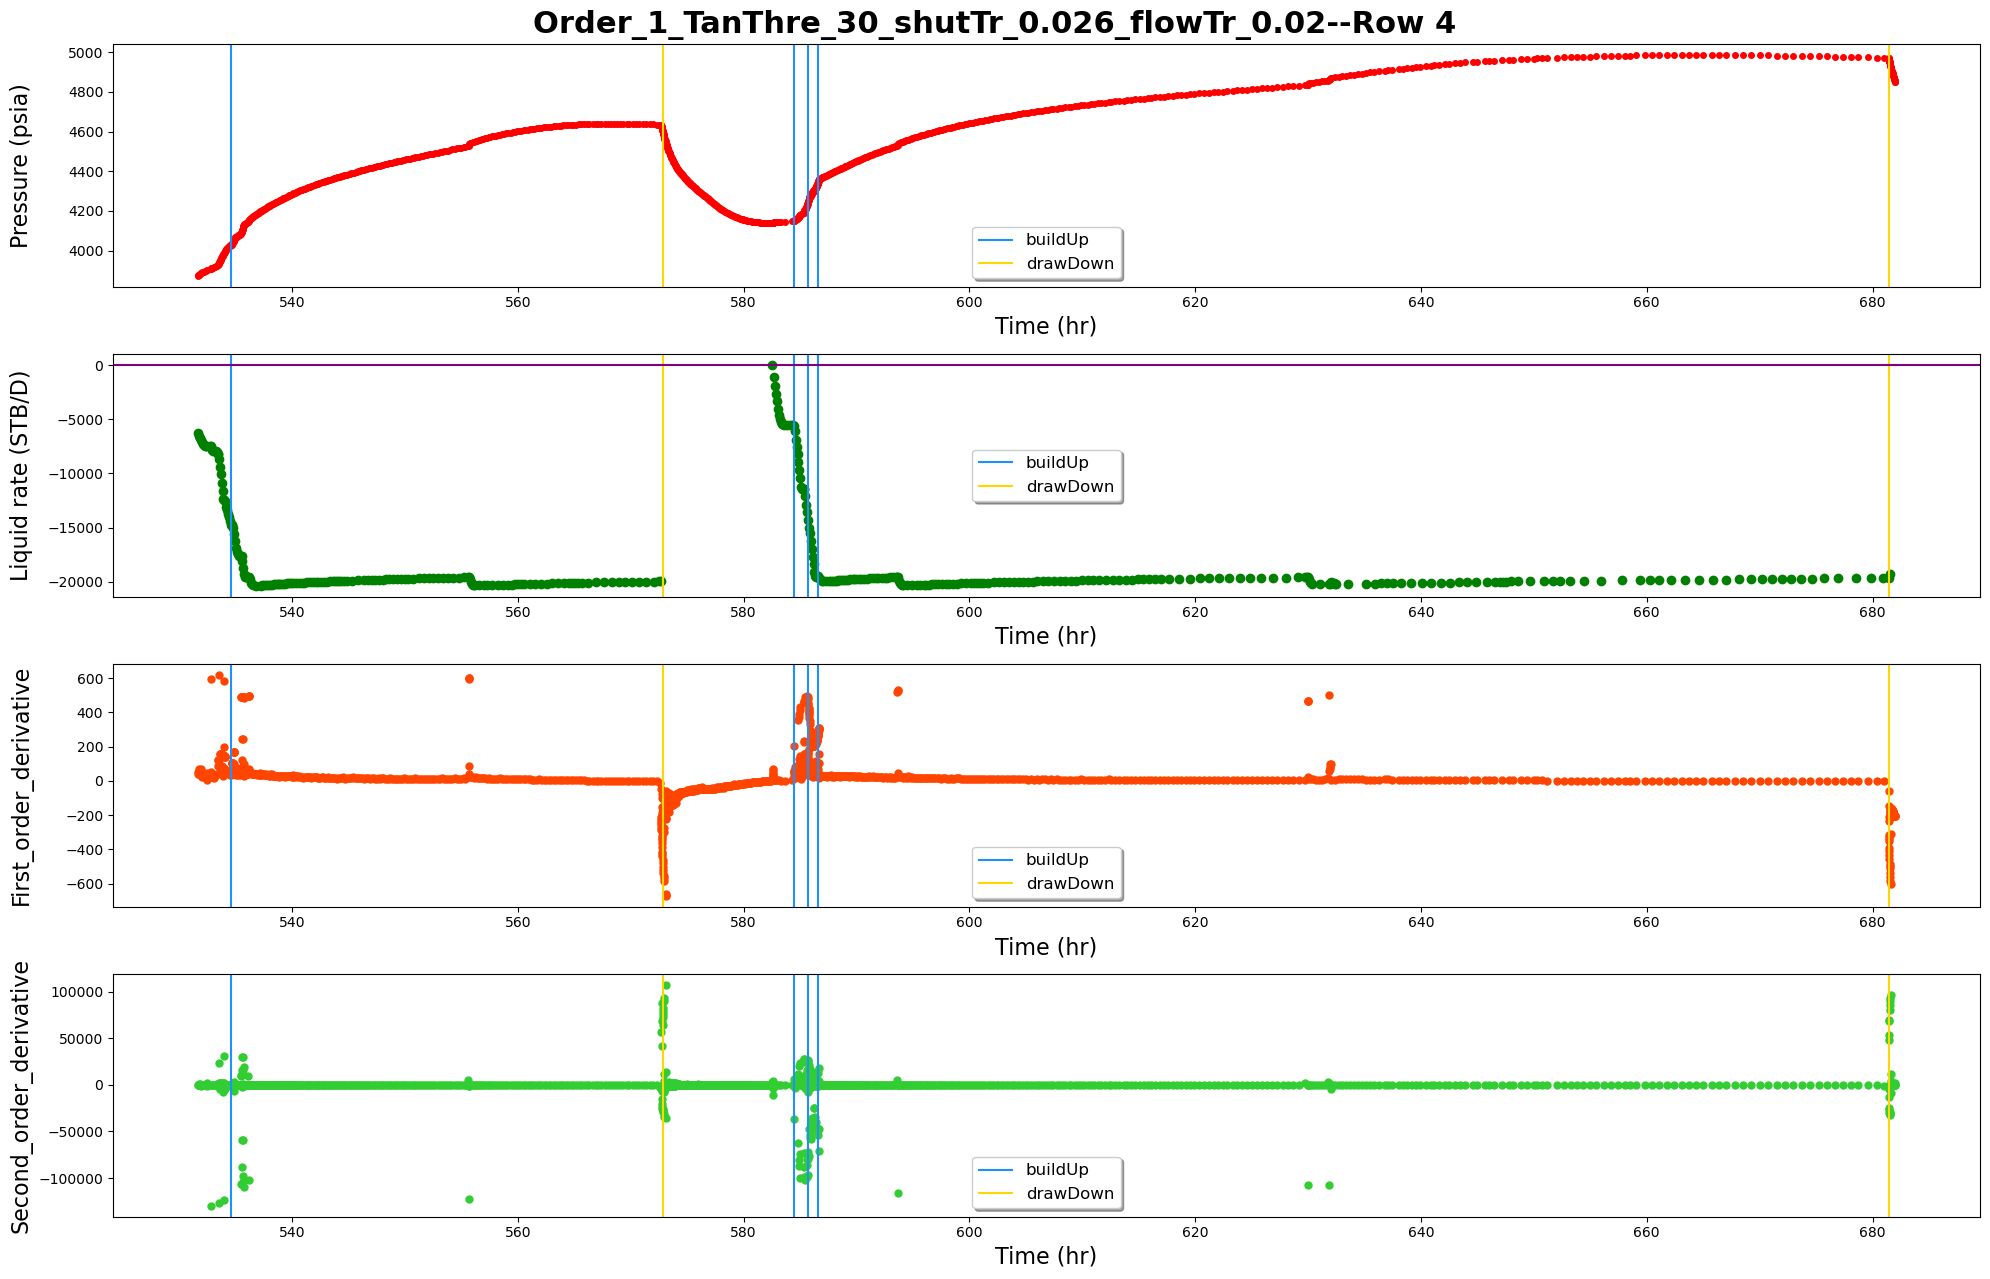

------row 5-----detected points:[4899, 4981, 5304, 5445, 5528, 5985]


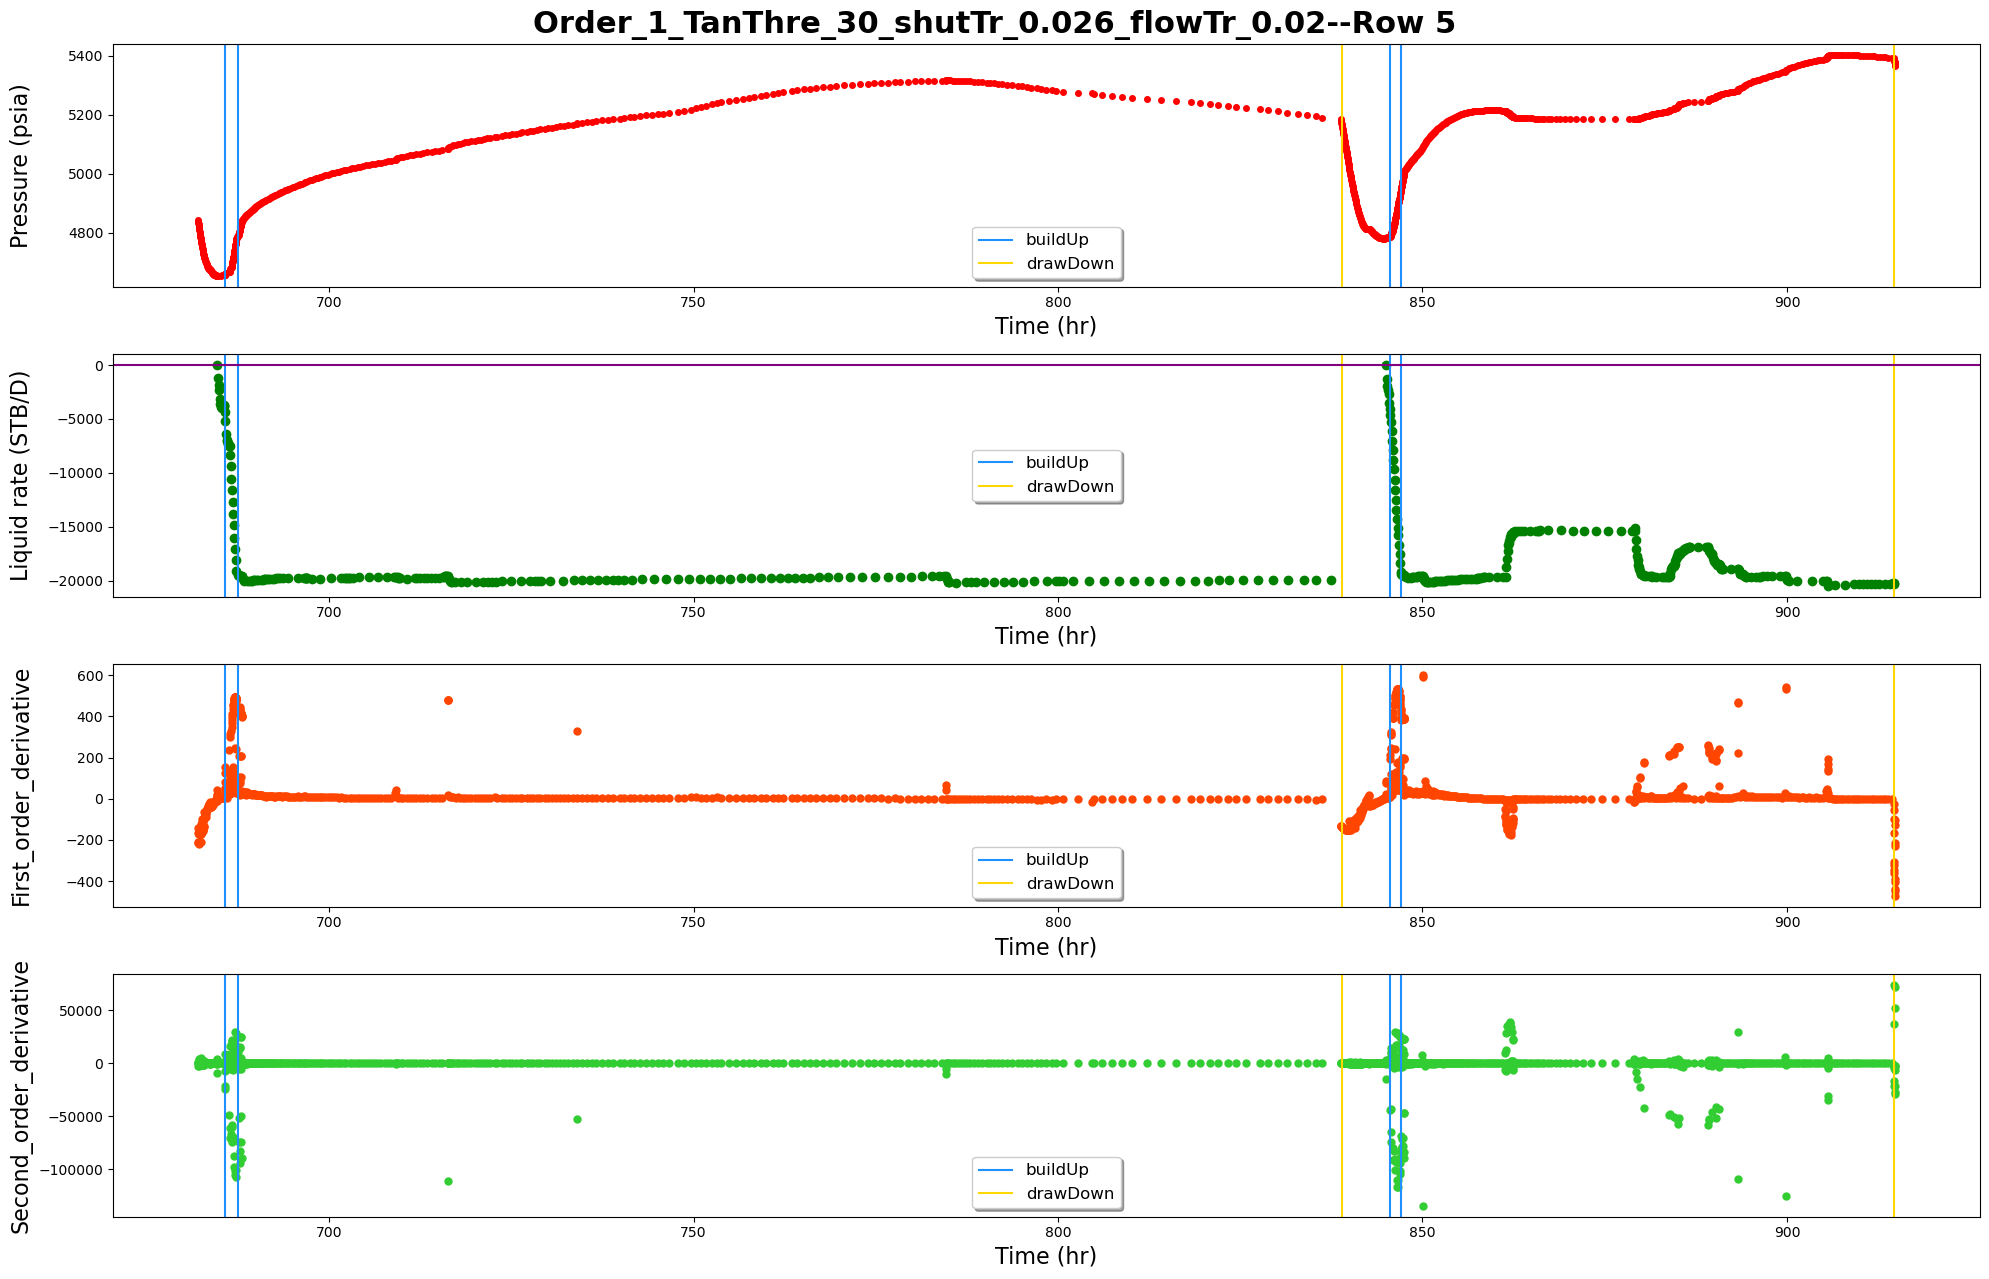

------row 6-----detected points:[6574, 6771, 6868, 7137]


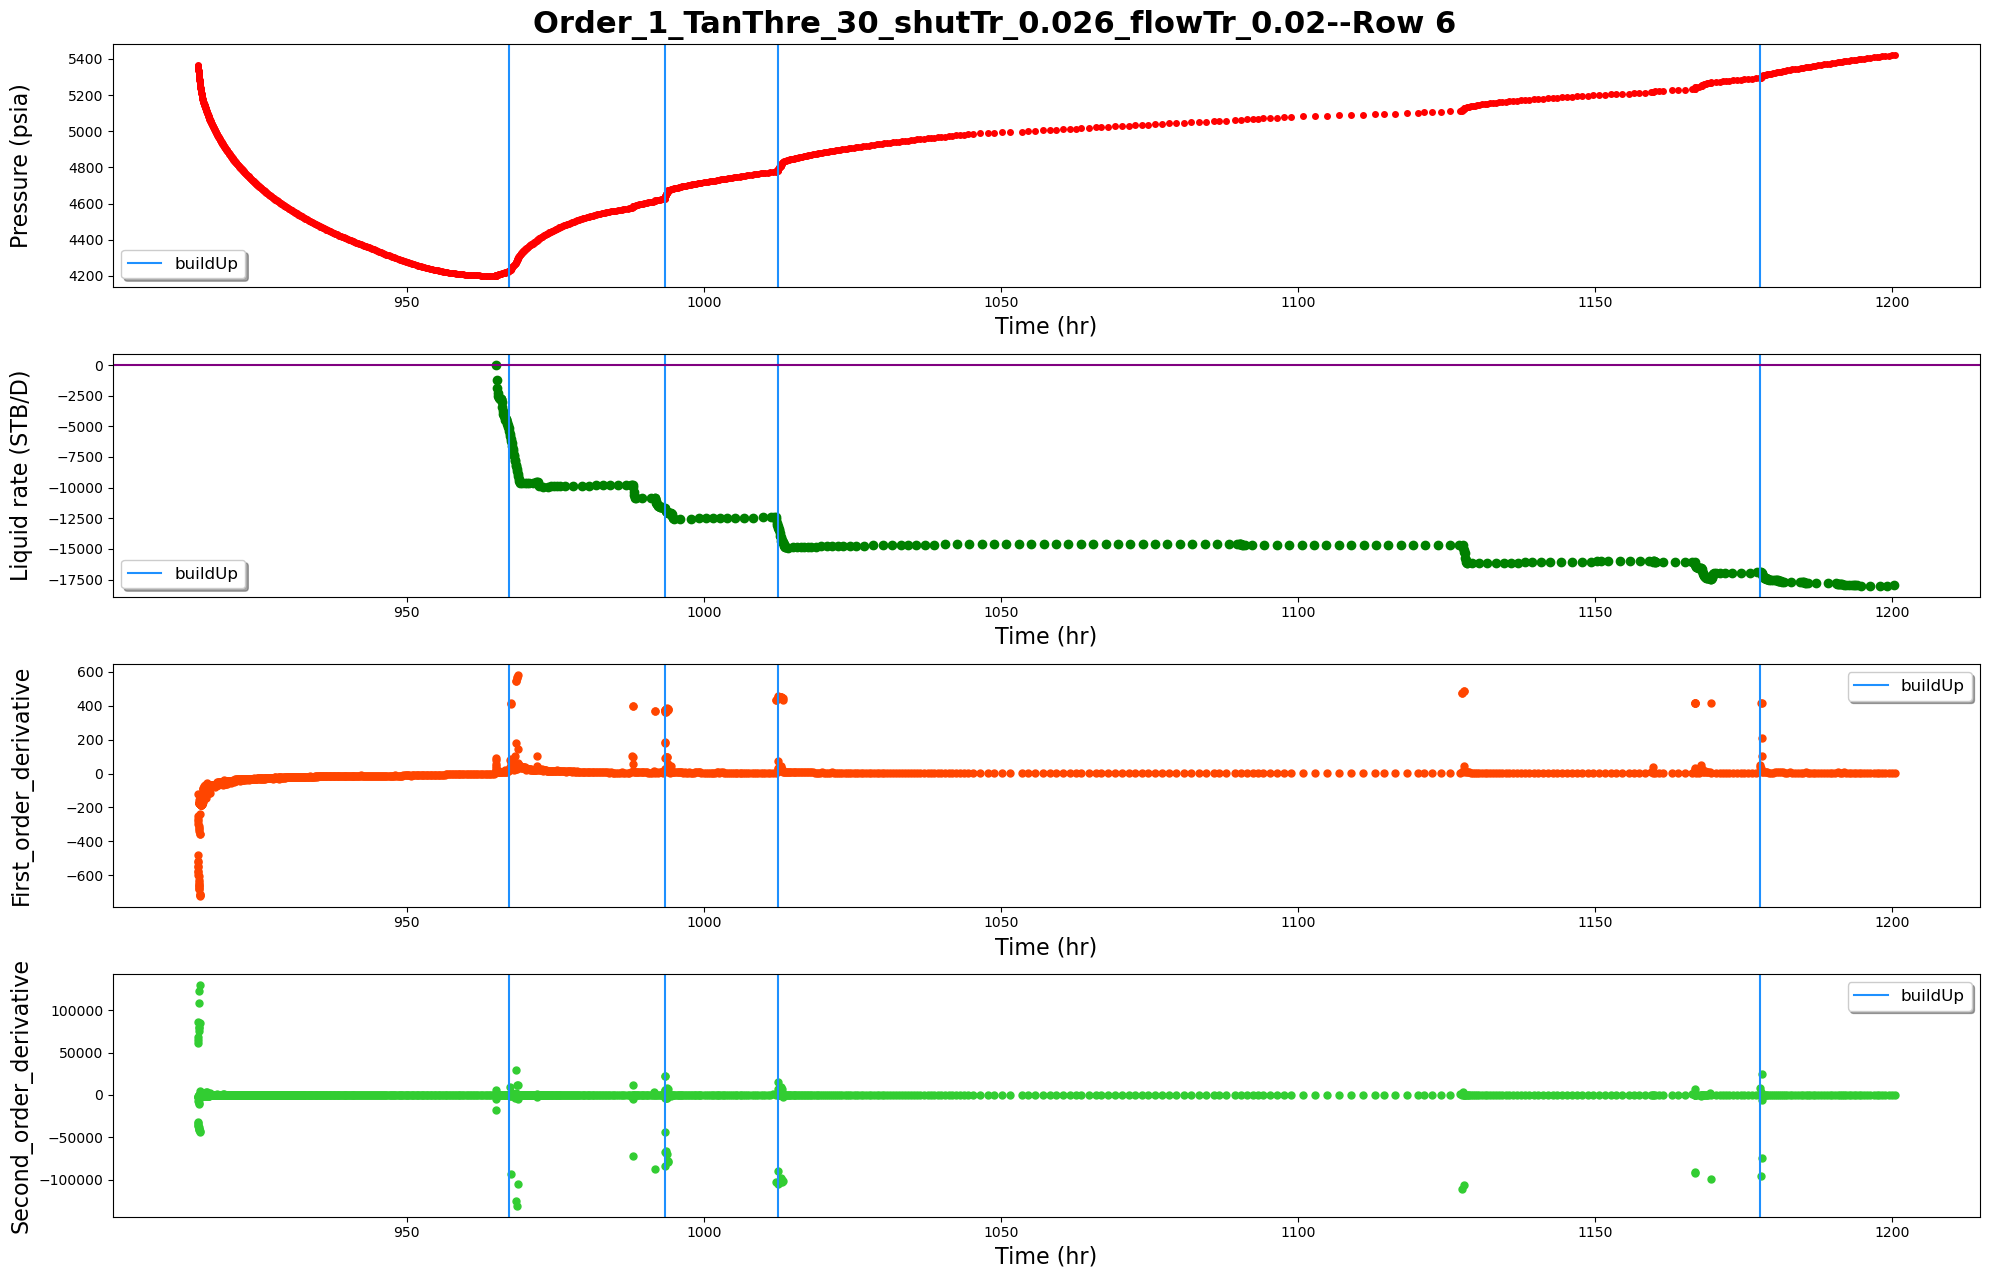

------row 7-----detected points:[7284, 7552, 7622, 7683, 7773, 7842, 7945, 8370]


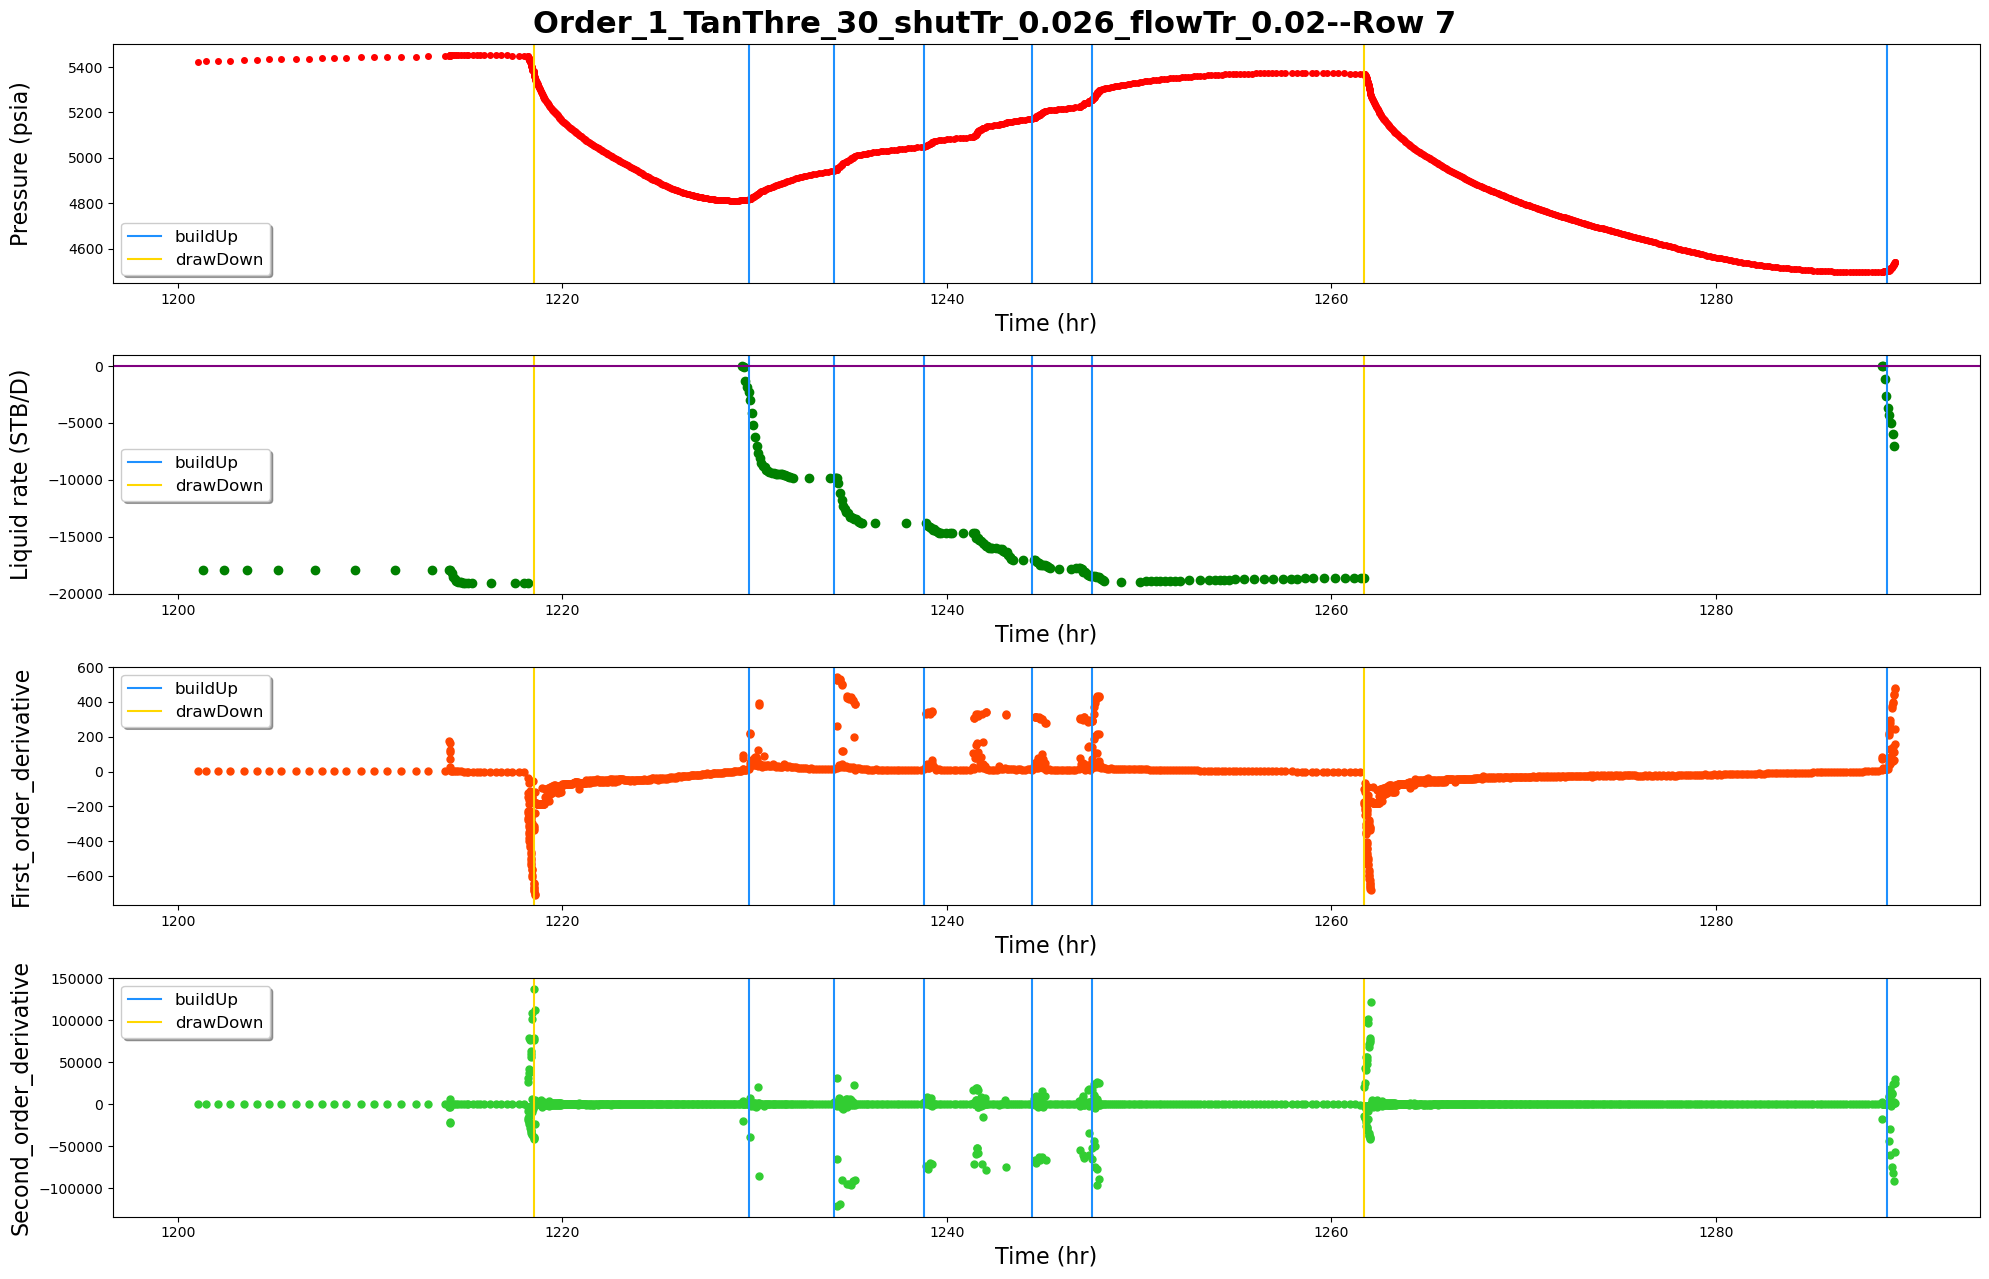

------row 8-----detected points:[8599, 8774, 8867, 9024]


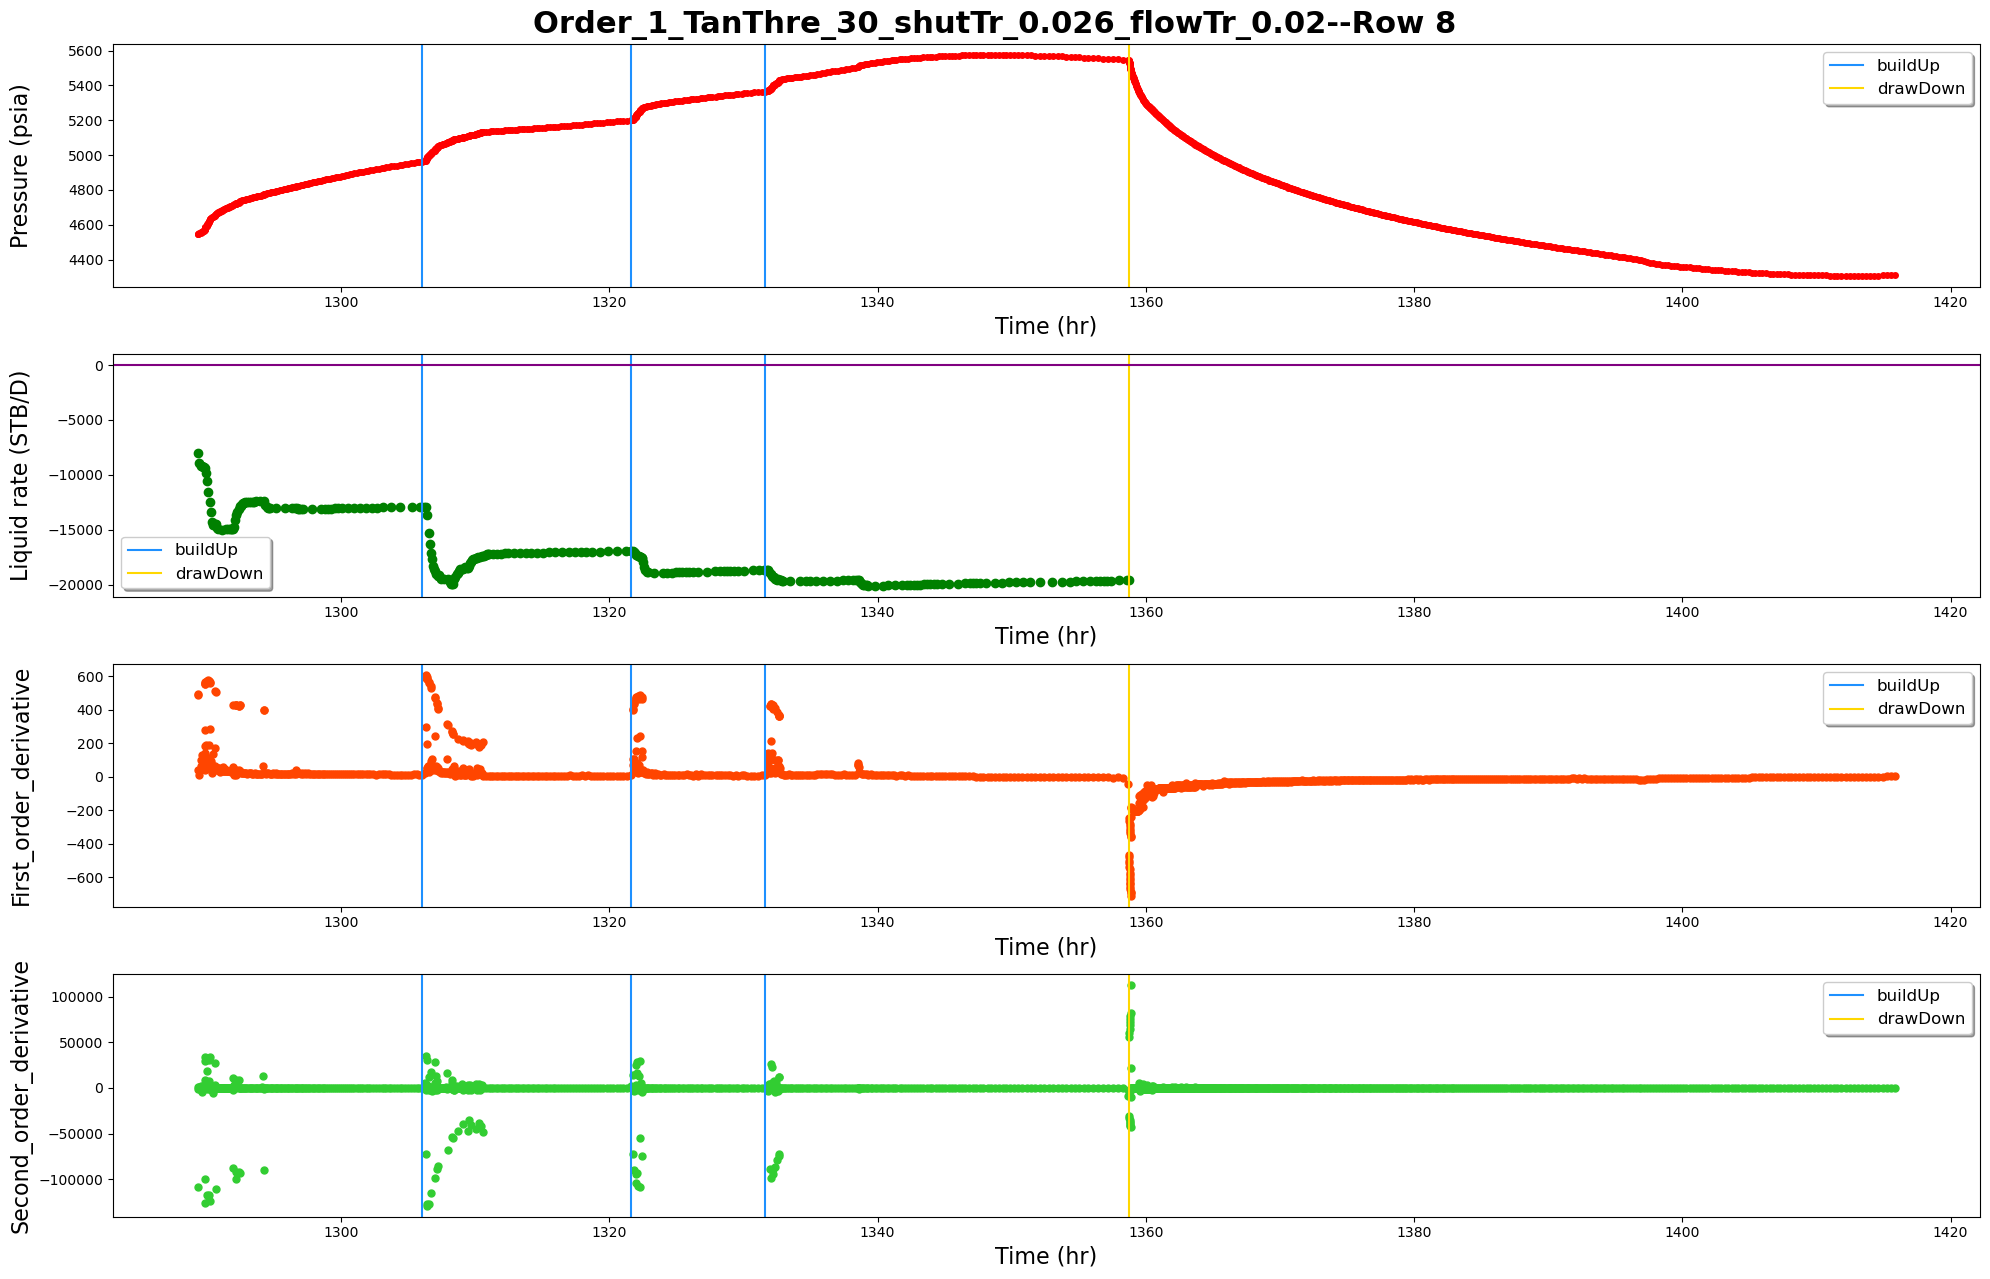

------row 9-----detected points:[9606, 9663, 9718, 10064, 10149, 10226, 10331, 10464, 10527]


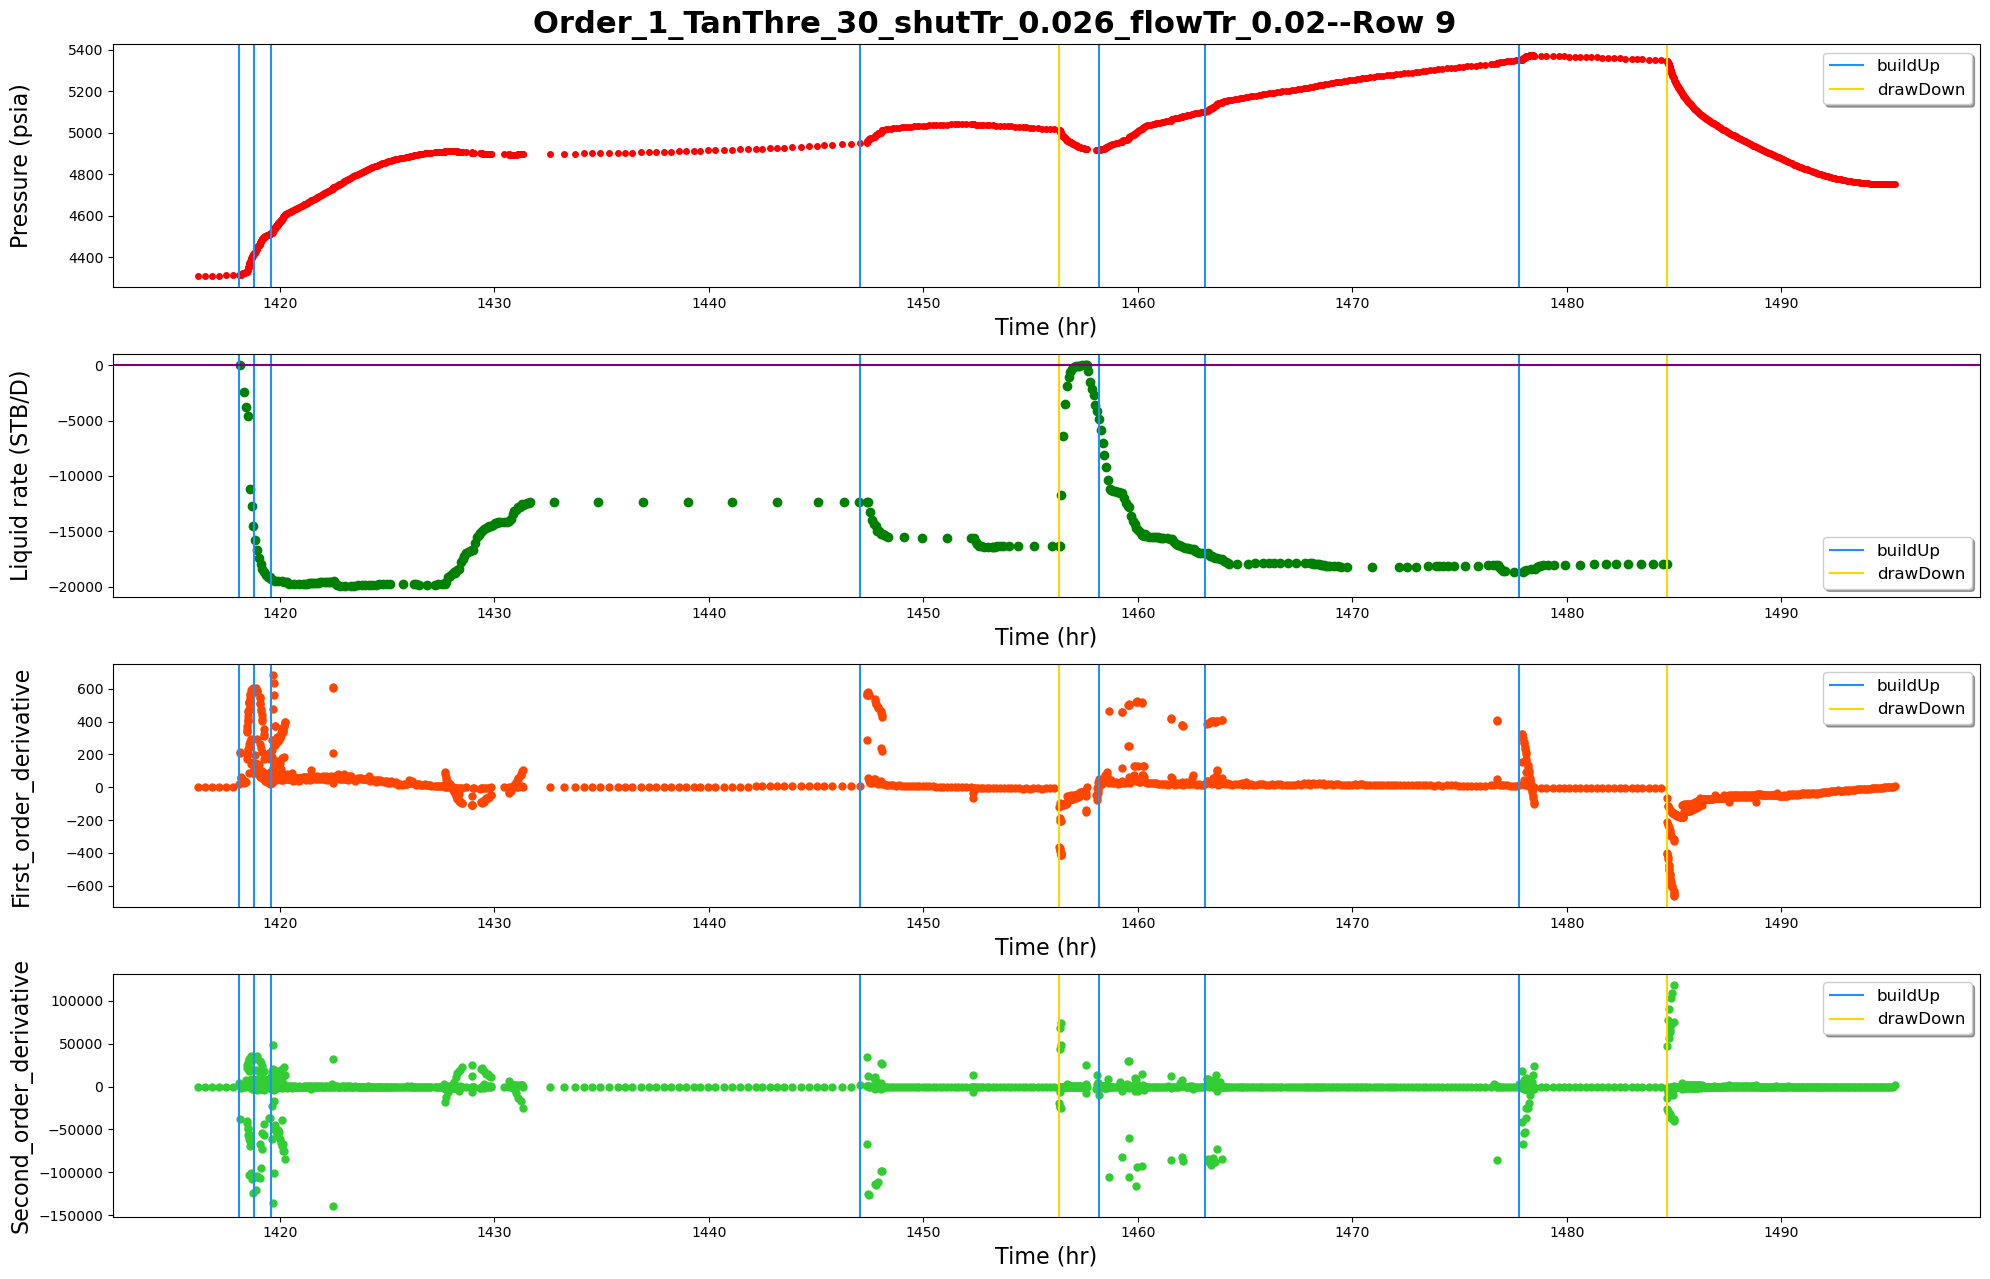

------row 10-----detected points:[10809, 10871, 10947, 10998, 11082, 11340, 11490, 11592, 11668, 11754]


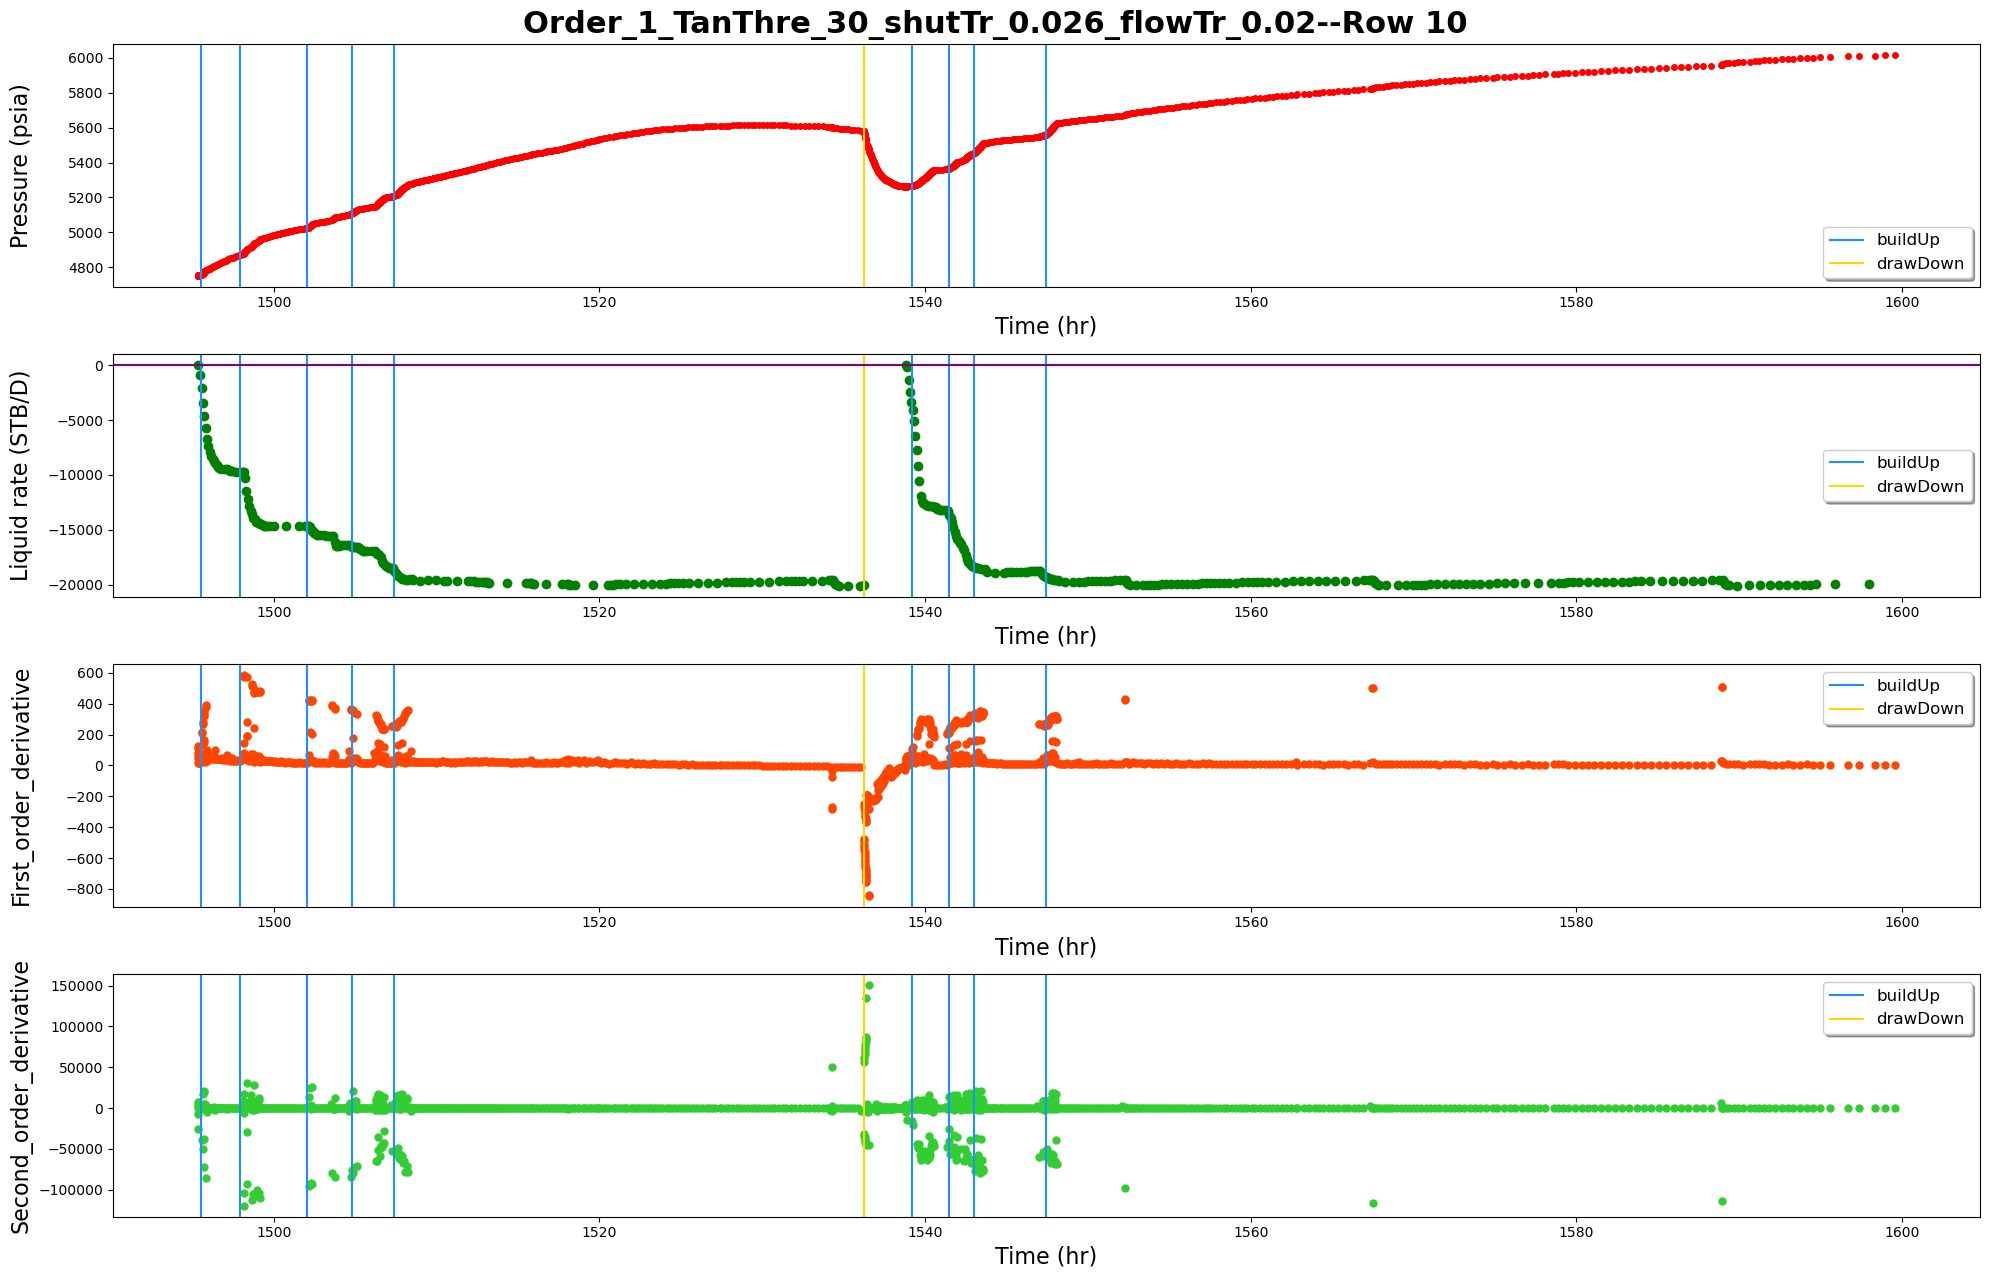

------row 11-----detected points:[12240, 12362, 13038, 13100, 13147, 13191]


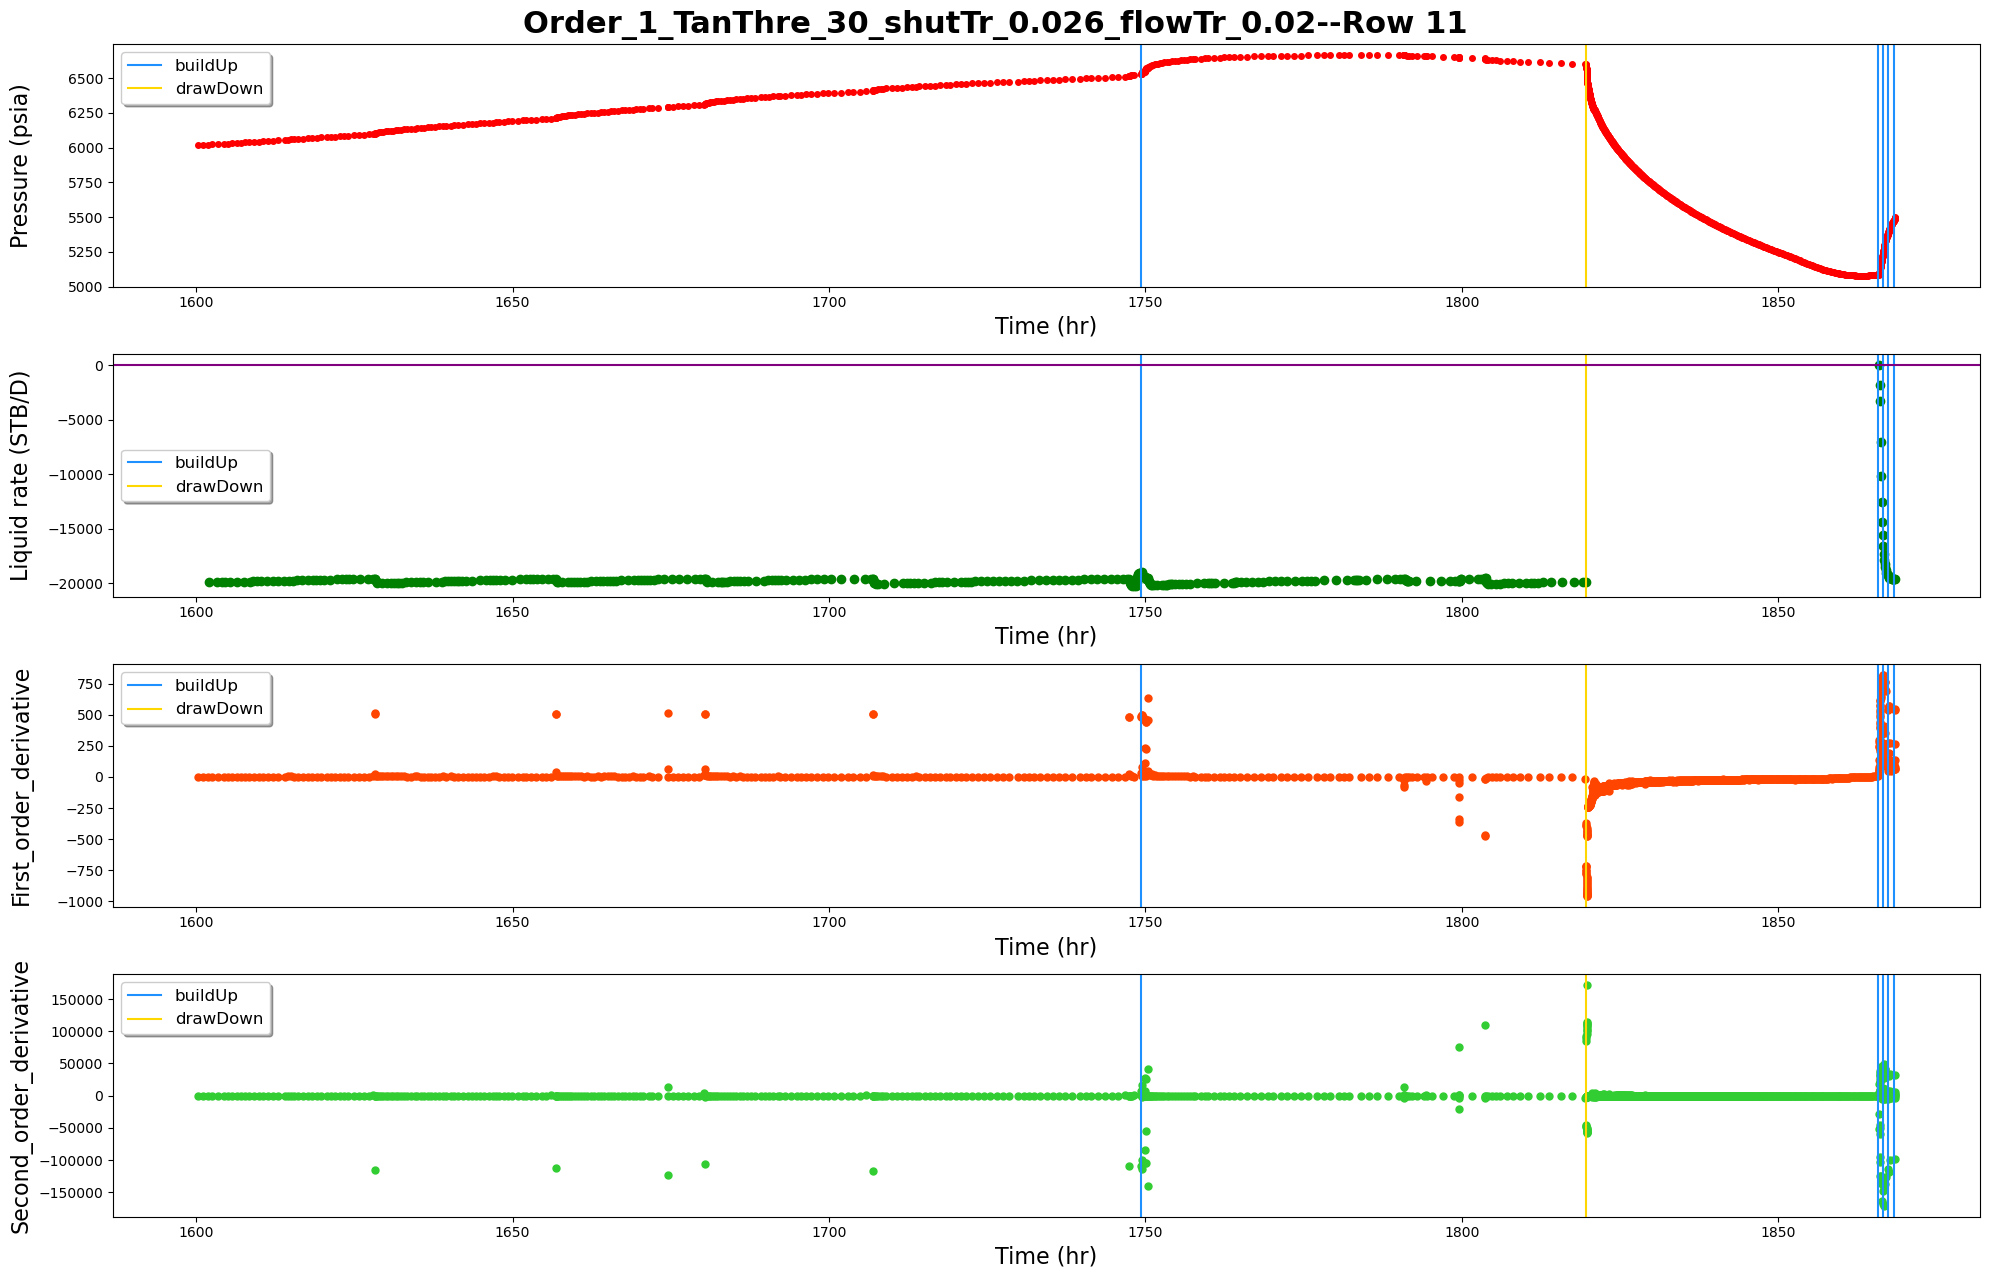

------row 12-----detected points:[13332, 13396, 13526, 13600, 13774, 13909, 14089, 14143, 14195, 14270]


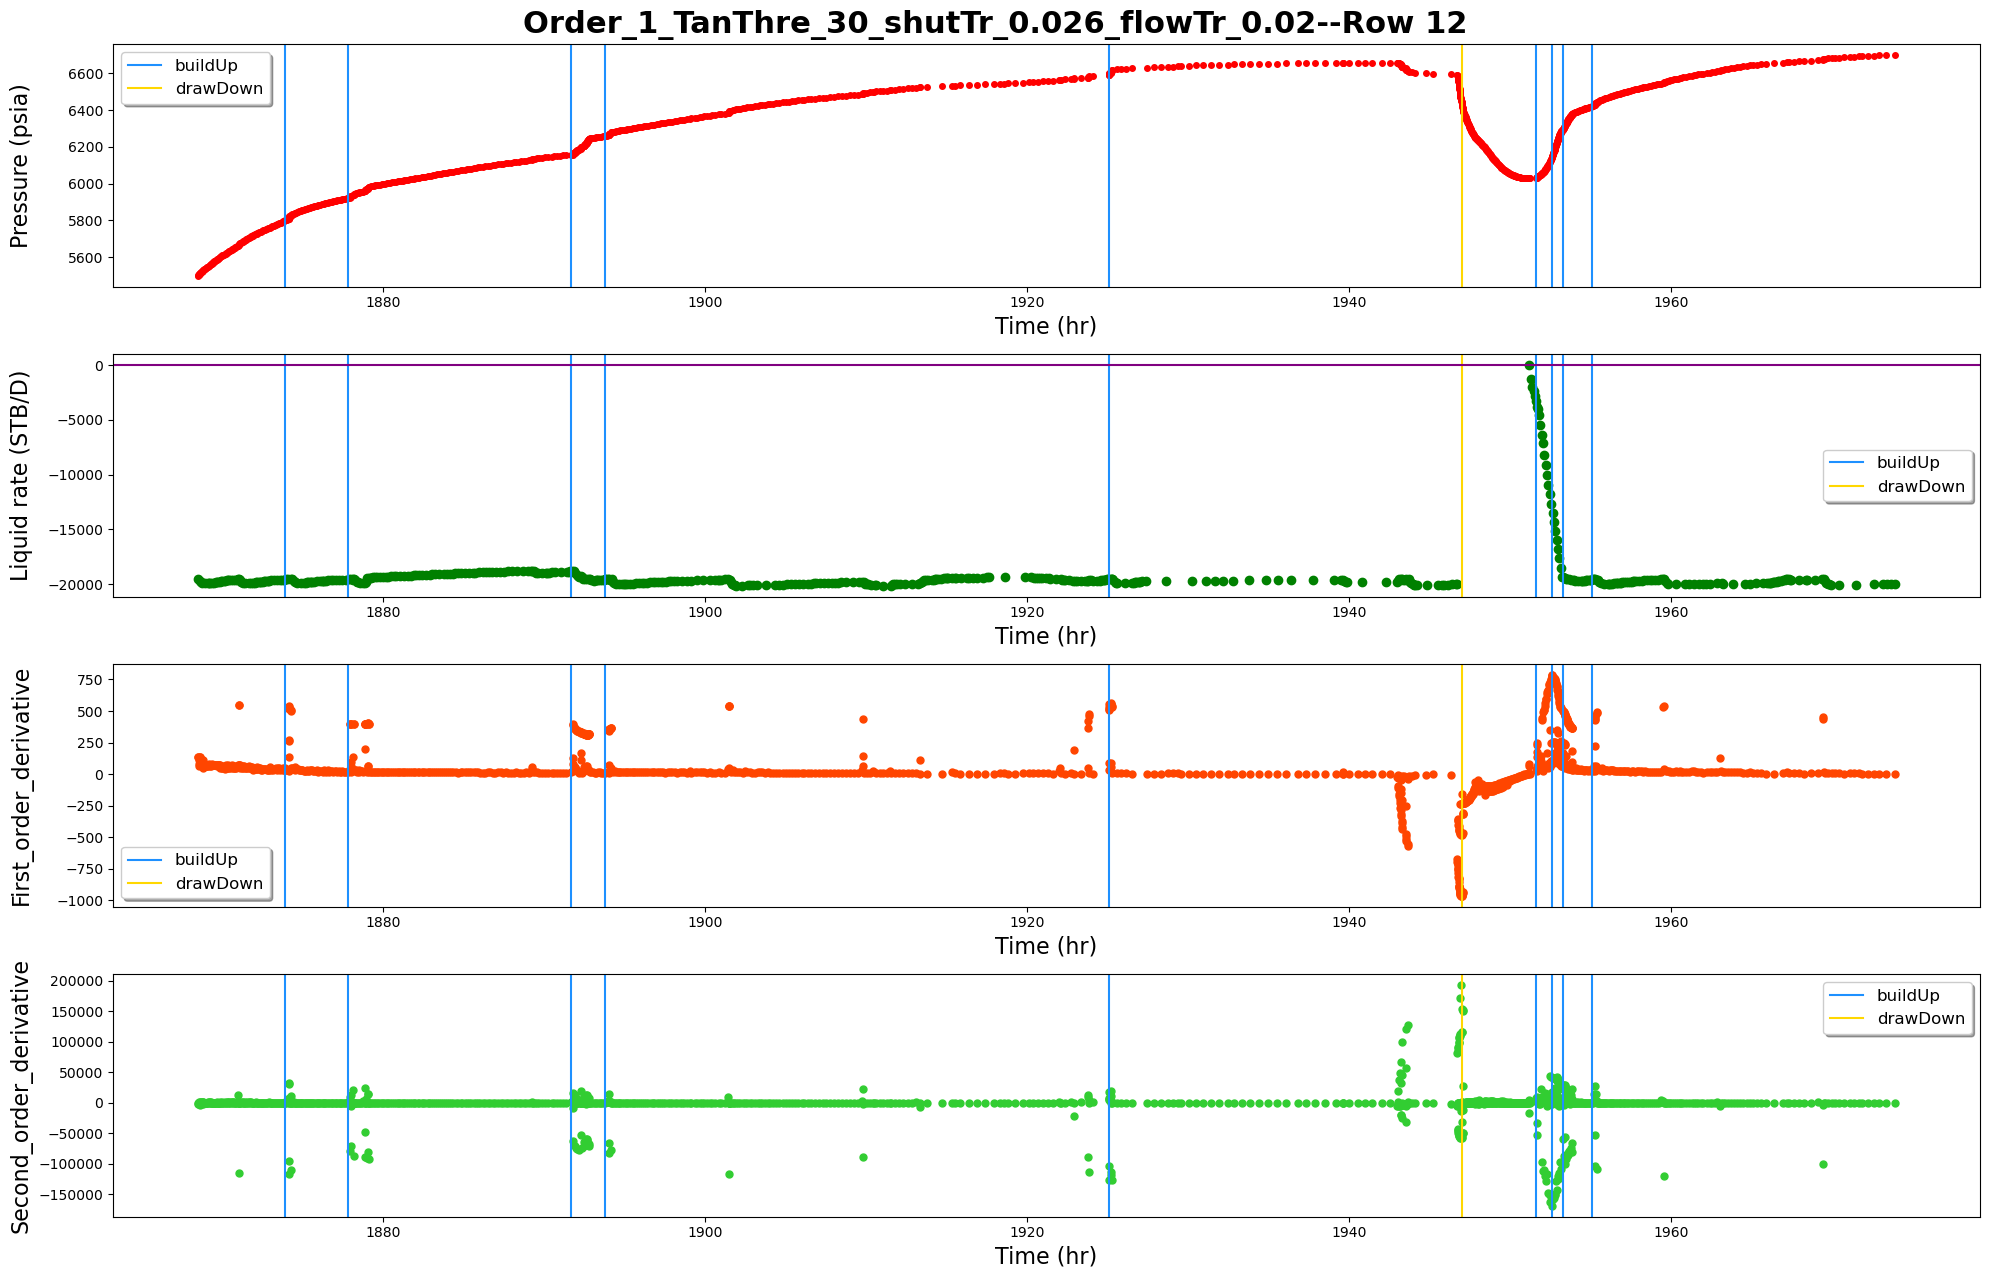

------row 13-----detected points:[14589, 14676, 14774, 15346, 15401, 15461, 15574]


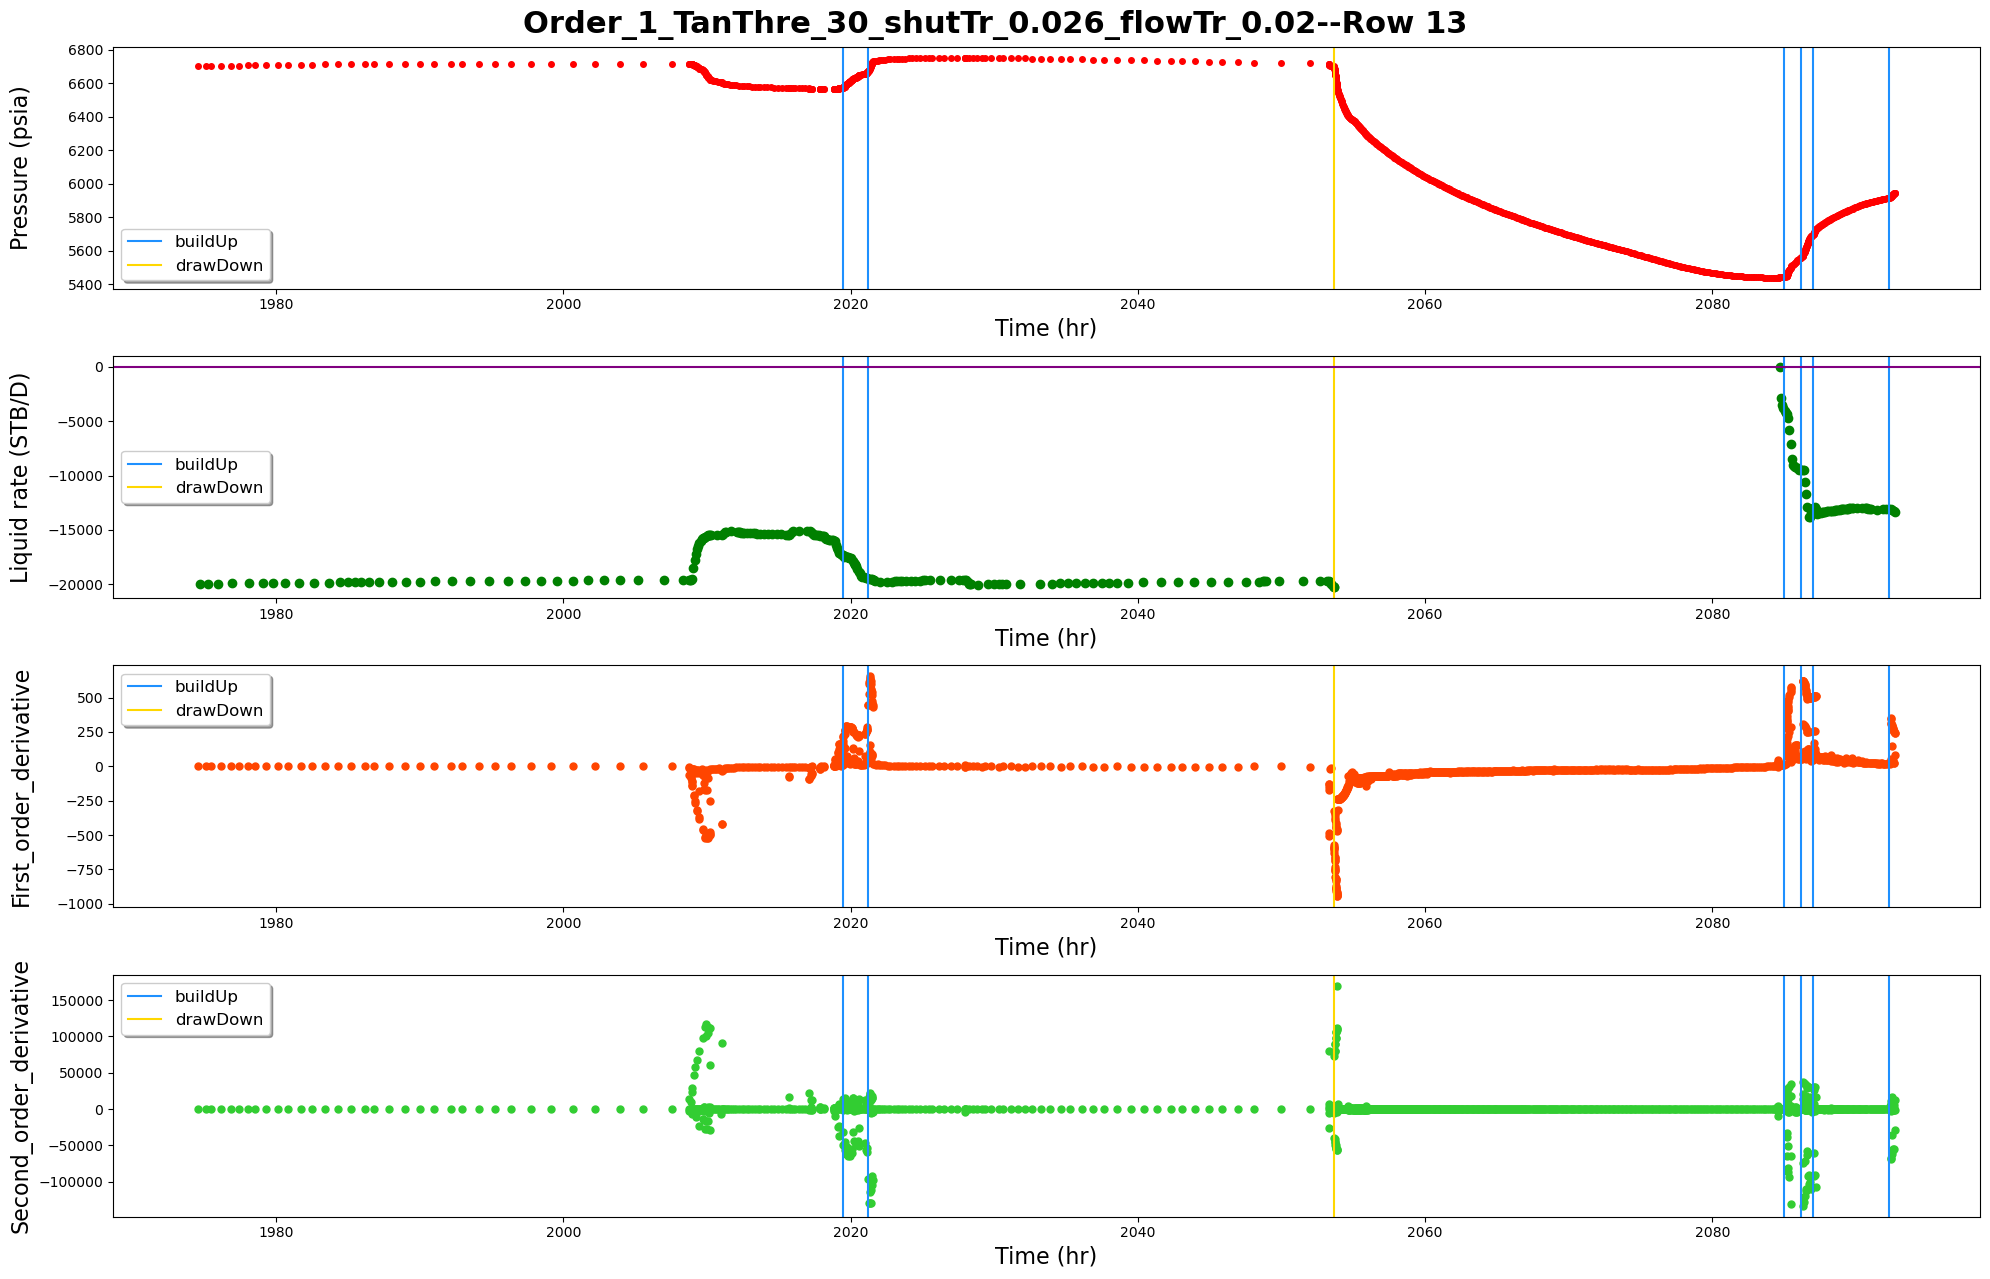

------row 14-----detected points:[15738, 15866, 15939, 16008, 16096, 16584, 16638, 16697, 16750]


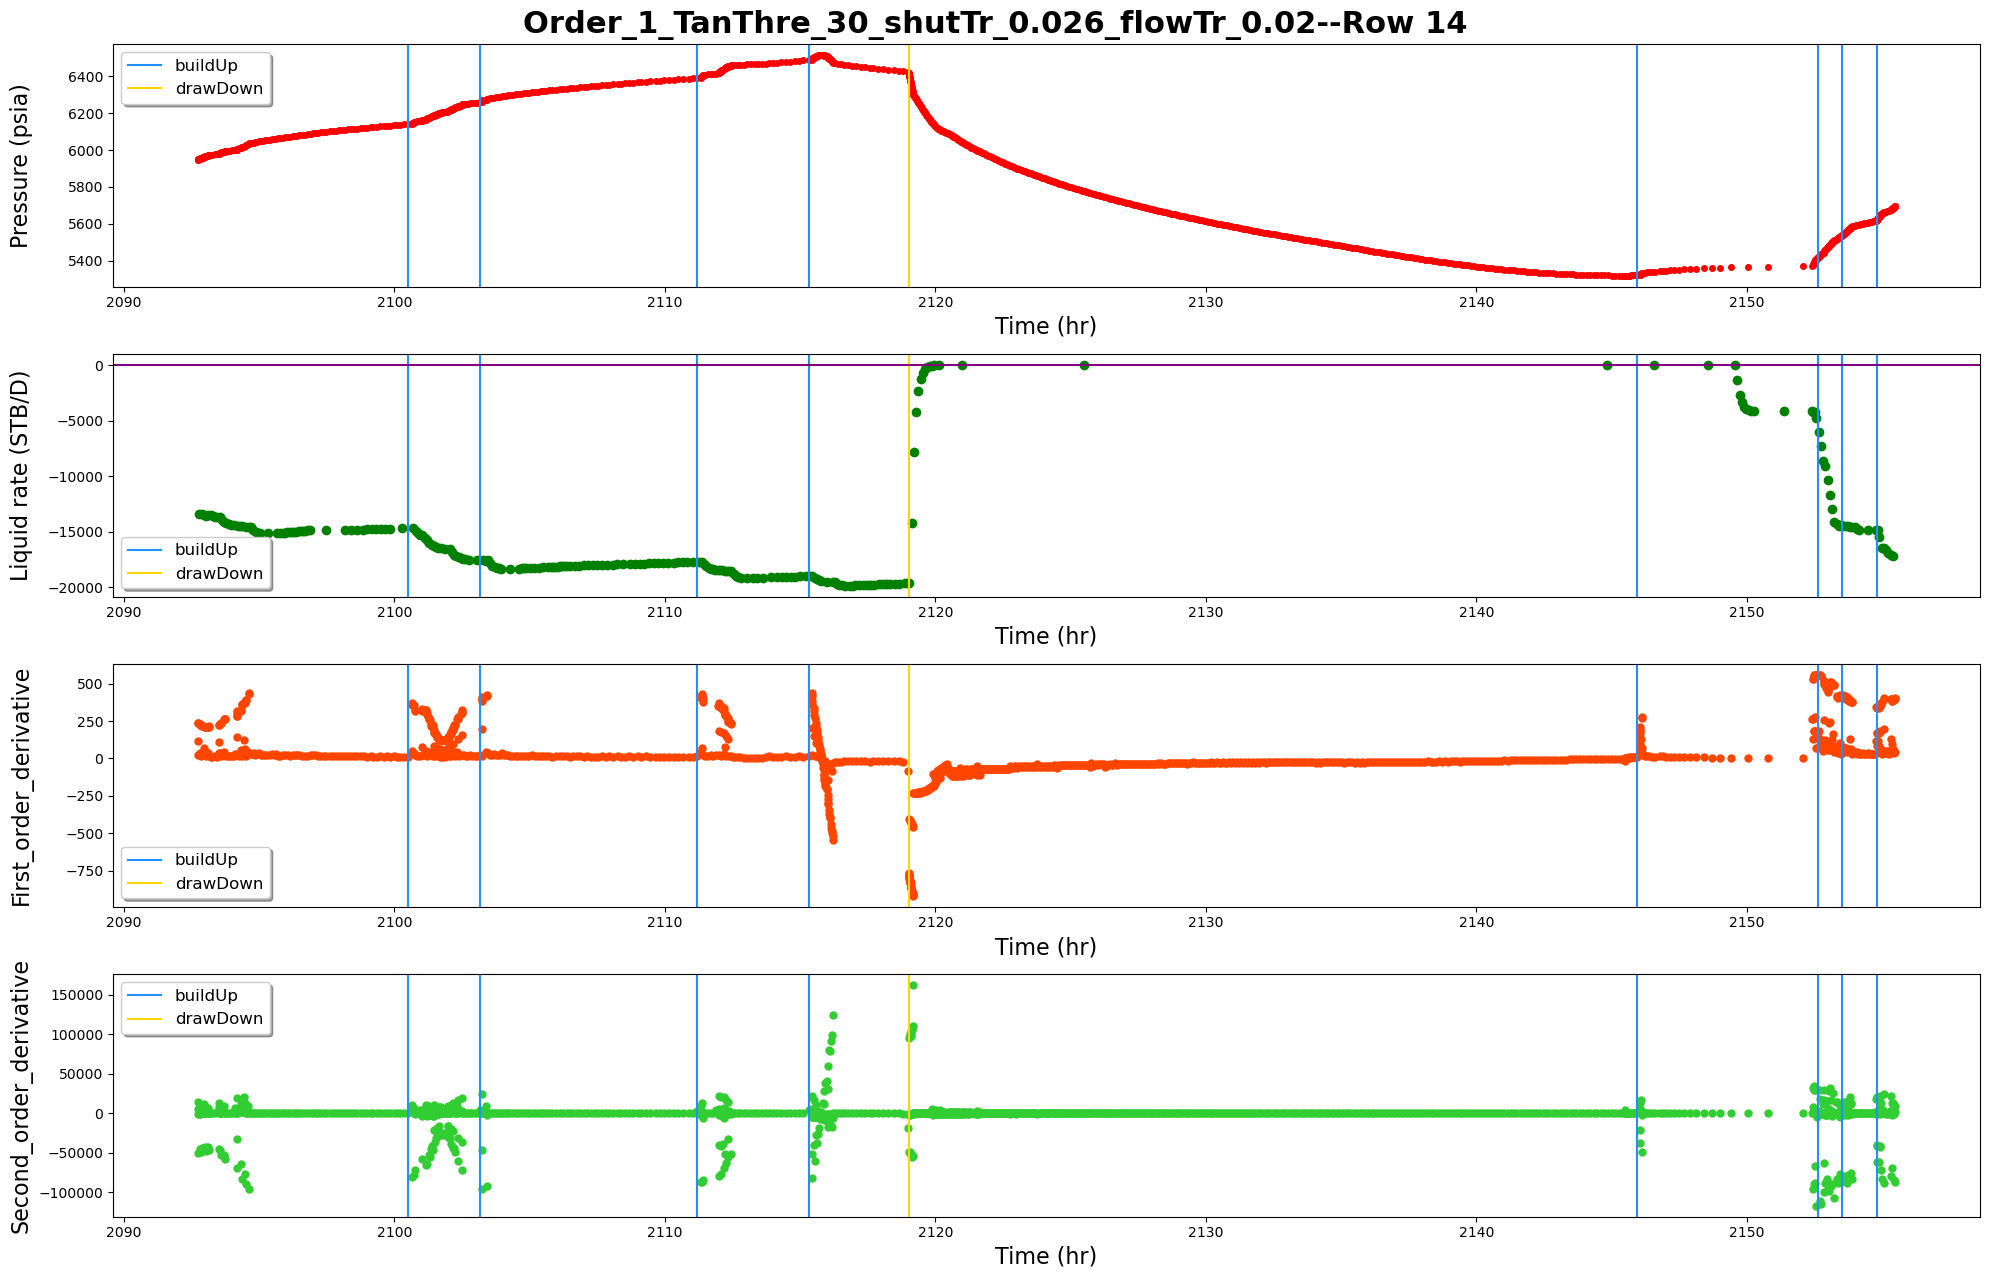

------row 15-----detected points:[16805, 16902, 17064, 17128, 17245, 17341, 17462, 17589]


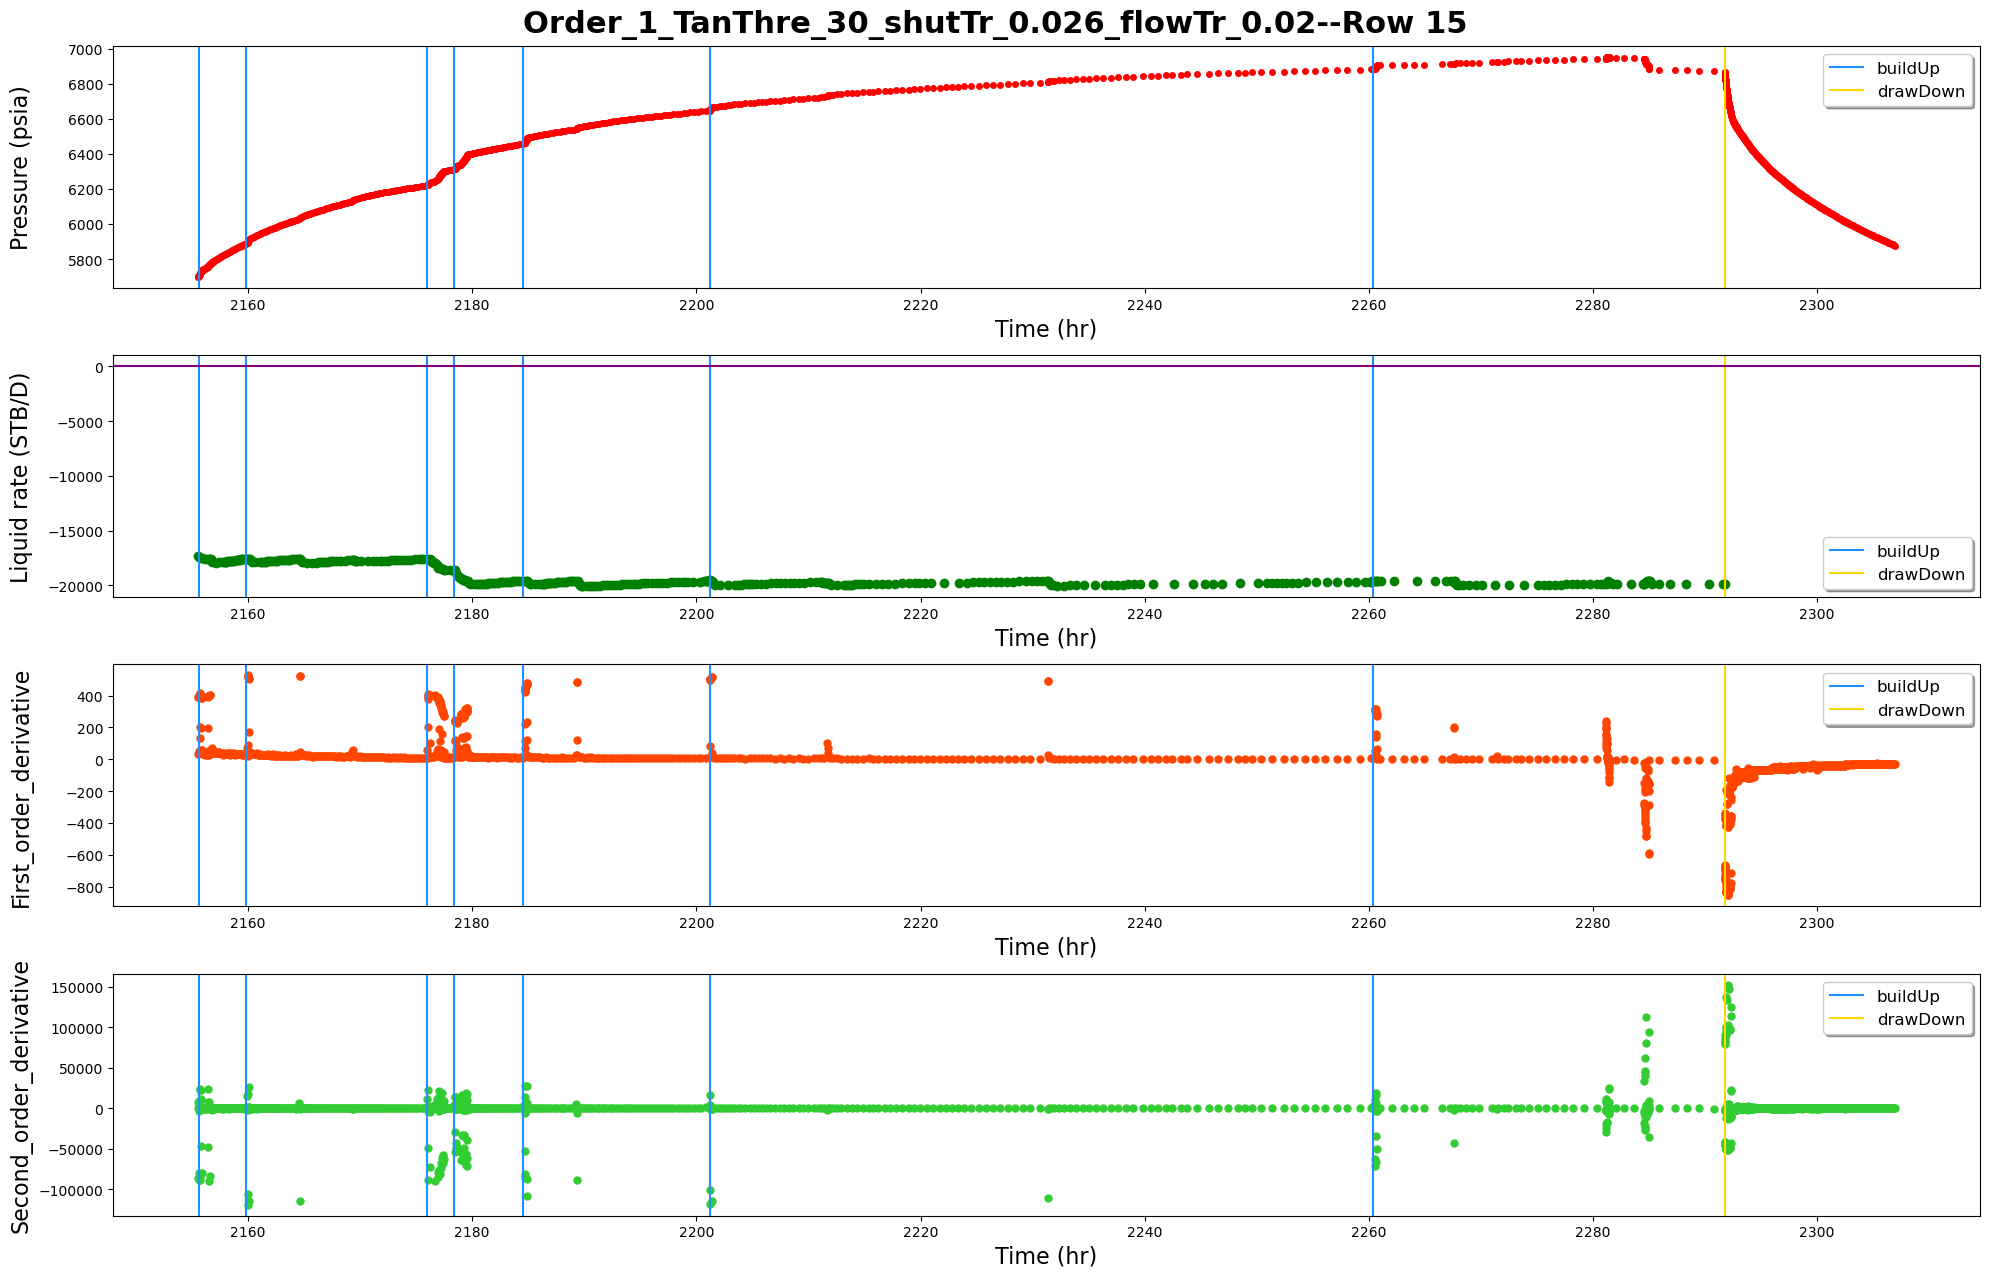

------row 16-----detected points:[18433, 18480, 18523, 18590, 18643, 18718, 18776, 18810, 18858, 18893, 18944, 19029, 19148]


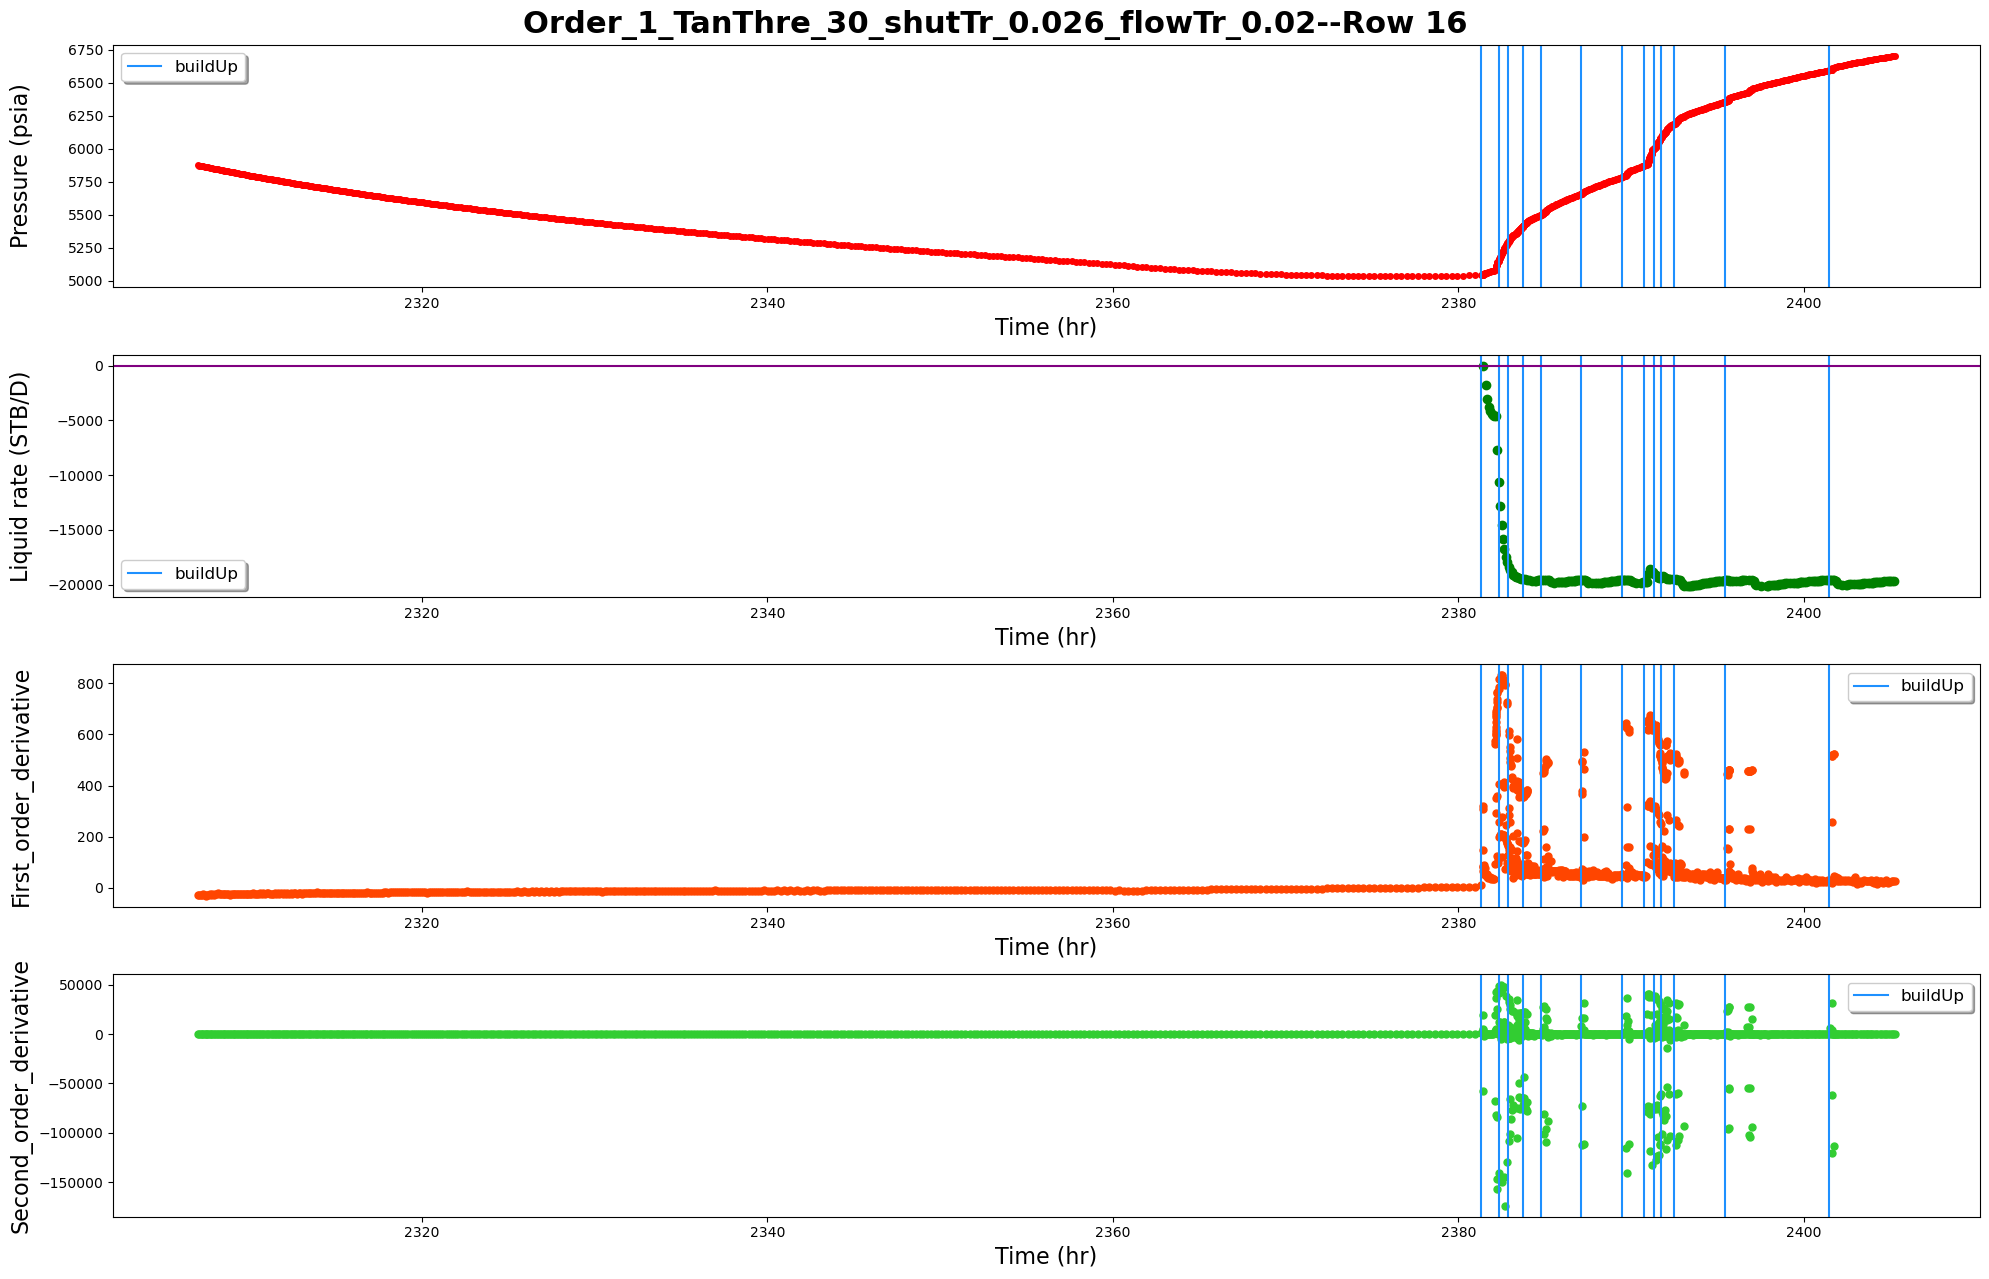

------row 17-----detected points:[19205, 19457, 19556, 19642, 19761, 19854, 19904, 20035, 20346]


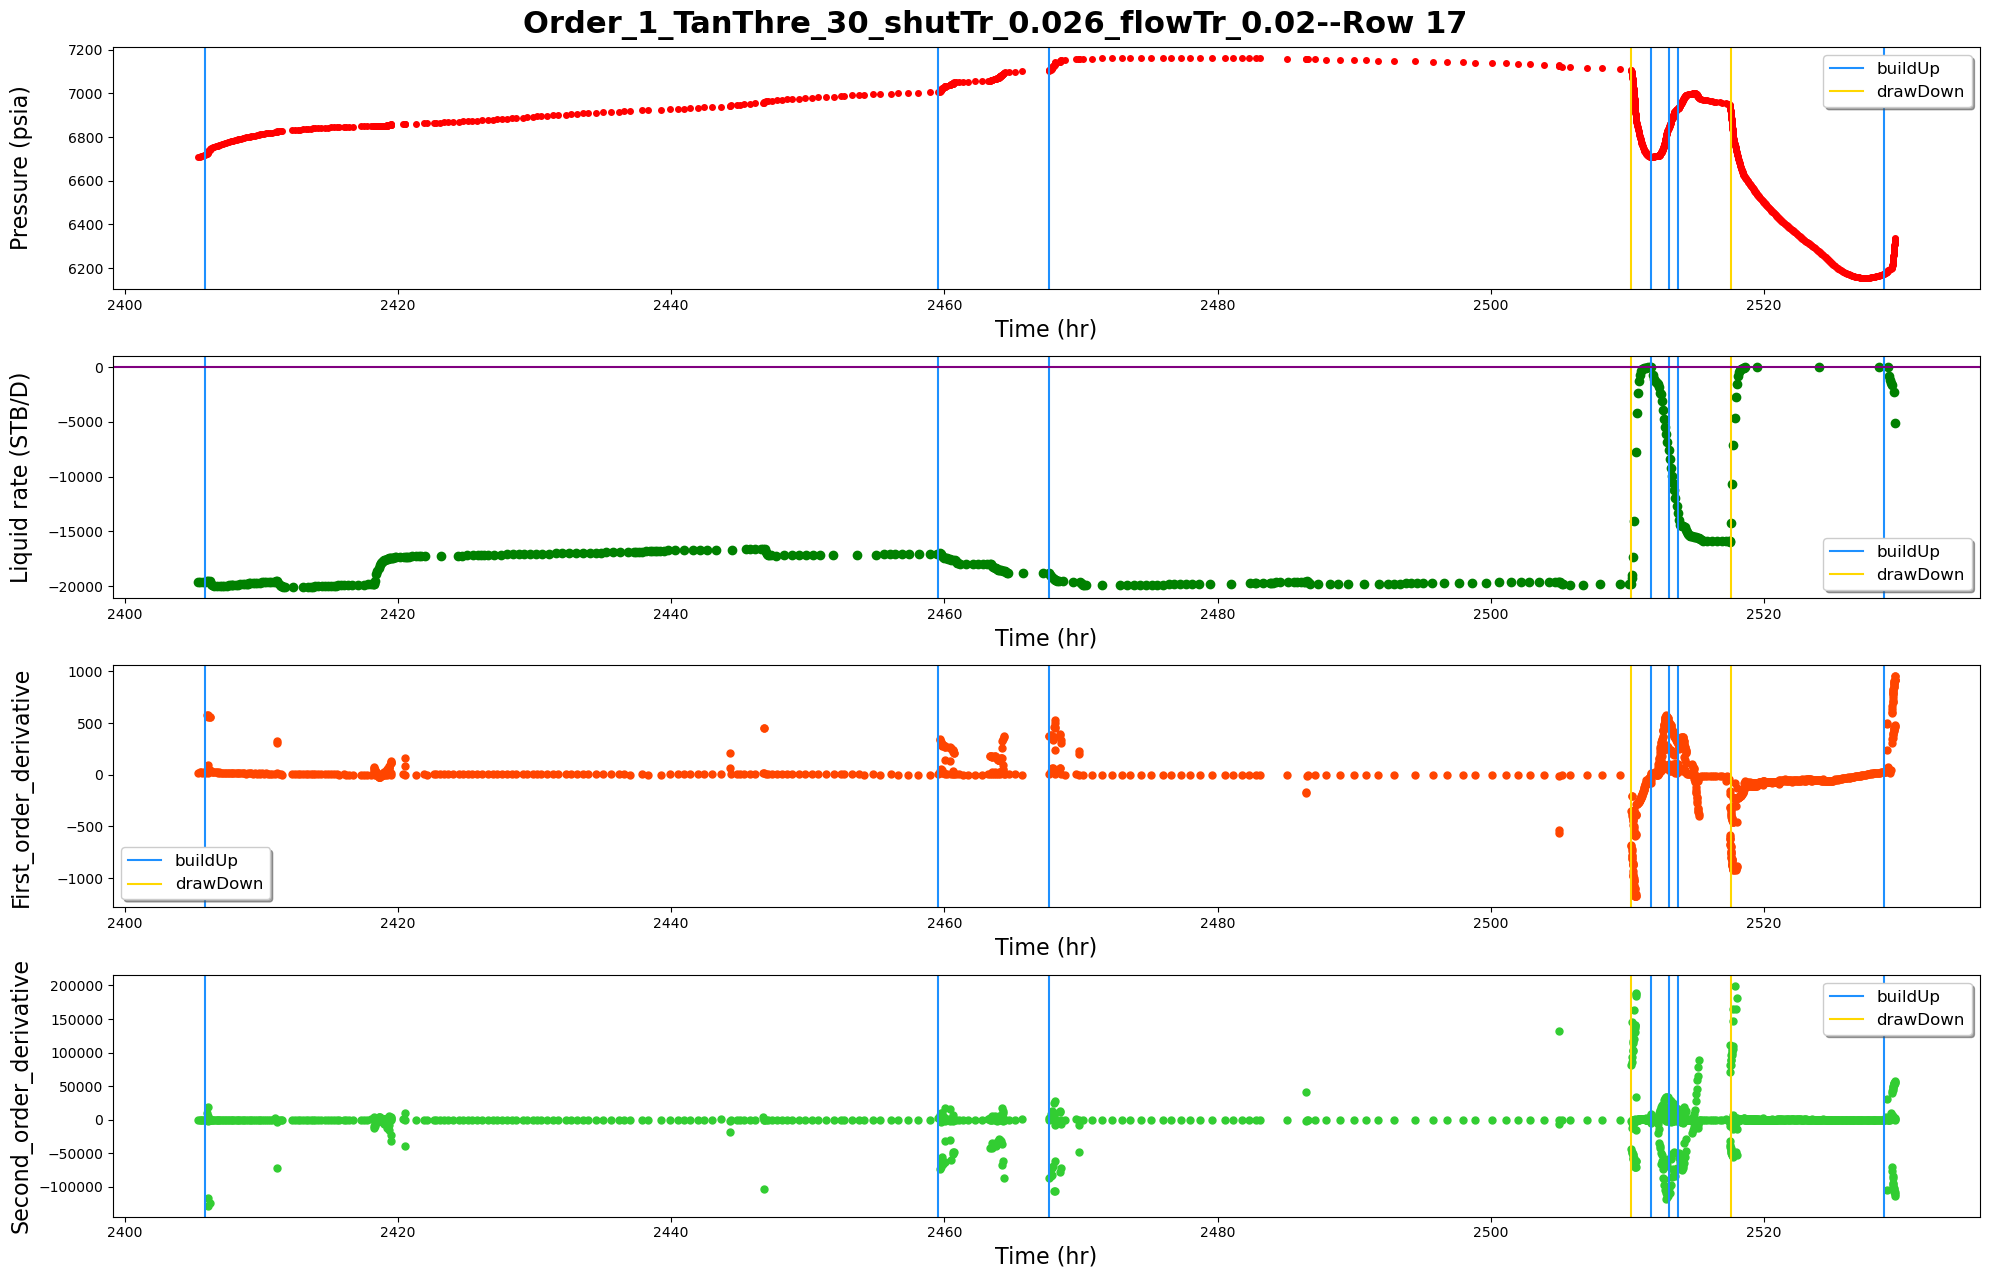

------row 18-----detected points:[20410, 20457, 20524, 20700, 21034, 21085, 21114, 21171, 21238, 21420, 21535]


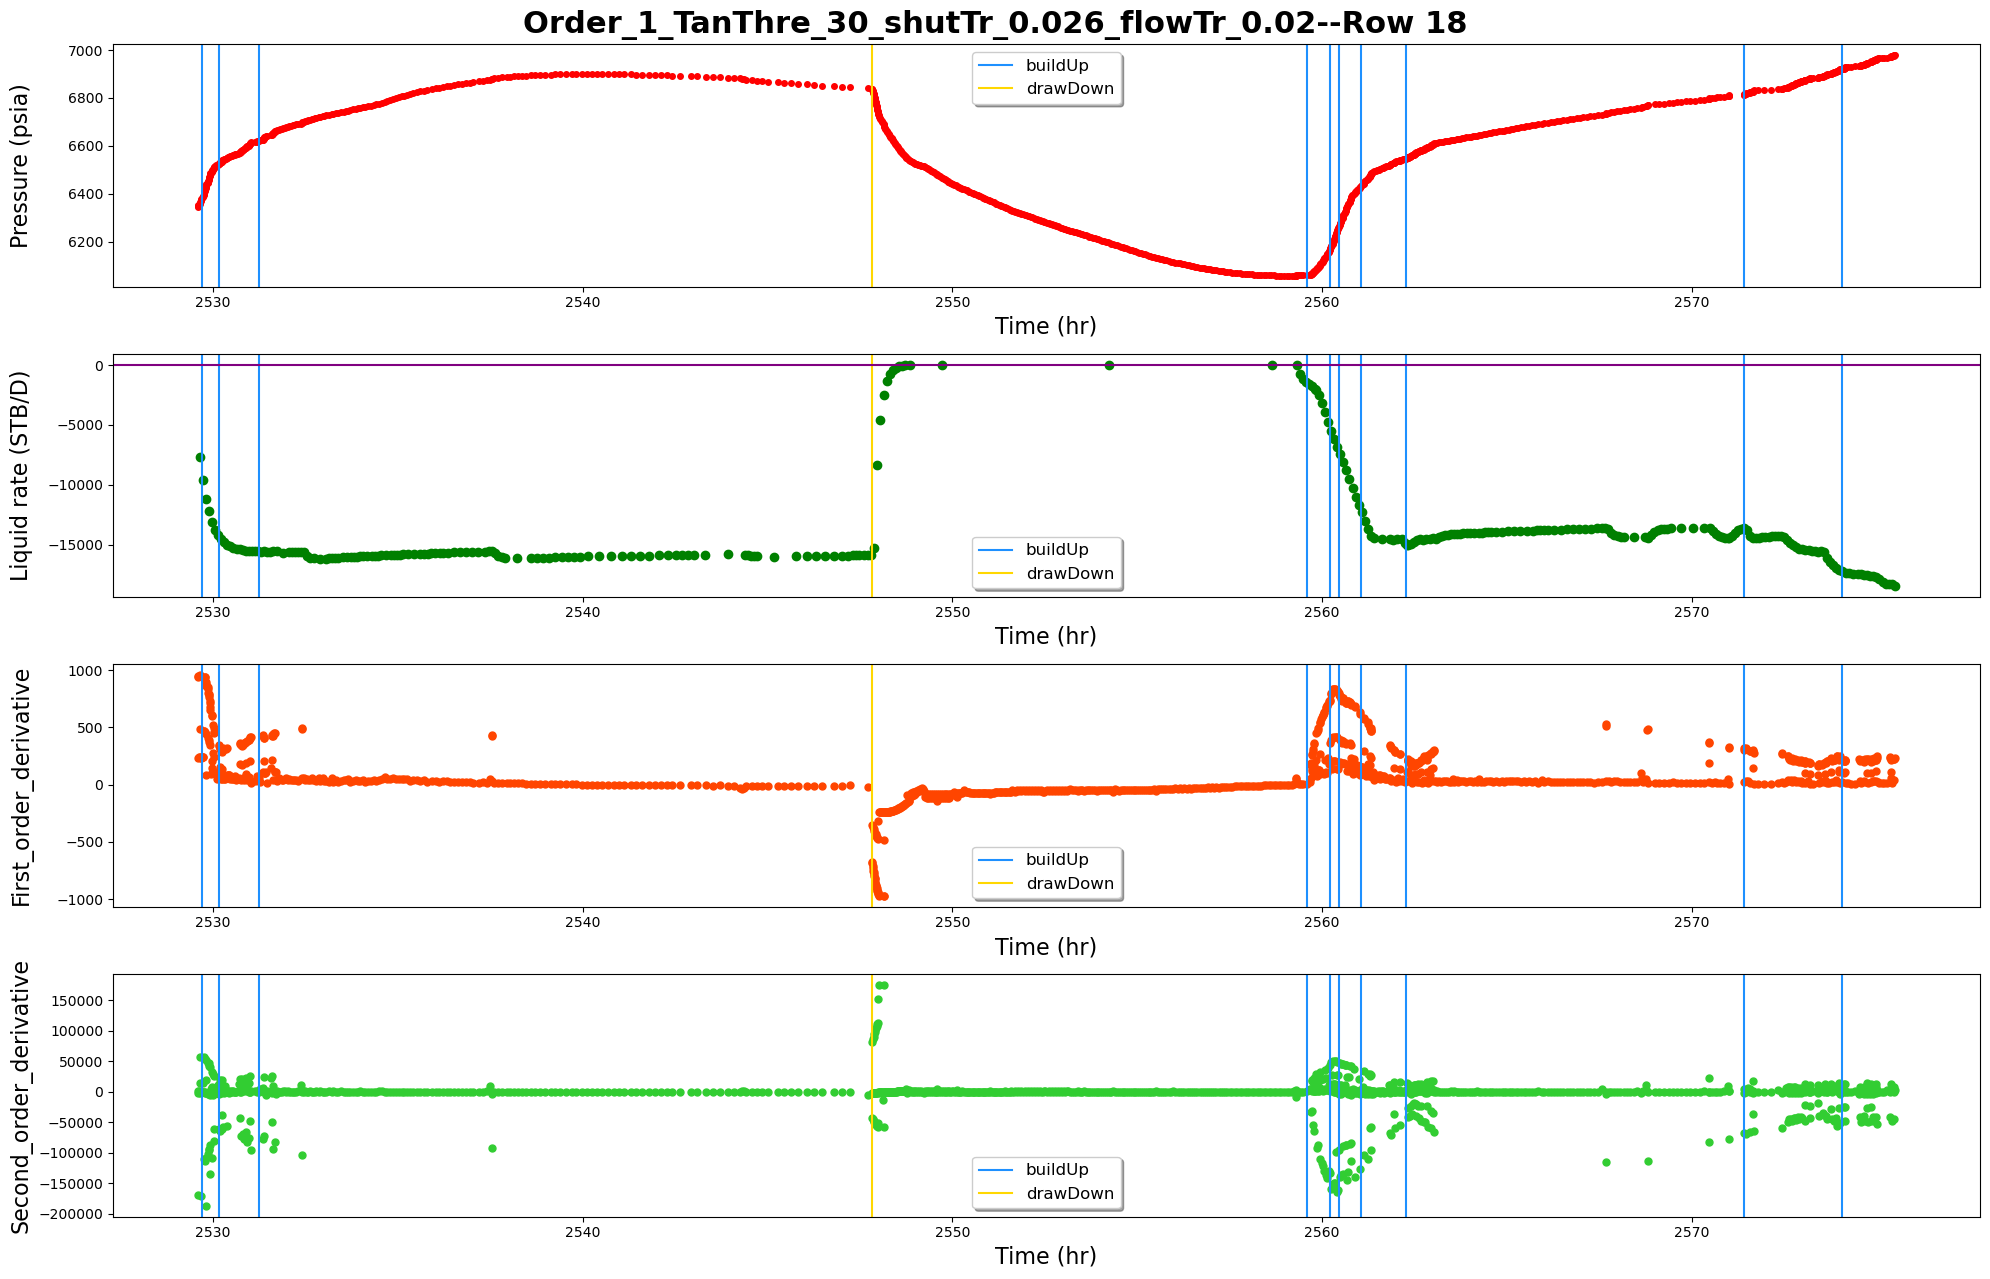

------row 19-----detected points:[21651, 21974, 22189, 22273, 22337, 22406, 22488, 22555, 22620, 22728]


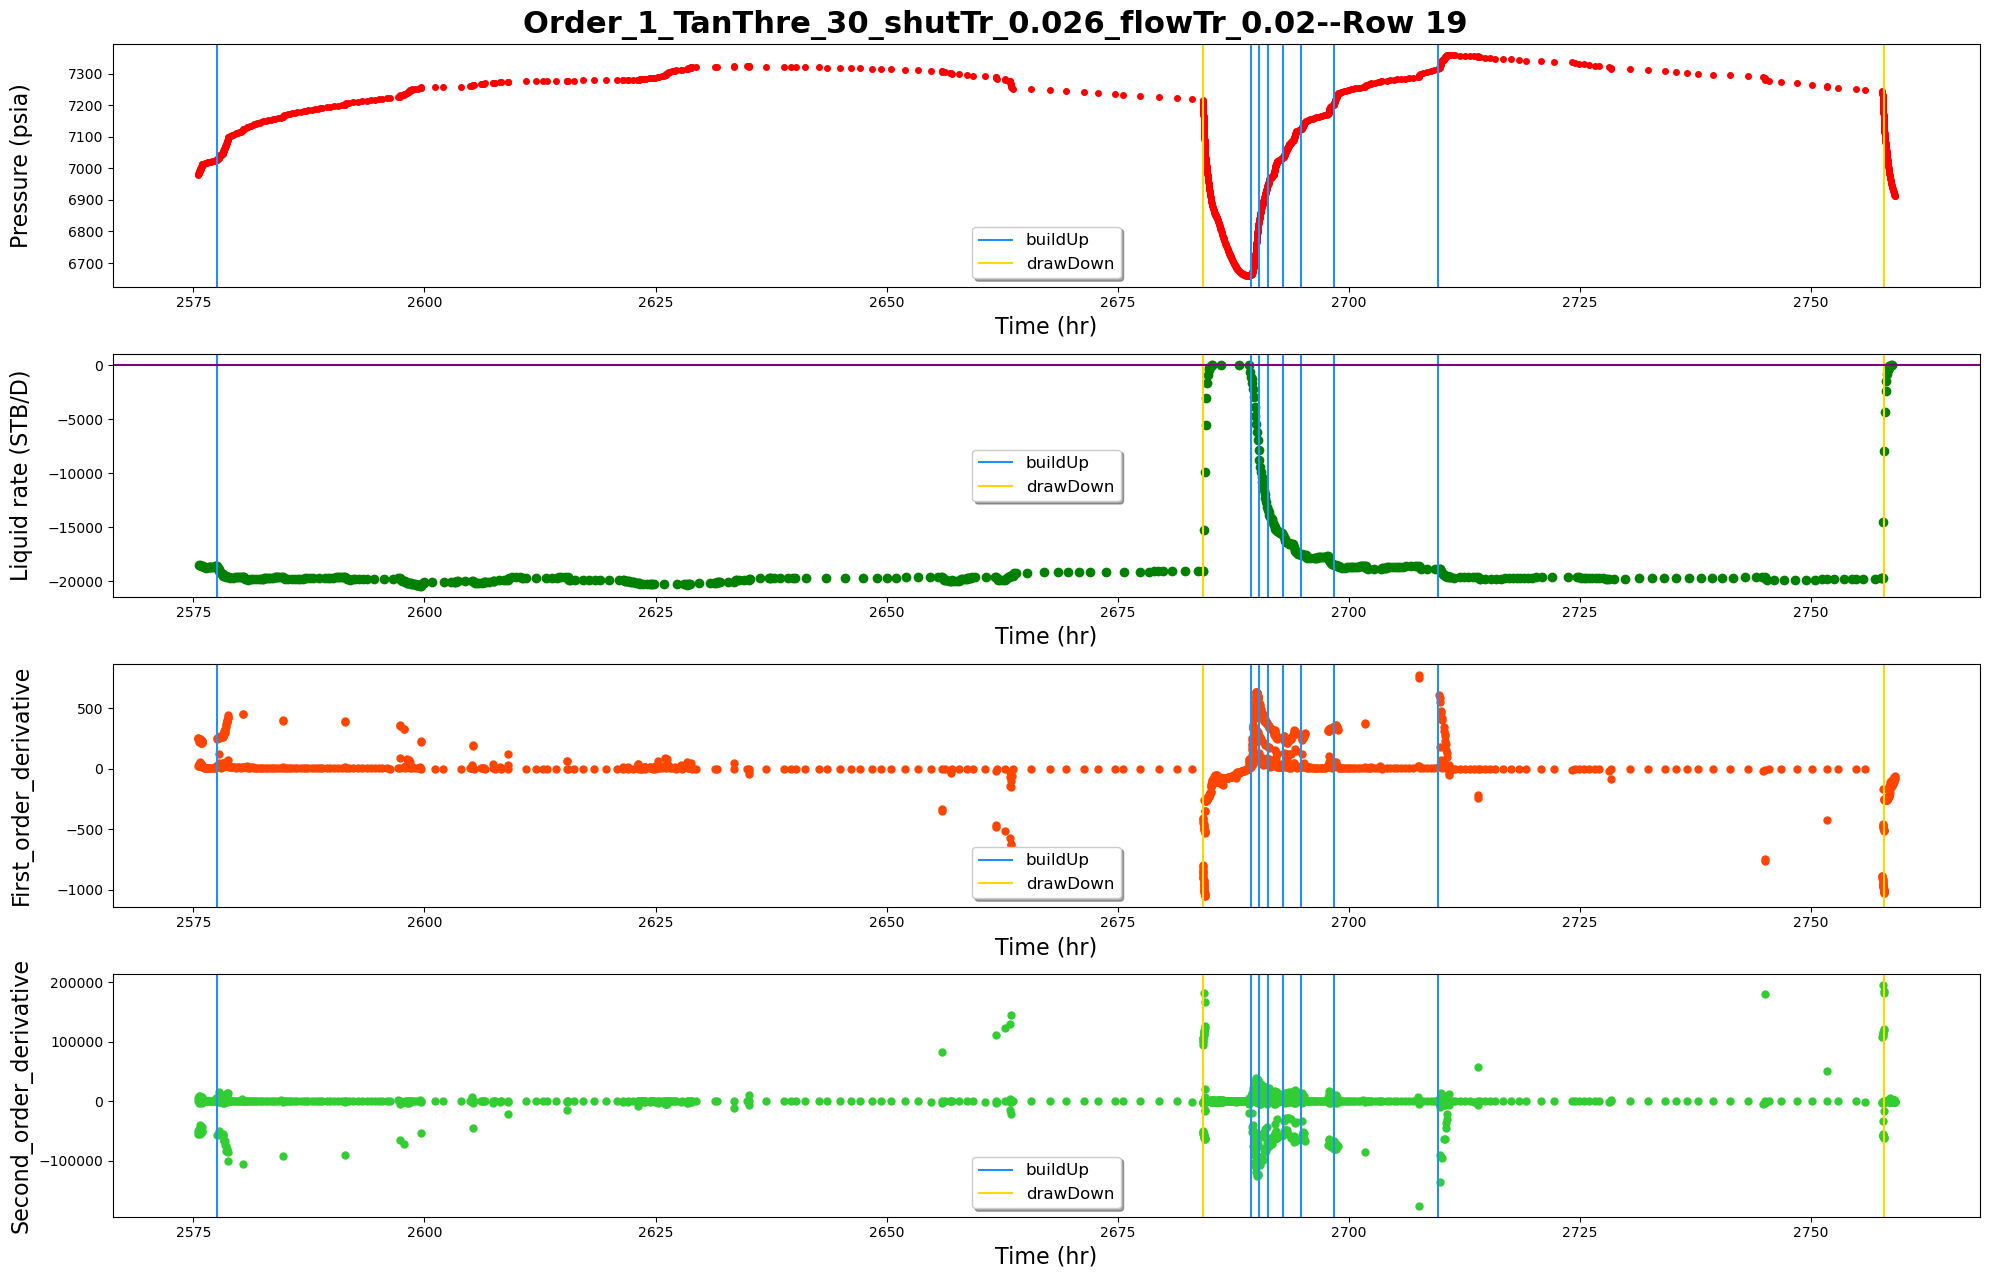

------row 20-----detected points:[23230, 23284, 23313, 23350, 23393, 23638, 23771, 23923, 23979]


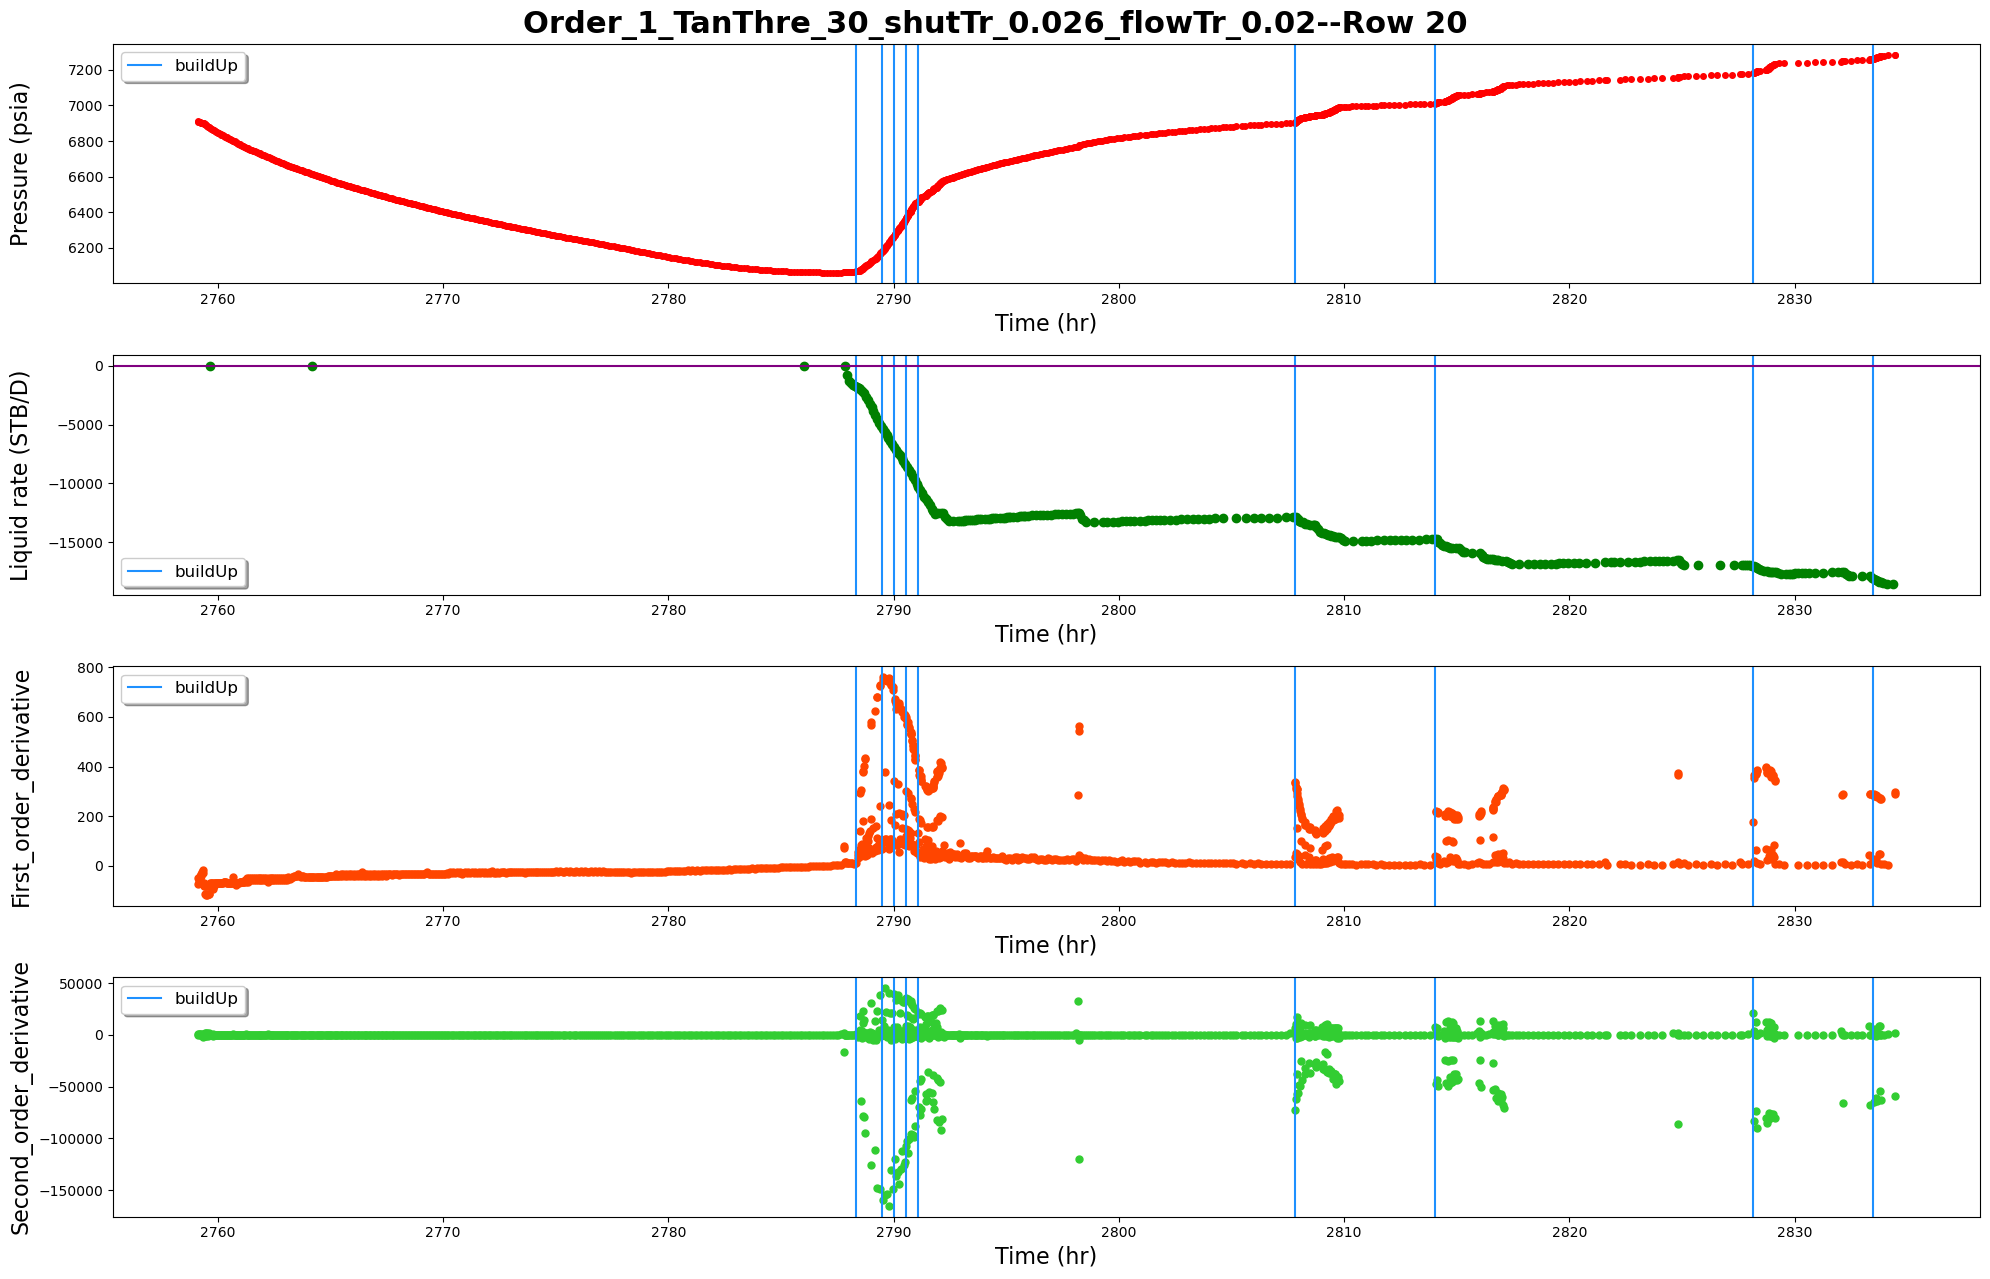

------row 21-----detected points:[24068, 24215, 24679, 24755, 24792, 24872, 24984, 25196]


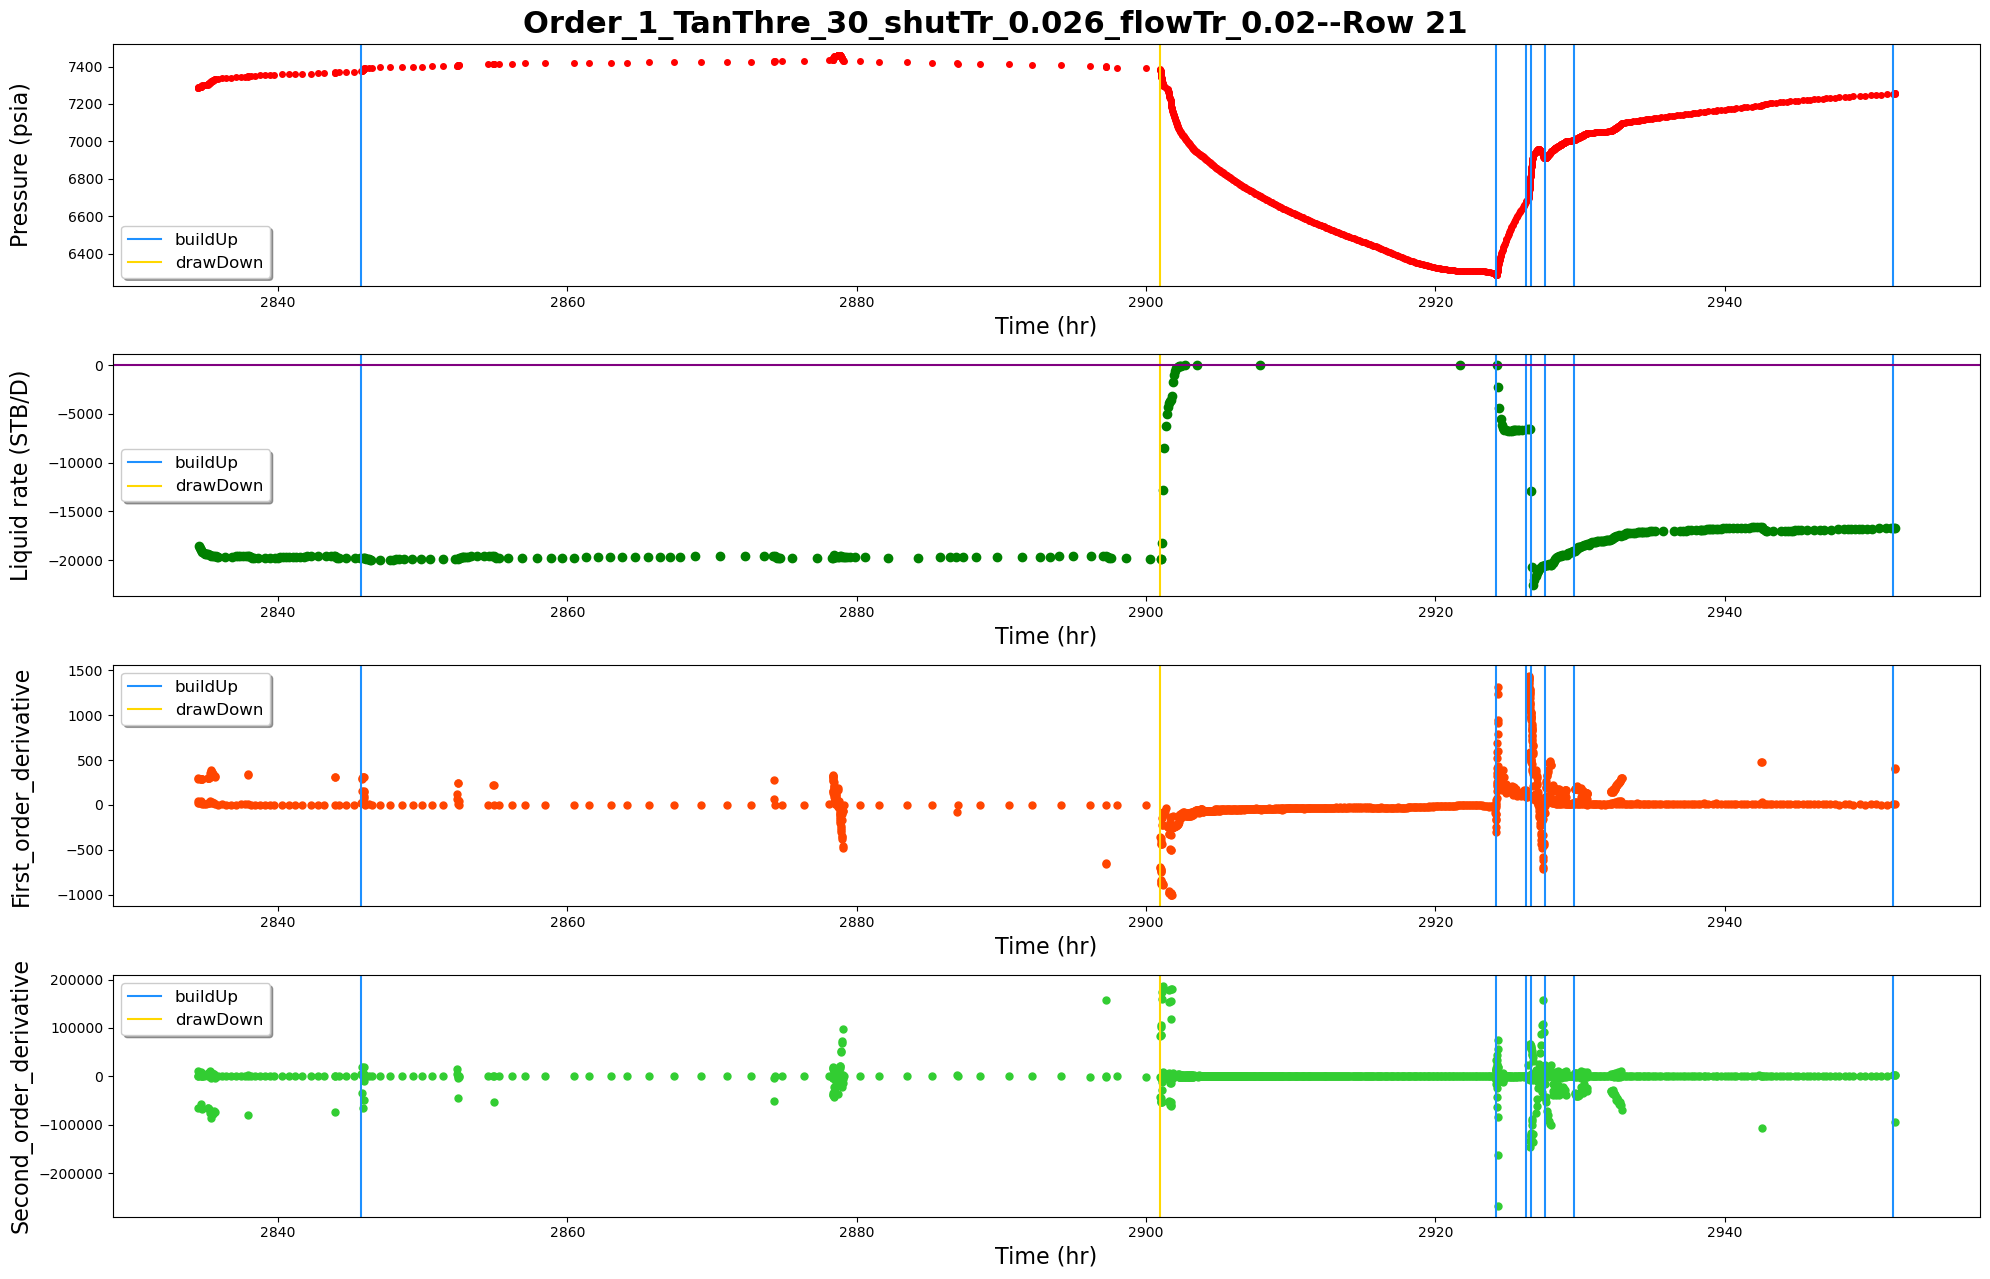

------row 22-----detected points:[25289, 25615, 25726, 26001, 26052, 26078, 26121]


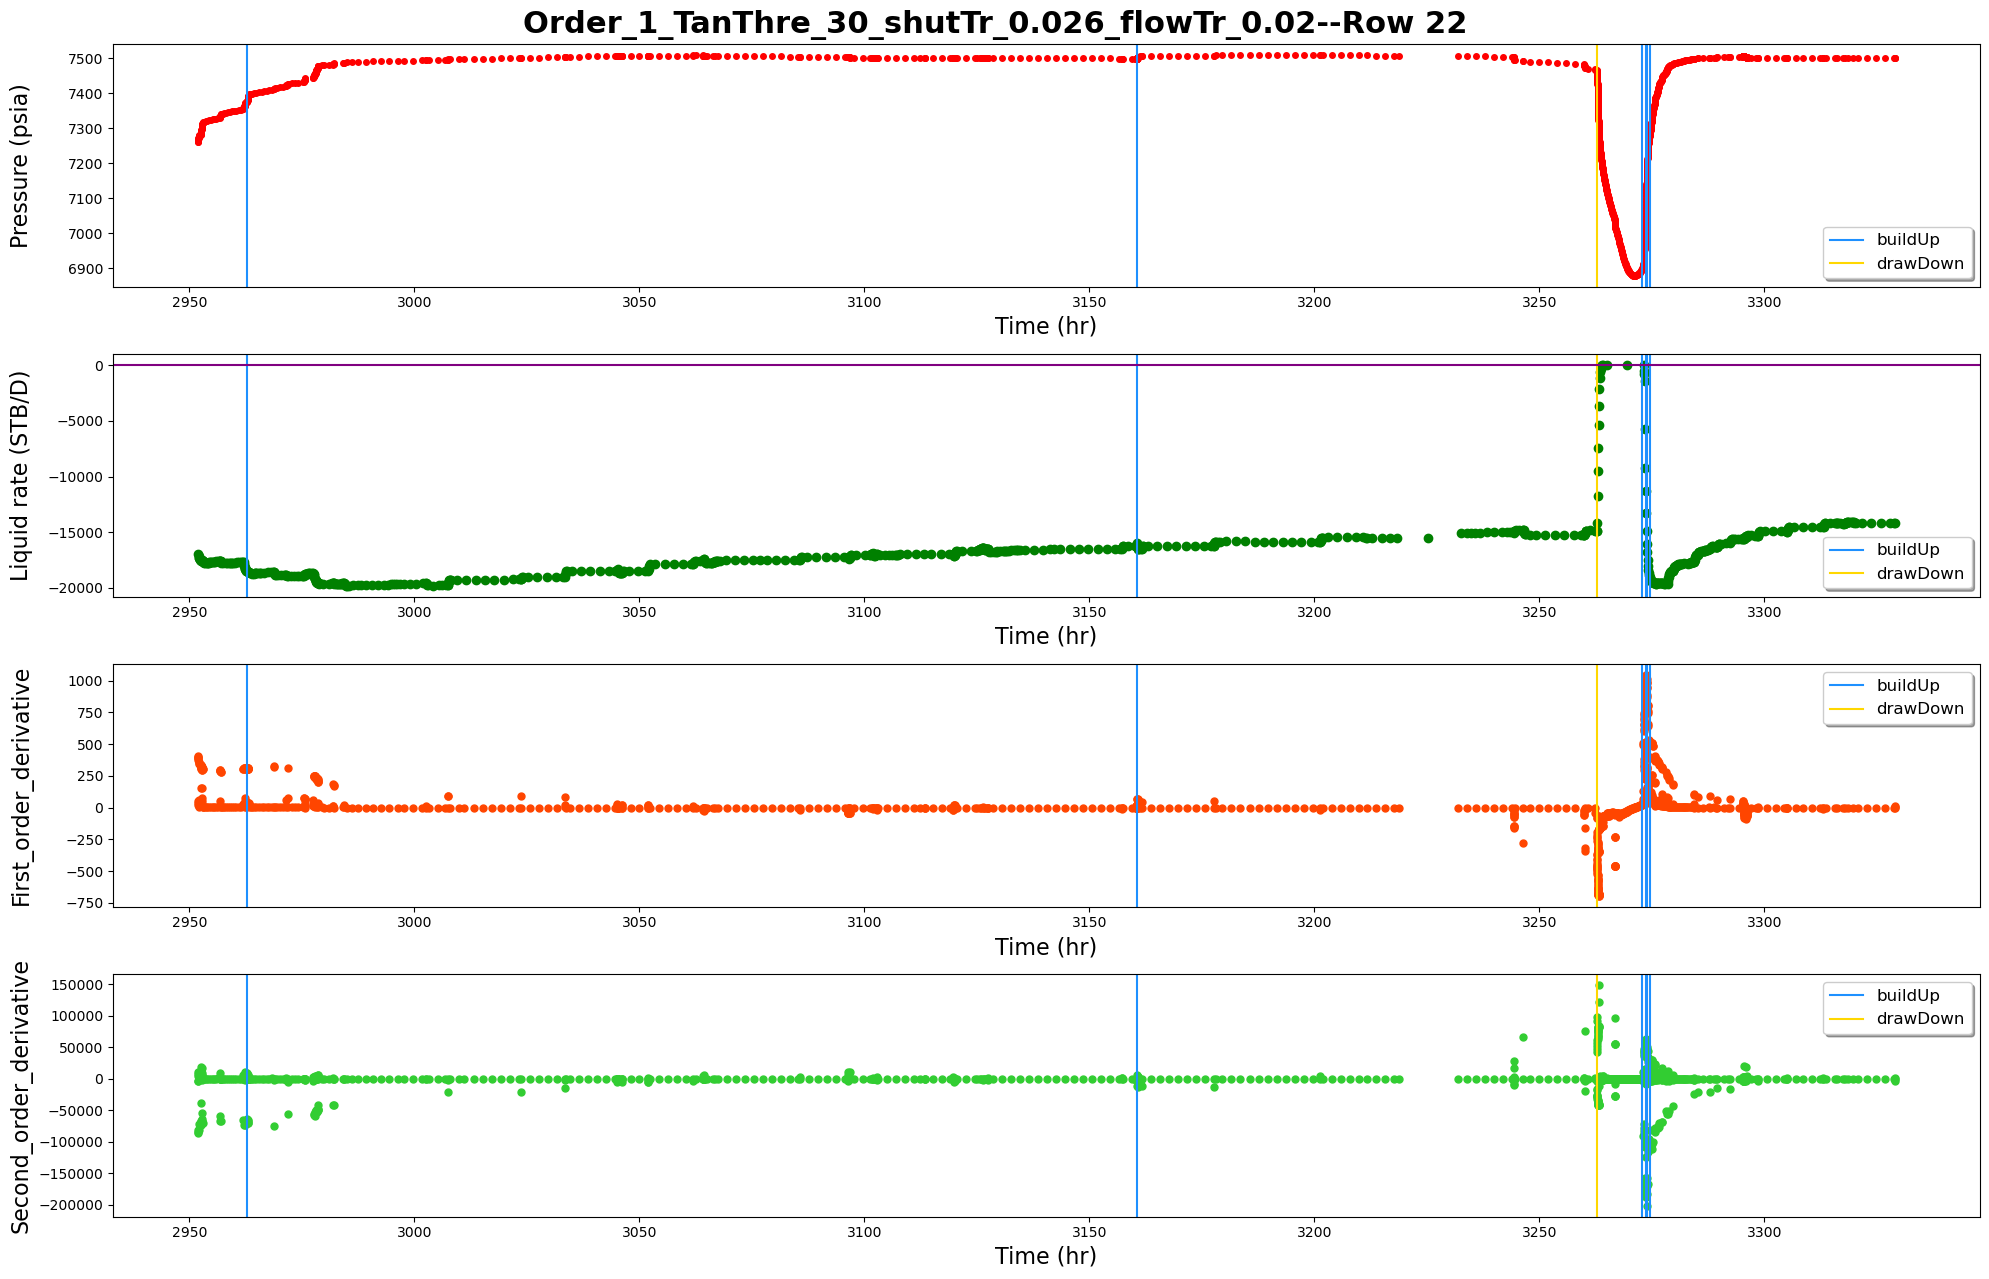

------row 23-----detected points:[26453, 26540, 26708, 26779, 26810, 26835, 27043, 27324, 27376, 27414, 27466, 27546]


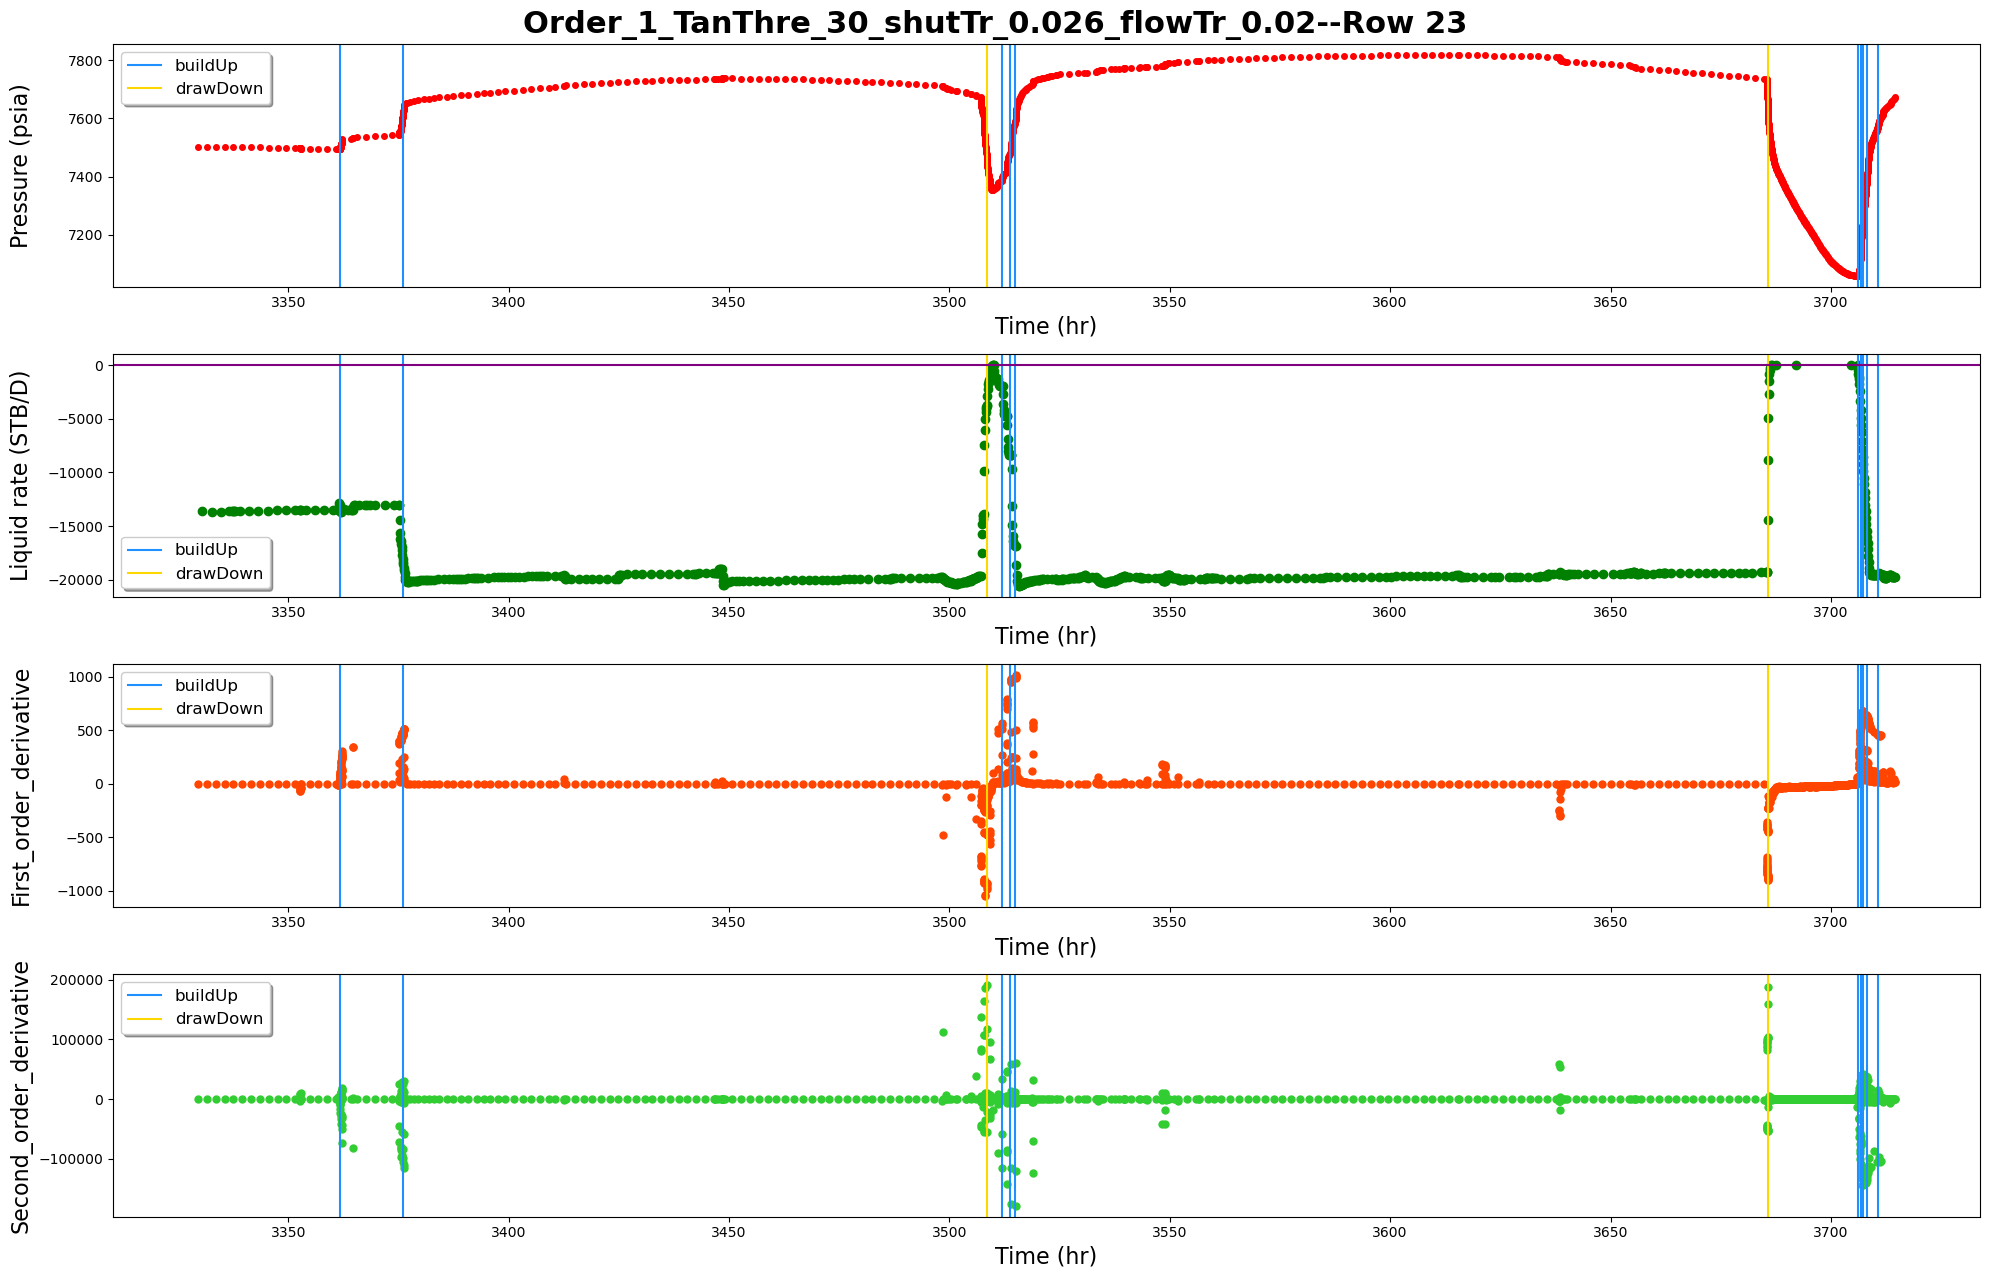

------row 24-----detected points:[27799, 27969, 28034, 28081, 28138, 28227, 28290, 28493, 28597, 28654, 28784]


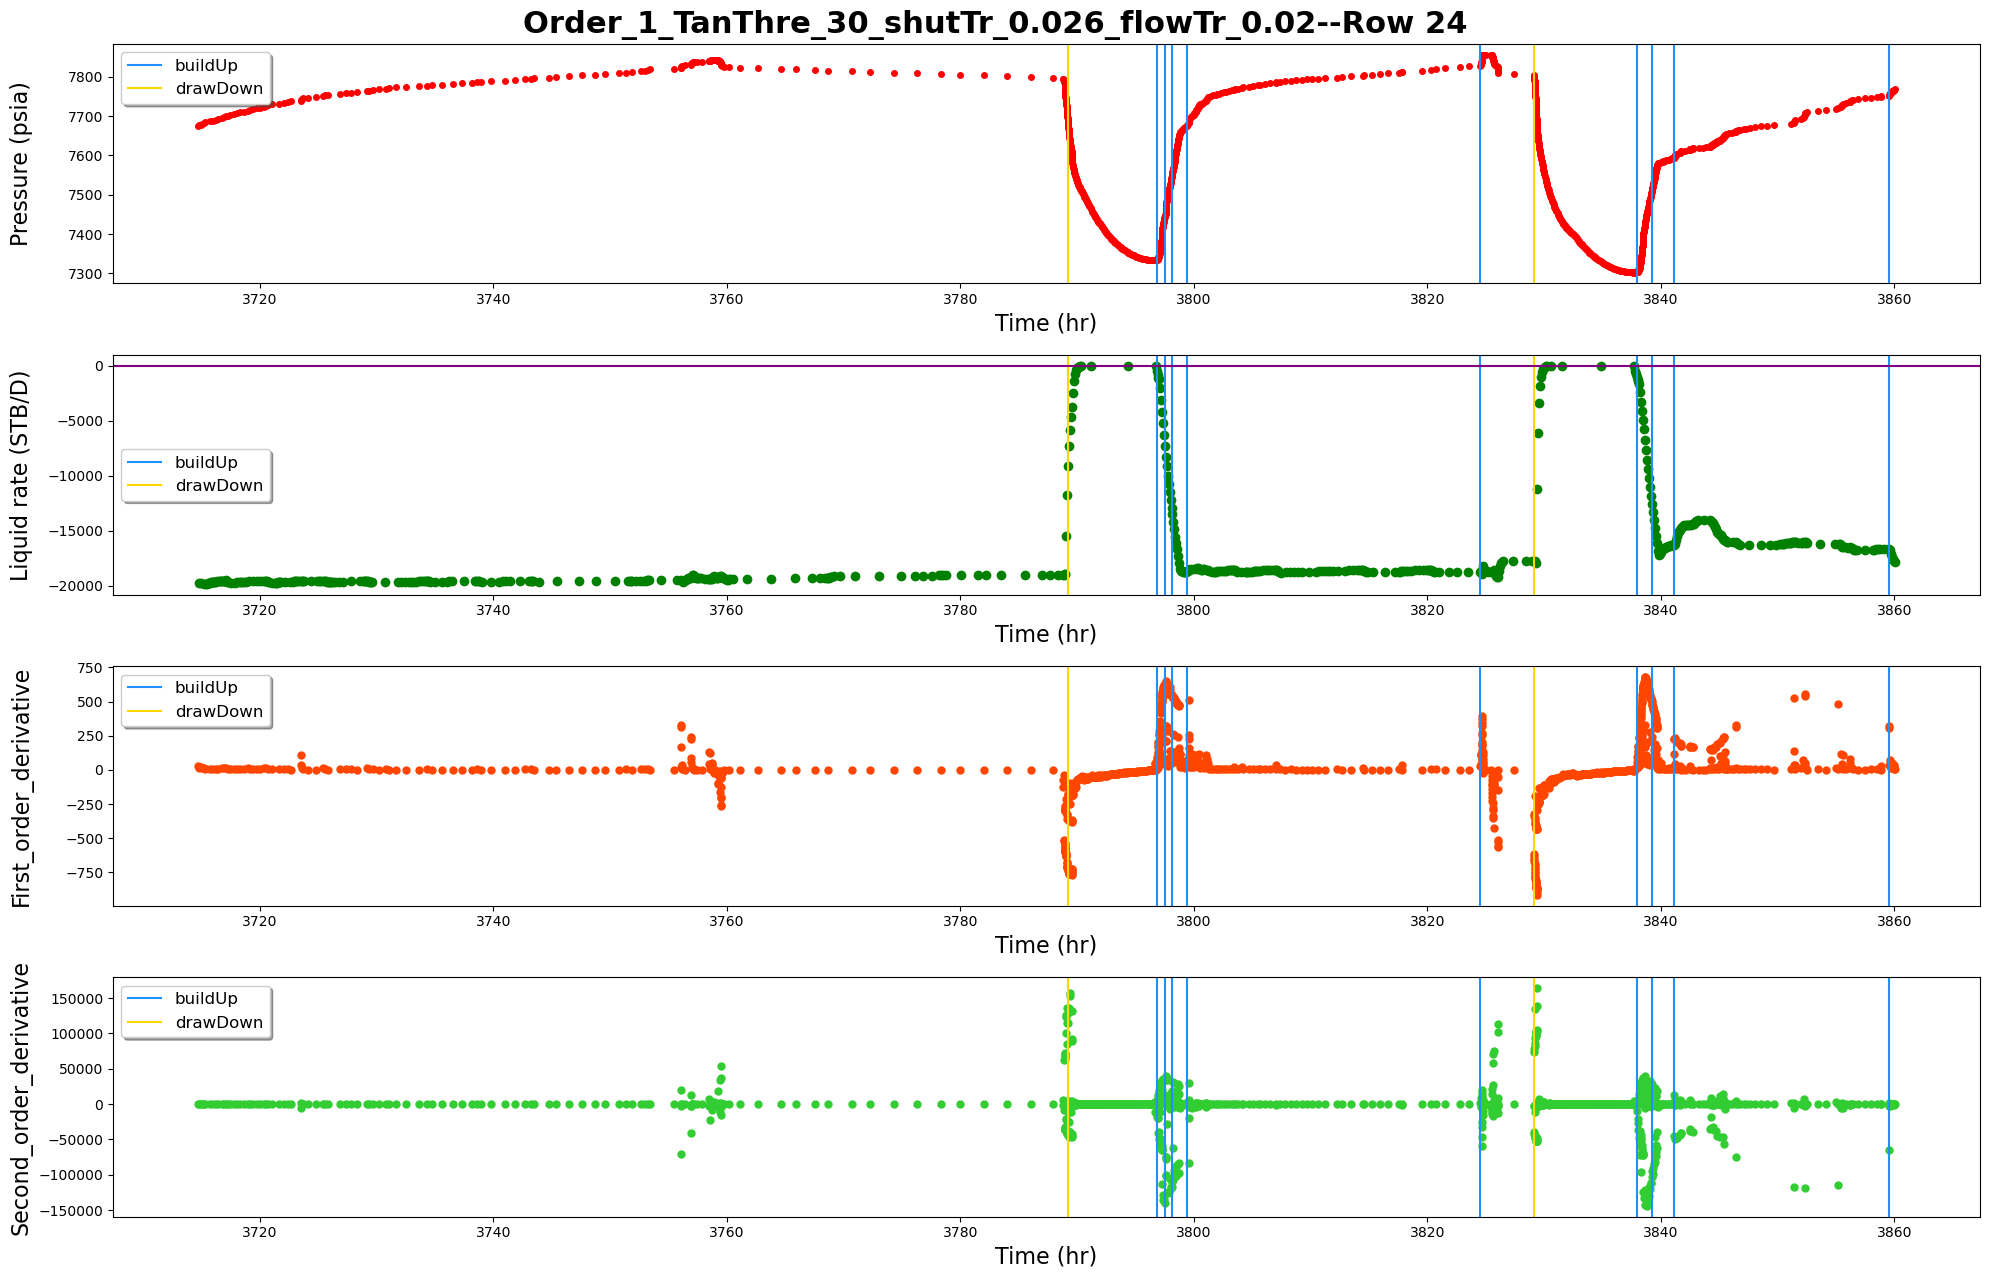

------row 25-----detected points:[28876, 29113, 29163, 29222, 29300, 29479, 29715]


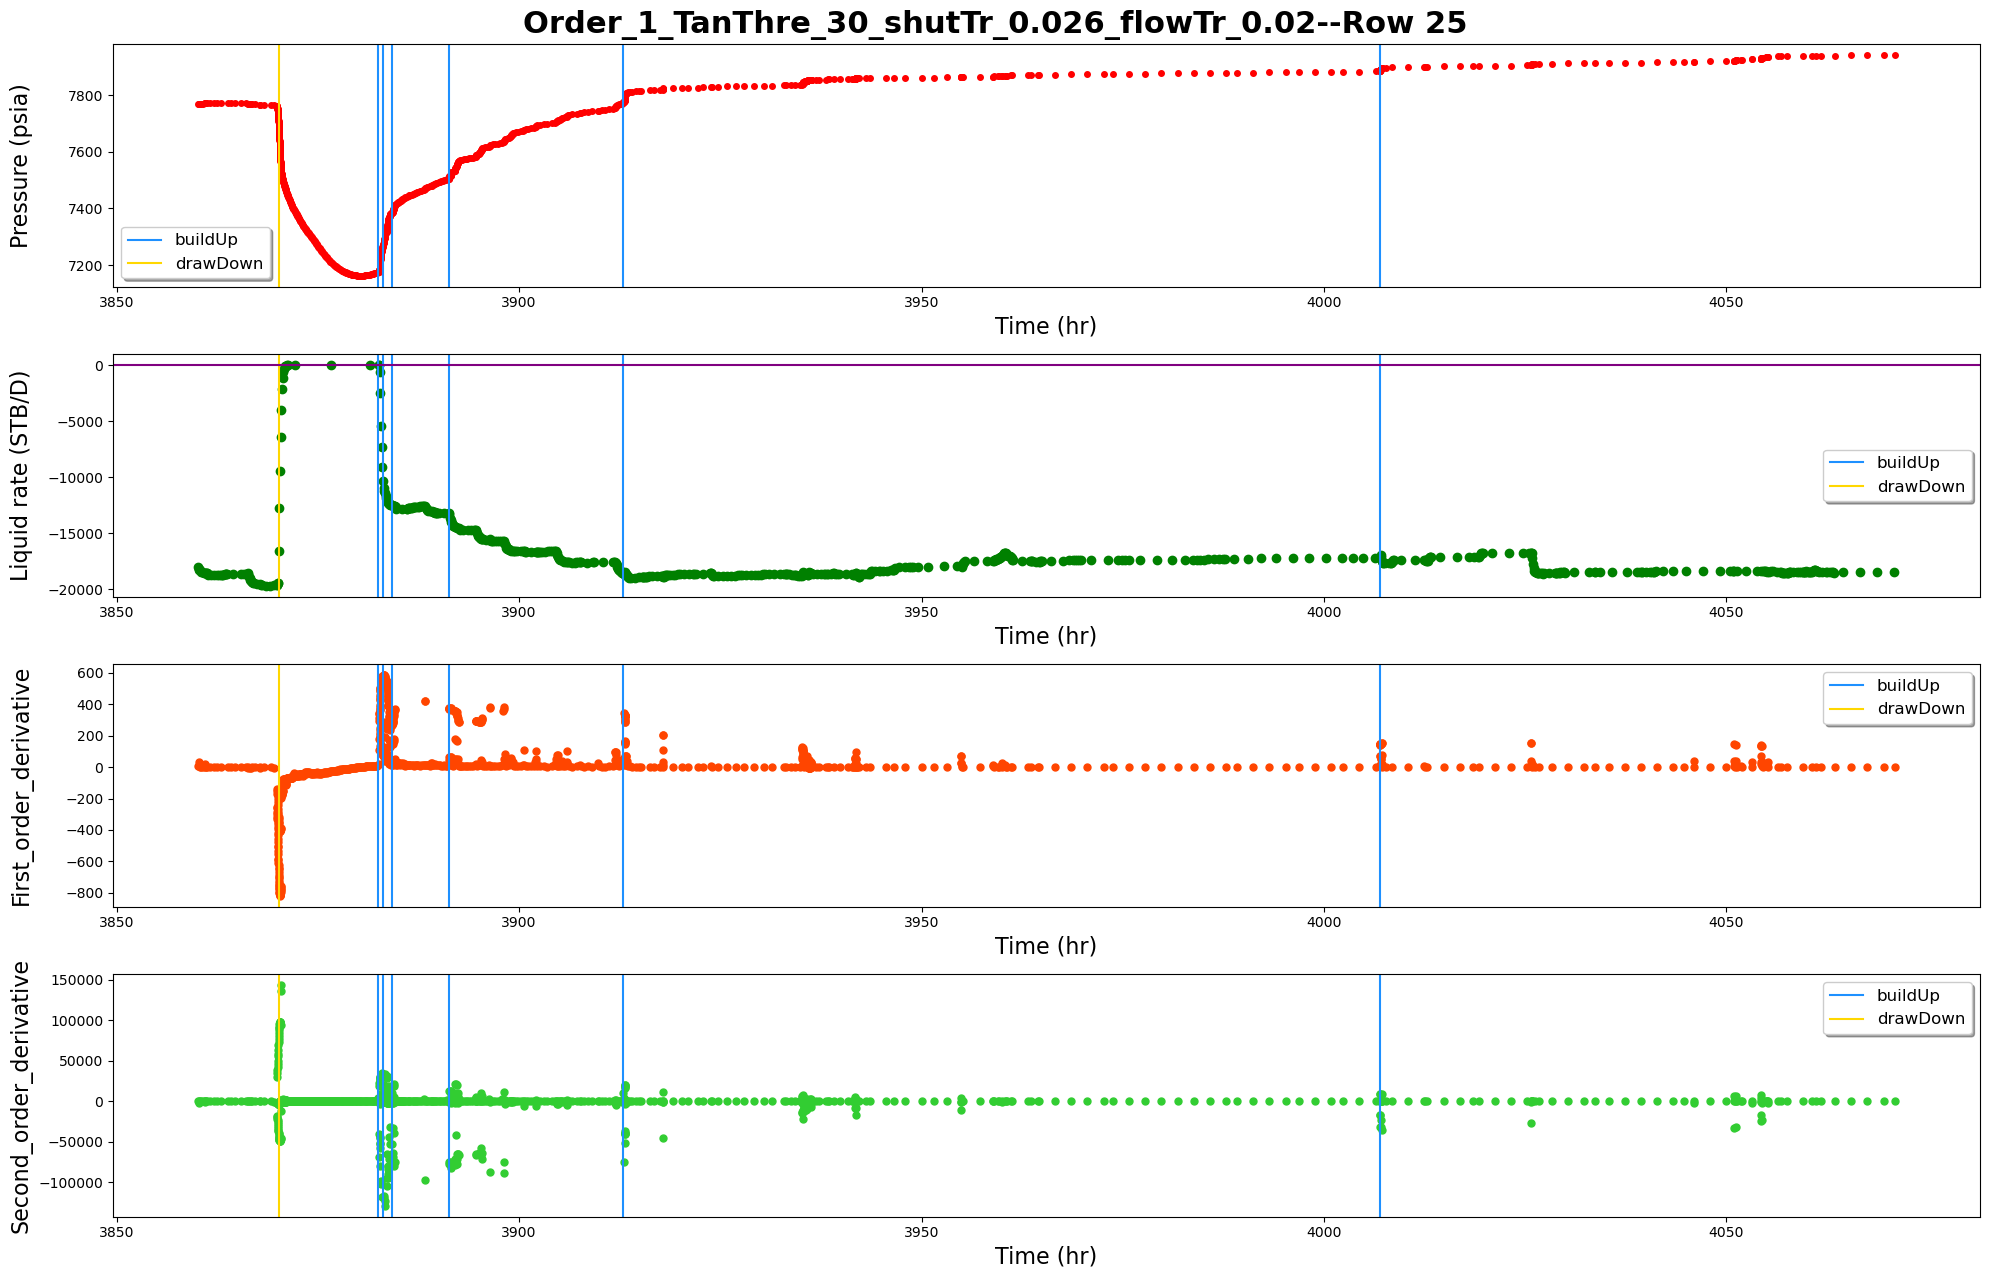

In [26]:
points_type="allPoints"
# points_type="majorTransients"
# parameters={}
parameters={"Order":polynomial_order,
            "TanThre":deltaTangent_criterion,
            "shutTr":minor_threshold_shutIn,
           "flowTr":minor_threshold_Flowing}
detect_points_dict=transients.allPointsStored

buildup=detect_points_dict["buildUp"]
drawdown=detect_points_dict["drawDown"]
txt=f"buildup:{len(buildup)}, drawdown:{len(drawdown)}"
pprint(txt)
plot_whole=True
plot_details=True
plot_statistics=False
save=True
folder_name=f"{method}/{points_type}/pointHalfWin_{point_halfWindow}_timeStep_{time_step}"
%run plot_N_save.ipynb